# a Matey

- Cleaning data;
- Preparing data for visualizing.

In [1]:
# Importing libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math 

In [2]:
# Importing datasets for the EDA
df_crime_rate = pd.read_csv("./work/2022-23d-1fcmgt-reg-ai-01-group-team3/data/Misdrijven_per_wijk_en_buurt_per_maand_15052023_134652.csv", sep=";")
df_qol = pd.read_csv('./work/2022-23d-1fcmgt-reg-ai-01-group-team3/data/Totaalscore Leefbaarometer 3.0 - Buurten van Gemeente Breda.csv', sep=';')
df_population = pd.read_csv("./work/2022-23d-1fcmgt-reg-ai-01-group-team3/data/processed/Population_of_neighbourhood_of_Gemeente_Breda_processed.csv")
df_region = gpd.read_file('./work/2022-23d-1fcmgt-reg-ai-01-group-team3/data/Buurten.geojson')
df_education = pd.read_csv('./work/2022-23d-1fcmgt-reg-ai-01-group-team3/data/Opleidingsniveau 15-75-jarigen - - Buurten van Gemeente Breda.csv', sep=';')
df_livability = pd.read_csv('./work/2022-23d-1fcmgt-reg-ai-01-group-team3/data/green_and_livability.csv', sep=';')
df_nuisance = pd.read_csv('./work/2022-23d-1fcmgt-reg-ai-01-group-team3/data/Nuisance per neighborhood in breda.csv')
df_educational_level = pd.read_csv('./work/2022-23d-1fcmgt-reg-ai-01-group-team3/data/processed/educational_level_neighbourhood_of_Gemeente_Breda_processed.csv')
df_income_level = pd.read_csv('./work/2022-23d-1fcmgt-reg-ai-01-group-team3/data/processed/income_level_neighbourhood_of_Gemeente_Breda_processed.csv')
df_qol_of_Breda = pd.read_csv('./work/2022-23d-1fcmgt-reg-ai-01-group-team3/data/processed/QOL_of_Gemeente_Breda_processed.csv')
df_heat_stress = gpd.read_file('./work/2022-23d-1fcmgt-reg-ai-01-group-team3/data/heat_stress_breda.gpkg')

#delete columns that are artefact after saving to csv
del df_population['Unnamed: 0']
del df_qol['Unnamed: 0']

In [3]:
def neighborhoods_mask(data, column):
    
    neighborhoods = ['Bavel', 'Belcrum', 'Biesdonk', 'Blauwe Kei', 'Boeimeer',
           'Brabantpark', 'Buitengebied Bavel', 'Buitengebied Prinsenbeek',
           'Buitengebied Ulvenhout', 'Chassé', 'Doornbos-Linie',
           'Effen-Rith', 'Fellenoord', 'Gageldonk', 'Geeren-noord',
           'Geeren-zuid', 'Ginneken', 'Haagpoort', 'Heilaar', 'Heksenwiel',
           'Heusdenhout', 'Heuvel', 'Kesteren', 'Kievitsloop', 'Kroeten',
           'Krogten', 'Liesbos', 'Mastbos', 'Muizenberg', 'Nieuw Wolfslaar',
           'Overakker', 'Overkroeten', 'Princenhage', 'Prinsenbeek',
           'Ruitersbos', 'Schorsmolen', 'Sportpark', 'Station', 'Steenakker',
           'Teteringen', 'Tuinzigt', 'Ulvenhout', 'Valkenberg', 'Waterdonken',
           'Westerpark', 'Wisselaar', 'Ypelaar', 'Zandberg']
    
    
    mask = data[column].isin(neighborhoods)
    data = data[mask]
    return data

# Crime rate

In [4]:
df_crime_rate.shape 

(537608, 4)

In [5]:
df_crime_rate.head(10)

Soort misdrijf        Perioden Wijken en buurten   
0  Totaal misdrijven    2012 januari     Breda centrum  \
1  Totaal misdrijven   2012 februari     Breda centrum   
2  Totaal misdrijven      2012 maart     Breda centrum   
3  Totaal misdrijven      2012 april     Breda centrum   
4  Totaal misdrijven        2012 mei     Breda centrum   
5  Totaal misdrijven       2012 juni     Breda centrum   
6  Totaal misdrijven       2012 juli     Breda centrum   
7  Totaal misdrijven   2012 augustus     Breda centrum   
8  Totaal misdrijven  2012 september     Breda centrum   
9  Totaal misdrijven    2012 oktober     Breda centrum   

   Geregistreerde misdrijven (aantal)  
0                               370.0  
1                               401.0  
2                               375.0  
3                               370.0  
4                               436.0  
5                               403.0  
6                               330.0  
7                               337.0  
8                               381.0  
9                               388.0

In [6]:
df_crime_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537608 entries, 0 to 537607
Data columns (total 4 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Soort misdrijf                      537608 non-null  object 
 1   Perioden                            537608 non-null  object 
 2   Wijken en buurten                   537608 non-null  object 
 3   Geregistreerde misdrijven (aantal)  501160 non-null  float64
dtypes: float64(1), object(3)
memory usage: 16.4+ MB


In [7]:
df_crime_rate['Geregistreerde misdrijven (aantal)'].value_counts()

Geregistreerde misdrijven (aantal)
0.0      410026
1.0       37883
2.0       16271
3.0        8891
4.0        5586
          ...  
374.0         1
220.0         1
258.0         1
348.0         1
127.0         1
Name: count, Length: 304, dtype: int64

In [8]:
# Check for infinite values in the dataset
# df_crime_rate['Geregistreerde misdrijven (aantal)'][df_crime_rate['Geregistreerde misdrijven (aantal)'].apply(lambda x: math.isinf(x))]

In [9]:
# Replacing the infinite values with nan
# df_crime_rate['Geregistreerde misdrijven (aantal)'] = df_crime_rate['Geregistreerde misdrijven (aantal)'].replace([np.inf, -np.inf], np.nan)

In [10]:
# Droping the nan
# df_crime_rate['Geregistreerde misdrijven (aantal)'] = df_crime_rate['Geregistreerde misdrijven (aantal)'].dropna()

<Axes: xlabel='Geregistreerde misdrijven (aantal)', ylabel='Count'>

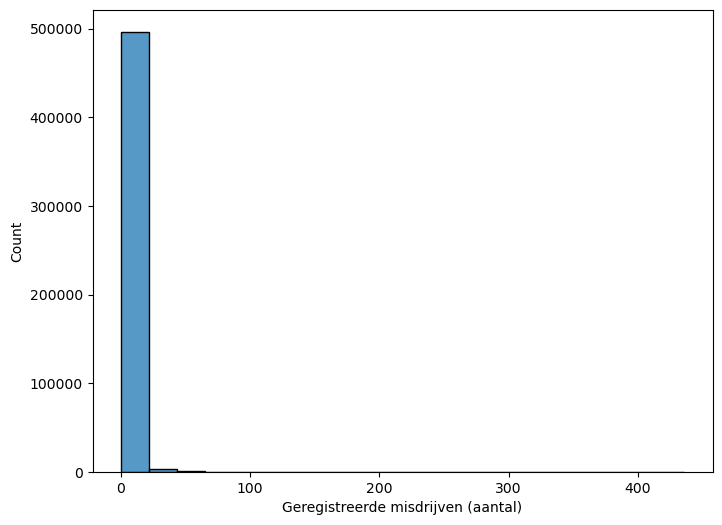

In [11]:
# Checking the data distribution of crimes
fig = plt.figure(figsize=(8, 6))
sns.histplot(data=df_crime_rate, x='Geregistreerde misdrijven (aantal)')

In [12]:
print('Number of missing values:\n ', df_crime_rate.isna().sum())
print('Number of duplicates: ', df_crime_rate.duplicated().sum())

Number of missing values:
  Soort misdrijf                            0
Perioden                                  0
Wijken en buurten                         0
Geregistreerde misdrijven (aantal)    36448
dtype: int64
Number of duplicates:  29997


In [13]:
# Aggregating the data through crimes
types_of_crime = df_crime_rate.groupby('Soort misdrijf', as_index=False)['Geregistreerde misdrijven (aantal)'].mean().sort_values('Geregistreerde misdrijven (aantal)', ascending=False)

In [14]:
# Dropping the missing values
types_of_crime = types_of_crime.dropna()

In [15]:
# Removing the crimes with values 0
types_of_crime[types_of_crime['Geregistreerde misdrijven (aantal)'] != 0]

Soort misdrijf   
58                         Totaal misdrijven  \
17           1.6.2 Overige vermogensdelicten   
4   1.2.3 Diefstal van brom-, snor-, fietsen   
7                     1.3.1 Ongevallen (weg)   
2   1.2.1 Diefstal uit/vanaf motorvoertuigen   
20     2.2.1 Vernieling cq. zaakbeschadiging   
55                  3.9.1 Horizontale fraude   
0              1.1.1 Diefstal/inbraak woning   
12                        1.4.5 Mishandeling   
24                      2.5.2 Winkeldiefstal   
11                          1.4.4 Bedreiging   
5                       1.2.4 Zakkenrollerij   
48                 3.5.2 Onder invloed (weg)   
23     2.5.1 Diefstal/inbraak bedrijven enz.   
40                         3.1.1 Drugshandel   
1   1.1.2 Diefstal/inbraak box/garage/schuur   
6   1.2.5 Diefstal af/uit/van ov. voertuigen   
3         1.2.2 Diefstal van motorvoertuigen   
50            3.6.4 Aantasting openbare orde   
57                     3.9.3 Fraude (overig)   
49                        3.5.5 Weg (overig)   
42                         3.1.3 Wapenhandel   
10           1.4.3 Openlijk geweld (persoon)   
54                          3.7.4 Cybercrime   
38                   2.7.2 Bijzondere wetten   
16                   1.6.1 Brand/ontploffing   
13                          1.4.6 Straatroof   
9                      1.4.2 Moord, doodslag   
22                      2.4.2 Huisvredebreuk   
19                 2.1.1 Drugs/drankoverlast   
14                             1.4.7 Overval   
18                        1.6.3 Mensenhandel   
15                 1.5.2 Diefstallen (water)   
29                             2.6.13 Dieren   
39               2.7.3 Leefbaarheid (overig)   
37                            2.6.9 Vuurwerk   
51                       3.7.1 Discriminatie   
56                    3.9.2 Verticale fraude   
36       2.6.8 Transport gevaarlijke stoffen   
41                       3.1.2 Mensensmokkel   
52                   3.7.2 Vreemdelingenzorg   
31                               2.6.2 Bodem   
33                               2.6.4 Afval   
21     2.4.1 Burengerucht (relatieproblemen)   
25         2.6.1 Inrichting Wet Milieubeheer   
32                               2.6.3 Water   
30                  2.6.14 Voedselveiligheid   
27                2.6.11 Natuur en landschap   
26               2.6.10 Bestrijdingsmiddelen   

    Geregistreerde misdrijven (aantal)  
58                           30.553556  
17                            3.386523  
4                             3.295215  
7                             3.010536  
2                             2.869842  
20                            2.738147  
55                            1.819140  
0                             1.749561  
12                            1.641572  
24                            1.500000  
11                            1.046752  
5                             0.959175  
48                            0.811677  
23                            0.738147  
40                            0.724978  
1                             0.614574  
6                             0.453468  
3                             0.430641  
50                            0.271949  
57                            0.269974  
49                            0.233758  
42                            0.185689  
10                            0.168788  
54                            0.128841  
38                            0.114355  
16                            0.112599  
13                            0.111282  
9                             0.107770  
22                            0.106453  
19                            0.049824  
14                            0.037313  
18                            0.034460  
15                            0.023924  
29                            0.020852  
39                            0.019754  
37                            0.016901  
51                            0.014706  
56                            0.011633  
36                            

In [16]:
# Removing the data for total crimes
types_of_crime = types_of_crime[types_of_crime['Soort misdrijf'] != 'Totaal misdrijven']

In [17]:
# Splitting the Perioden column into year and month
df_crime_rate[['Year', 'Month', 'd']] = df_crime_rate['Perioden'].str.split(' ', expand=True)

In [18]:
df_crime_rate.drop('d', axis=1, inplace=True)

Text(0, 0.5, 'Crime rate')

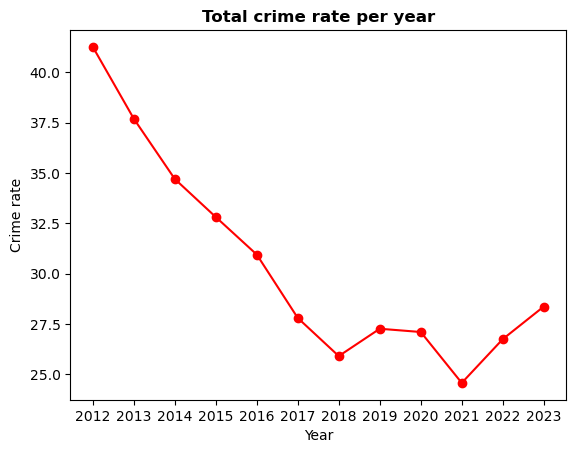

In [19]:
# Creating a line chart for the total crimes per year
total_crime_rate = df_crime_rate[df_crime_rate['Soort misdrijf'] == 'Totaal misdrijven']

total_crime_year_per_year = total_crime_rate.groupby(['Soort misdrijf', 'Year'], as_index=False)['Geregistreerde misdrijven (aantal)'].mean().sort_values('Year')

plt.title("Total crime rate per year", fontdict={'fontweight':'bold'})
plt.plot(total_crime_year_per_year['Year'], total_crime_year_per_year['Geregistreerde misdrijven (aantal)'], color='r', marker='o')
plt.xlabel("Year")
plt.ylabel("Crime rate")

<Axes: ylabel='Soort misdrijf'>

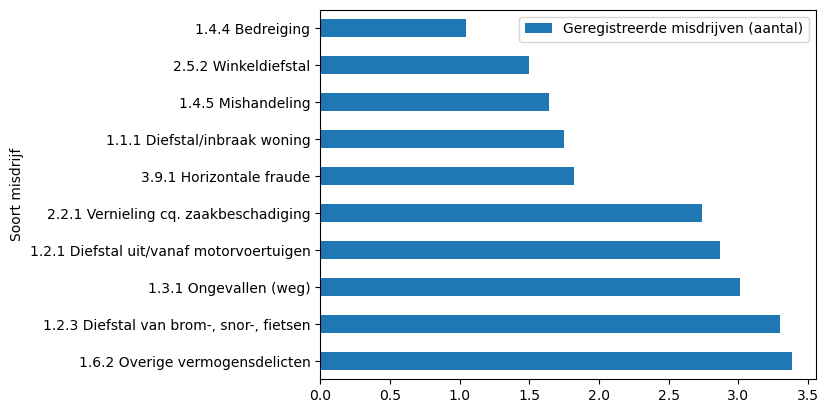

In [20]:
# Plotting the top 10 crimes
types_of_crime.head(10).plot(kind='barh', x='Soort misdrijf')

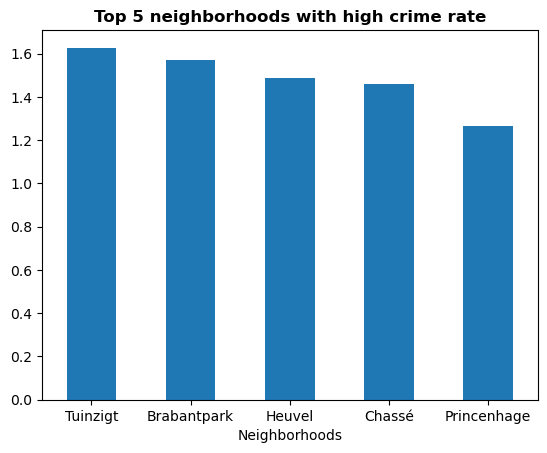

In [21]:
crime_rate_per_neighborhood = df_crime_rate.groupby('Wijken en buurten', as_index=False)['Geregistreerde misdrijven (aantal)'].mean().sort_values('Geregistreerde misdrijven (aantal)', ascending=False)

crime_rate_per_neighborhood = neighborhoods_mask(crime_rate_per_neighborhood, 'Wijken en buurten')
ax = crime_rate_per_neighborhood.head(5).plot(kind='bar', x='Wijken en buurten')
plt.title('Top 5 neighborhoods with high crime rate', fontdict={'fontweight':'bold'})
plt.xlabel('Neighborhoods')
plt.xticks(rotation=0)
ax.legend().remove()
plt.show()

# Quality of life

In [22]:
df_qol.shape

(56, 4)

In [23]:
df_qol

Buurten Totaalscore Leefbaarometer 3.0|2014   
0                 Valkenberg                           4,0437744  \
1                     Chassé                           4,1088639   
2                 Fellenoord                           3,8969463   
3                Schorsmolen                           3,8828739   
4                    Station                           4,0230966   
5                       City                           4,0224228   
6                    Belcrum                           4,0468476   
7             Doornbos-Linie                           3,8657413   
8                   Biesdonk                           3,8367021   
9                Geeren-zuid                           3,8511576   
10                 Wisselaar                           3,8590980   
11                   Krogten                           4,0180546   
12              Geeren-noord                           3,7996045   
13               Waterdonken                           4,0530228   
14               Brabantpark                           4,0480815   
15                 Sportpark                           4,2558888   
16                  Zandberg                           4,2911635   
17               Heusdenhout                           4,0996783   
18            Moleneind-oost                                   ?   
19                  Hoogeind                                 NaN   
20                Blauwe Kei                           4,1742383   
21                   Ypelaar                           4,1124567   
22                 Overakker                           4,1887412   
23                  Ginneken                           4,2882436   
24                   Mastbos                           4,2987223   
25                  Boeimeer                           4,2022858   
26                Ruitersbos                           4,2925087   
27                 Haagpoort                           3,9207422   
28                    Heuvel                           3,8927308   
29                  Tuinzigt                           3,9181417   
30               Princenhage                           4,0907655   
31                Westerpark                           4,1270923   
32                   Heilaar                           4,2844652   
33                 Hazeldonk                                   ?   
34                Steenakker                           4,2383428   
35                Effen-Rith                           4,2176928   
36                   Liesbos                           4,2871150   
37                 Gageldonk                           3,9832675   
38               Kievitsloop                           3,9742539   
39                  Kesteren                           3,8737656   
40                Muizenberg                           3,9563527   
41                Heksenwiel                           4,0160717   
42               Overkroeten                           4,0125406   
43                   Kroeten                           3,9721032   
44                      Emer                                   ?   
45                 Hagebeemd                           4,2543906   
46                     Bavel                           4,1622053   
47           Nieuw Wolfslaar                           4,2203205   
48        Buitengebied Bavel                           4,2749587   
49                 Ulvenhout                           4,2211729   
50    Buitengebied Ulvenhout                           4,2876857   
51               Prinsenbeek                           4,1152431   
52  Buitengebied Prinsenbeek                           4,1944012   
53                Teteringen                           4,2104362   
54               Vuchtpolder                           4,3301999   
55   Buitengebied Teteringen                           4,4549457   

   Totaalscore Leefbaarometer 3.0|2018 Totaalscore Leefbaarometer 3.0|2020  
0                            4,0946676                           4,

In [24]:
df_qol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 4 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Buurten                              56 non-null     object
 1   Totaalscore Leefbaarometer 3.0|2014  55 non-null     object
 2   Totaalscore Leefbaarometer 3.0|2018  55 non-null     object
 3   Totaalscore Leefbaarometer 3.0|2020  56 non-null     object
dtypes: object(4)
memory usage: 1.9+ KB


In [25]:
print('Number of duplicates:', df_qol.duplicated().sum())

Number of duplicates: 0


In [26]:
df_qol = df_qol.dropna()

In [27]:
# Removing the '?' values
df_qol = df_qol[df_qol['Totaalscore Leefbaarometer 3.0|2014'] != '?']

In [28]:
columns = ['Totaalscore Leefbaarometer 3.0|2014',
       'Totaalscore Leefbaarometer 3.0|2018',
       'Totaalscore Leefbaarometer 3.0|2020']

# Replacing the ',' with '.' and convert the datatyoe to float 
for column in columns:
    df_qol[column] = df_qol[column].str.replace(',', '.').astype(float)

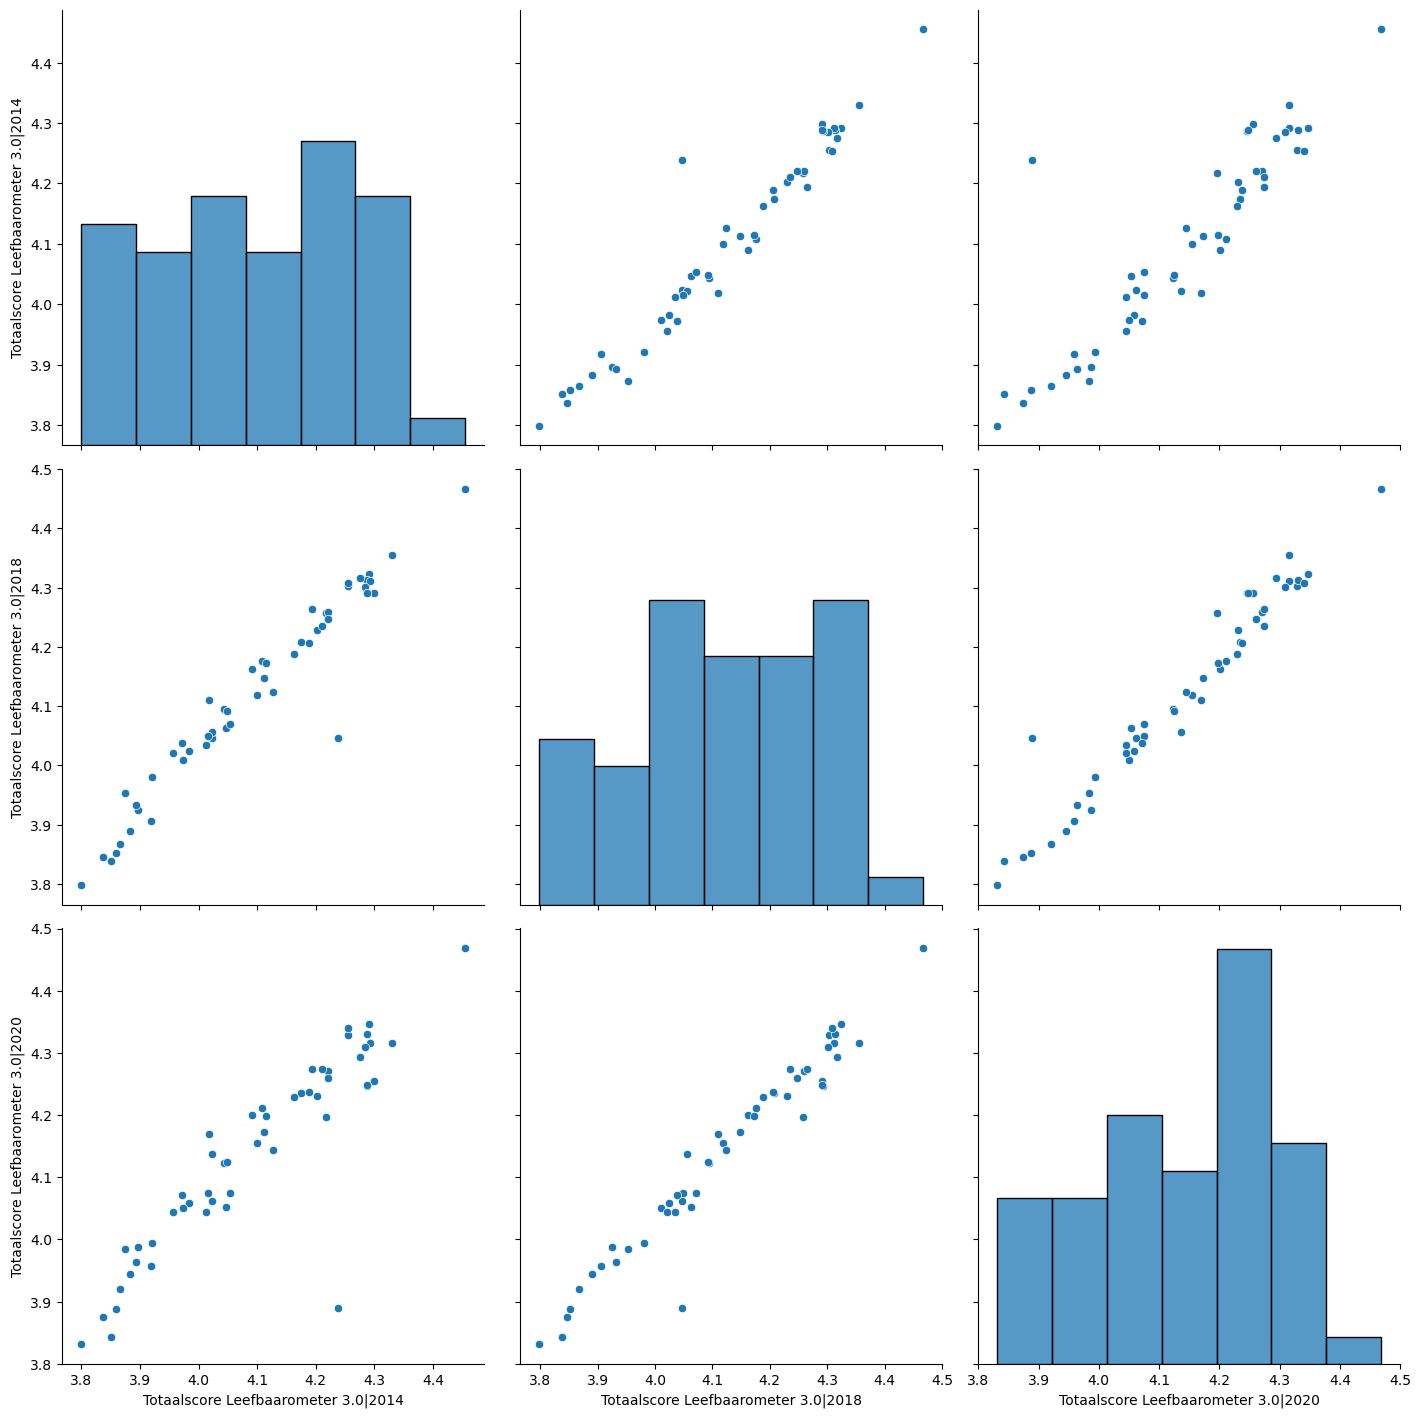

In [29]:
# Checking the data distribution of the qualiti of life columns together with scatter plots
graph = sns.pairplot(df_qol, x_vars = columns, y_vars=columns)
graph.fig.set_size_inches(15, 15)

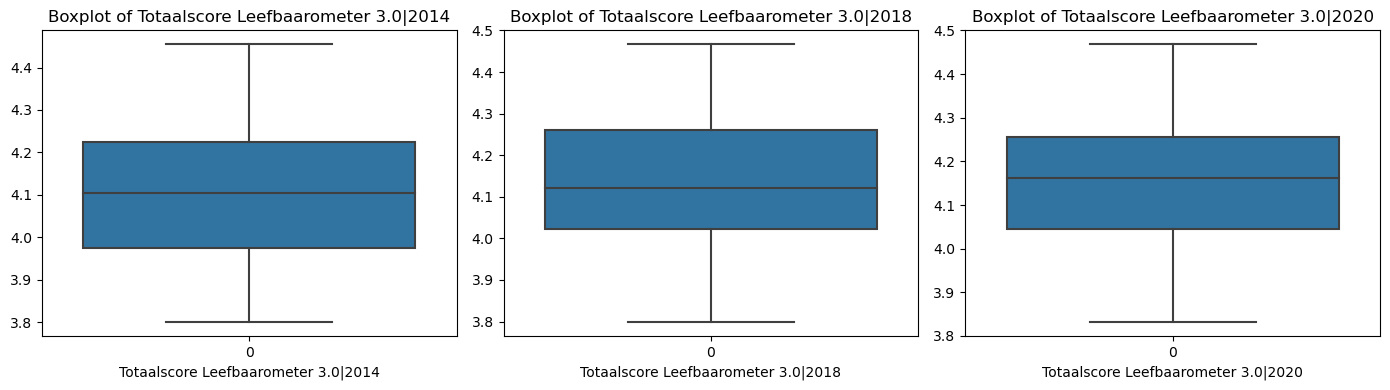

In [30]:
# Creating figure for boxplot
fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(14, 4))

# Looping through the columns
for i, column in enumerate(columns):

    # Storing the axes into variable
    ax = axes[i]
    # Creating the boxplot
    sns.boxplot(df_qol[column], ax=ax)

    # Setting a title and label
    ax.set_title(f'Boxplot of {column}')
    ax.set_xlabel(column)

# Plotting the figure
plt.tight_layout()
plt.show()

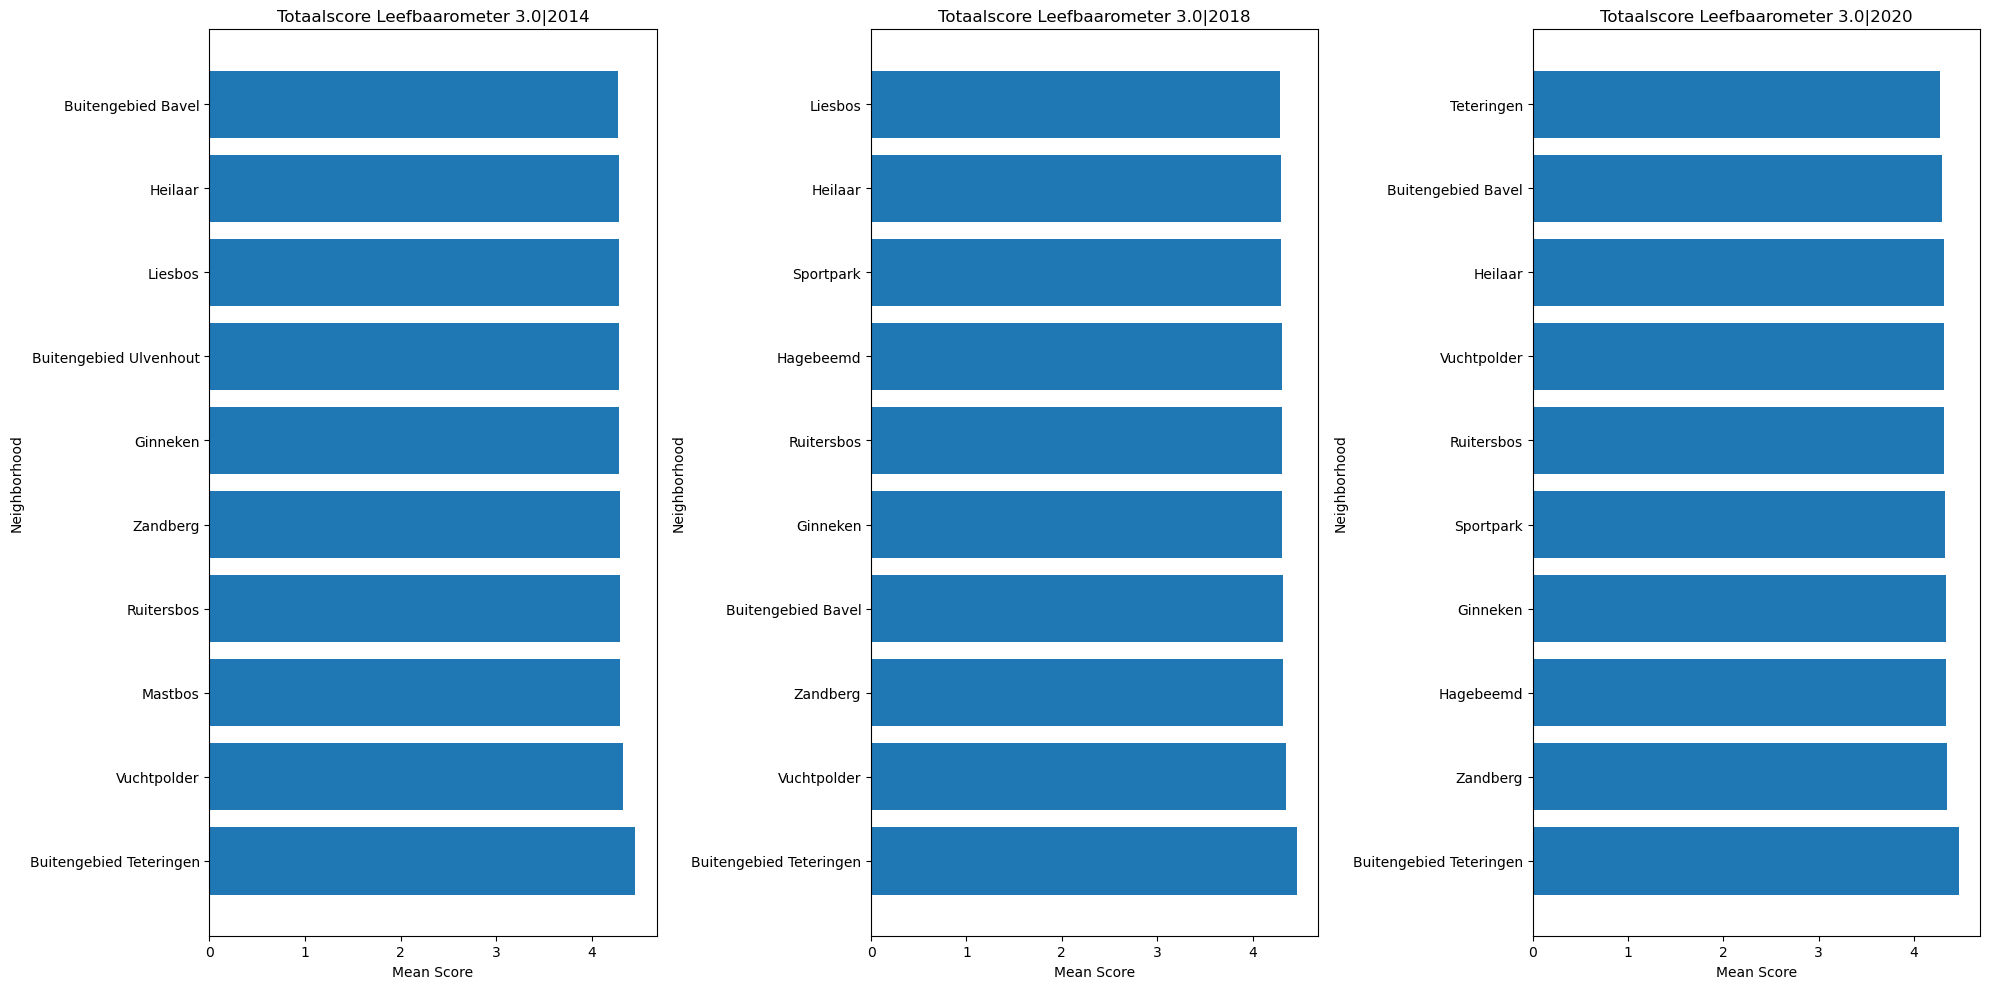

In [31]:
# Creating a figure
fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(20, 10))

# Looping through columns and taking their name and index
for i, column in enumerate(columns):

    # Aggregating the data for 'Buurten'
    qol_neighborhoods = df_qol.groupby('Buurten', as_index=False)[column].mean().sort_values(column, ascending=False)
    # Taking the top 10 neighborhoods
    qol_neighborhoods_top_10 = qol_neighborhoods.head(10)

    # Plotting horizontal bar chart for each year
    ax = axes[i]
    ax.barh(qol_neighborhoods_top_10['Buurten'], qol_neighborhoods_top_10[column])
    ax.set_xlabel('Mean Score')
    ax.set_ylabel('Neighborhood')
    ax.set_title(column)

# Plotting the figure
plt.tight_layout()
plt.show()

# Population

In [32]:
df_population.shape

(5040, 5)

In [33]:
df_population.head(10)

Buurten  Year        Age Gender  value
0      Valkenberg  2014  < 30 jaar    Man  380.0
1          Chassé  2014  < 30 jaar    Man  604.0
2      Fellenoord  2014  < 30 jaar    Man  333.0
3     Schorsmolen  2014  < 30 jaar    Man  650.0
4         Station  2014  < 30 jaar    Man  513.0
5            City  2014  < 30 jaar    Man  622.0
6         Belcrum  2014  < 30 jaar    Man  678.0
7  Doornbos-Linie  2014  < 30 jaar    Man  945.0
8        Biesdonk  2014  < 30 jaar    Man  908.0
9     Geeren-zuid  2014  < 30 jaar    Man  737.0

In [34]:
df_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5040 entries, 0 to 5039
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buurten  5040 non-null   object 
 1   Year     5040 non-null   int64  
 2   Age      5040 non-null   object 
 3   Gender   5040 non-null   object 
 4   value    5039 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 197.0+ KB


In [35]:
df_population['Buurten'].unique()

array(['Valkenberg', 'Chassé', 'Fellenoord', 'Schorsmolen', 'Station',
       'City', 'Belcrum', 'Doornbos-Linie', 'Biesdonk', 'Geeren-zuid',
       'Wisselaar', 'Krogten', 'Geeren-noord', 'Waterdonken',
       'Brabantpark', 'Sportpark', 'Zandberg', 'Heusdenhout',
       'Moleneind-oost', 'Hoogeind', 'Blauwe Kei', 'Ypelaar', 'Overakker',
       'Ginneken', 'Mastbos', 'Boeimeer', 'Ruitersbos', 'Haagpoort',
       'Heuvel', 'Tuinzigt', 'Princenhage', 'Westerpark', 'Heilaar',
       'Hazeldonk', 'Steenakker', 'Effen-Rith', 'Liesbos', 'Gageldonk',
       'Kievitsloop', 'Kesteren', 'Muizenberg', 'Heksenwiel',
       'Overkroeten', 'Kroeten', 'Emer', 'Hagebeemd', 'Bavel',
       'Nieuw Wolfslaar', 'Buitengebied Bavel', 'Ulvenhout',
       'Buitengebied Ulvenhout', 'Prinsenbeek',
       'Buitengebied Prinsenbeek', 'Teteringen', 'Vuchtpolder',
       'Buitengebied Teteringen'], dtype=object)

In [36]:
print('Number of missing values:\n ', df_population.isna().sum())
print('Number of duplicates: ', df_population.duplicated().sum())

Number of missing values:
  Buurten    0
Year       0
Age        0
Gender     0
value      1
dtype: int64
Number of duplicates:  0


In [37]:
df_population['value'] = df_population['value'].astype('float64')

In [38]:
# Code writen by Hubert
df_population = df_population[df_population['Year'] == 2019]

#Pivot values from columns 'Age' and 'Gender' into columns
df_population = (df_population.pivot(index='Buurten',
                                     columns=["Age","Gender"],
                                     values=['value']
                                     )).reset_index()


df_population = df_population.set_index('Buurten') #Set the 'Buurten' column as the index
df_population.columns = [' '.join(col).strip() for col in df_population.columns.values] #Join the column names and strip any leading or trailing whitespace
df_population.columns = [col.replace('value ','') for col in df_population.columns.values] #Remove 'value ' in column names

#combine genders
df_population['< 30 jaar'] = df_population['< 30 jaar Man'] + df_population['< 30 jaar Vrouw']
df_population['30-44 jaar'] = df_population['30-44 jaar Man'] + df_population['30-44 jaar Vrouw']
df_population['45-64 jaar'] = df_population['45-64 jaar Man'] + df_population['45-64 jaar Vrouw']
df_population['65-74 jaar'] = df_population['65-74 jaar Man'] + df_population['65-74 jaar Vrouw']
df_population['>= 75 jaar'] = df_population['>= 75 jaar Man'] + df_population['>= 75 jaar Vrouw']

df_population = df_population[['< 30 jaar', '30-44 jaar', '45-64 jaar', '65-74 jaar', '>= 75 jaar']]

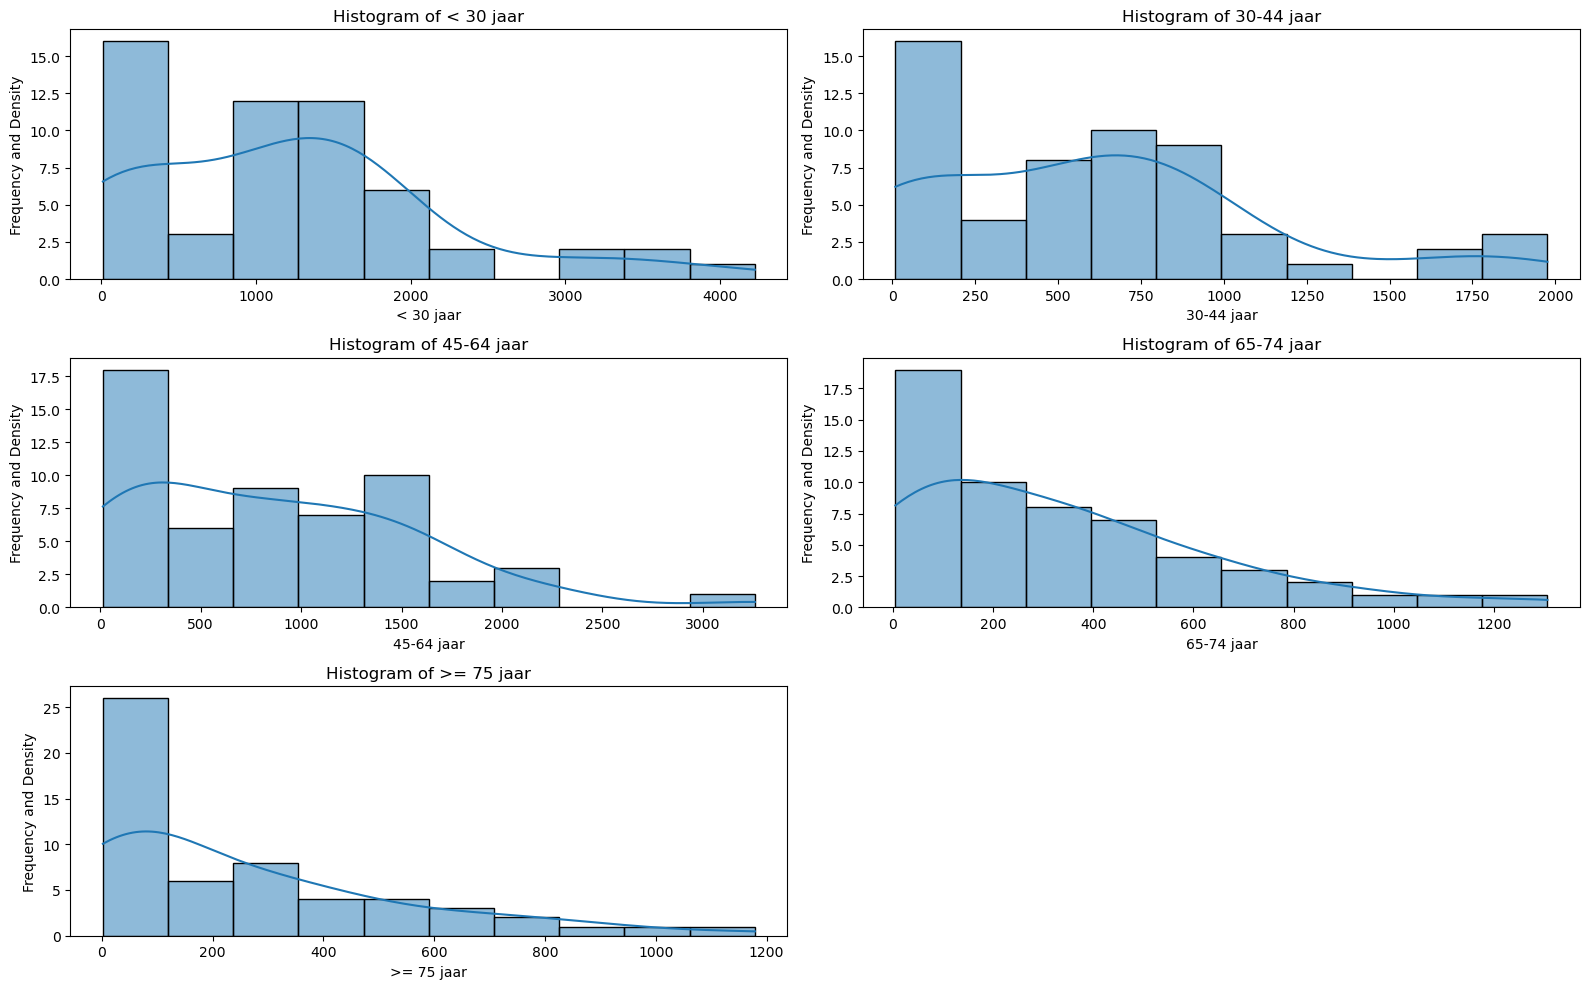

In [39]:
# Taking the columns of the dataset
columns = df_population.columns

# Calculate the number of subplots needed
num_subplots = len(columns)

# Determine the number of rows and columns for the subplots
num_rows = (num_subplots + 1) // 2  # Round up to the nearest integer
num_cols = 2

# Creating a figure and subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(16, 10))

# Flatten the axes array
axes = axes.flatten()

# Loop through the columns and create the histograms
for i, column in enumerate(columns):
    ax = axes[i]  # Get the corresponding axis
    sns.histplot(df_population[column], ax=ax, kde=True, bins=10)

    # Labeling the figure
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency and Density')

# Remove any extra empty subplot
if num_subplots < len(axes):
    for j in range(num_subplots, len(axes)):
        fig.delaxes(axes[j])

# Plot the visualizations
plt.tight_layout()
plt.show()

# Region

In [40]:
df_region.shape

(56, 13)

In [41]:
df_region.head(10)

OBJECTID BUURTCODE               BUURT   OPPERVLAKTE WOONPLAATS GEMEENTE   
0       117      0601         Kievitsloop  8.673975e+05      Breda    Breda  \
1       118      0503         Princenhage  2.635851e+06      Breda    Breda   
2       119      0203         Heusdenhout  1.522862e+06      Breda    Breda   
3       120      0709  Buitengebied Bavel  8.558344e+06      Bavel    Breda   
4       121      0002              Chassé  4.089054e+05      Breda    Breda   
5       122      0309             Mastbos  1.340741e+07      Breda    Breda   
6       123      0302           Overakker  1.341355e+06      Breda    Breda   
7       124      0001          Valkenberg  4.146800e+05      Breda    Breda   
8       125      0201           Sportpark  1.216742e+06      Breda    Breda   
9       126      0004         Schorsmolen  2.763711e+05      Breda    Breda   

               WIJK WIJKCODE GEMEENTECODE WOONPLAATSCODE   Shape__Area   
0  Breda noord-west       06         0758           3622  8.673975e+05  \
1        Breda west       05         0758           3622  2.635851e+06   
2        Breda oost       02         0758           3622  1.522863e+06   
3             Bavel       07         0758           3624  8.558344e+06   
4     Breda centrum       00         0758           3622  4.089054e+05   
5   Breda zuid-oost       03         0758           3622  1.340741e+07   
6   Breda zuid-oost       03         0758           3622  1.341355e+06   
7     Breda centrum       00         0758           3622  4.146800e+05   
8        Breda oost       02         0758           3622  1.216742e+06   
9     Breda centrum       00         0758           3622  2.763711e+05   

   Shape__Length                                           geometry  
0    4537.349925  POLYGON ((4.75141 51.61890, 4.75136 51.61882, ...  
1    9091.953572  POLYGON ((4.74373 51.57291, 4.74363 51.57176, ...  
2    6566.784776  POLYGON ((4.82923 51.59268, 4.82853 51.59194, ...  
3   20311.346552  POLYGON ((4.87119 51.56827, 4.87135 51.56790, ...  
4    3180.458017  POLYGON ((4.78630 51.58690, 4.78298 51.58366, ...  
5   18318.224255  POLYGON ((4.78953 51.55290, 4.78953 51.55285, ...  
6    6715.777718  POLYGON ((4.81183 51.56596, 4.81192 51.56569, ...  
7    2967.730359  POLYGON ((4.78814 51.59321, 4.78819 51.59320, ...  
8    4648.061381  POLYGON ((4.80402 51.58156, 4.80539 51.57977, ...  
9    2549.950857  POLYGON ((4.77195 51.58990, 4.77103 51.58887, ...

In [42]:
df_region.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   OBJECTID        56 non-null     int64   
 1   BUURTCODE       56 non-null     object  
 2   BUURT           56 non-null     object  
 3   OPPERVLAKTE     56 non-null     float64 
 4   WOONPLAATS      56 non-null     object  
 5   GEMEENTE        56 non-null     object  
 6   WIJK            56 non-null     object  
 7   WIJKCODE        56 non-null     object  
 8   GEMEENTECODE    56 non-null     object  
 9   WOONPLAATSCODE  56 non-null     object  
 10  Shape__Area     56 non-null     float64 
 11  Shape__Length   56 non-null     float64 
 12  geometry        56 non-null     geometry
dtypes: float64(3), geometry(1), int64(1), object(8)
memory usage: 5.8+ KB


<Axes: >

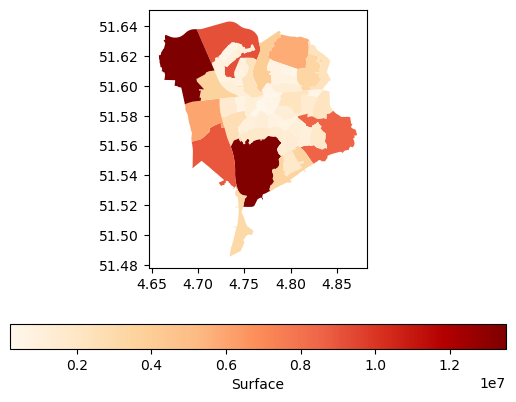

In [43]:
# Plotting a map
df_region.plot(column='OPPERVLAKTE',
               legend=True,
               legend_kwds={'label':'Surface', 'orientation':'horizontal'},
               cmap='OrRd')

# Education

In [44]:
df_education.shape

(56, 11)

In [45]:
df_education.head(10)

Unnamed: 0         Buurten Opleidingsniveau 15-75-jarigen - Laag|2019   
0           0      Valkenberg                                        240  \
1           1          Chassé                                        340   
2           2      Fellenoord                                        410   
3           3     Schorsmolen                                        390   
4           4         Station                                        360   
5           5            City                                        240   
6           6         Belcrum                                        510   
7           7  Doornbos-Linie                                       1080   
8           8        Biesdonk                                       1400   
9           9     Geeren-zuid                                       1250   

  Opleidingsniveau 15-75-jarigen - Laag|2020   
0                                        240  \
1                                        230   
2                                        430   
3                                        390   
4                                        280   
5                                        230   
6                                        520   
7                                        960   
8                                       1480   
9                                       1240   

  Opleidingsniveau 15-75-jarigen - Laag|2021   
0                                        230  \
1                                        340   
2                                        440   
3                                        440   
4                                        250   
5                                        220   
6                                        520   
7                                       1020   
8                                       1430   
9                                       1110   

  Opleidingsniveau 15-75-jarigen - Midden|2019   
0                                          740  \
1                                          900   
2                                          580   
3                                         1160   
4                                          730   
5                                         1160   
6                                         1060   
7                                         1460   
8                                         1480   
9                                         1050   

   Opleidingsniveau 15-75-jarigen - Midden|2020   
0                                           NaN  \
1                                           NaN   
2                                           NaN   
3                                           NaN   
4                                           NaN   
5                                           NaN   
6                                           NaN   
7                                           NaN   
8                                           NaN   
9                                           NaN   

   Opleidingsniveau 15-75-jarigen - Midden|2021   
0                                           NaN  \
1                                           NaN   
2                                           NaN   
3                                           NaN   
4                                           NaN   
5                                           NaN   
6                                           NaN   
7                                           NaN   
8                                           NaN   
9                                           NaN   

  Opleidingsniveau 15-75-jarigen - Hoog|2019   
0                                        780  \
1                                       1440   
2                                        390   
3                                       1410   
4                                        970   
5                                       1010   
6                                       1570   
7                                       1020   
8

In [46]:
df_education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0                                    56 non-null     int64  
 1   Buurten                                       56 non-null     object 
 2   Opleidingsniveau 15-75-jarigen - Laag|2019    56 non-null     object 
 3   Opleidingsniveau 15-75-jarigen - Laag|2020    56 non-null     object 
 4   Opleidingsniveau 15-75-jarigen - Laag|2021    56 non-null     object 
 5   Opleidingsniveau 15-75-jarigen - Midden|2019  56 non-null     object 
 6   Opleidingsniveau 15-75-jarigen - Midden|2020  0 non-null      float64
 7   Opleidingsniveau 15-75-jarigen - Midden|2021  0 non-null      float64
 8   Opleidingsniveau 15-75-jarigen - Hoog|2019    56 non-null     object 
 9   Opleidingsniveau 15-75-jarigen - Hoog|2020    56 non-null     objec

In [47]:
df_education = df_education.drop(['Unnamed: 0', 'Opleidingsniveau 15-75-jarigen - Midden|2020', 'Opleidingsniveau 15-75-jarigen - Midden|2021'], axis=1)

In [48]:
df_education['Buurten'].unique

<bound method Series.unique of 0                   Valkenberg
1                       Chassé
2                   Fellenoord
3                  Schorsmolen
4                      Station
5                         City
6                      Belcrum
7               Doornbos-Linie
8                     Biesdonk
9                  Geeren-zuid
10                   Wisselaar
11                     Krogten
12                Geeren-noord
13                 Waterdonken
14                 Brabantpark
15                   Sportpark
16                    Zandberg
17                 Heusdenhout
18              Moleneind-oost
19                    Hoogeind
20                  Blauwe Kei
21                     Ypelaar
22                   Overakker
23                    Ginneken
24                     Mastbos
25                    Boeimeer
26                  Ruitersbos
27                   Haagpoort
28                      Heuvel
29                    Tuinzigt
30                 Princenhage
31      

In [49]:
# Filtering the data by removing the '?'
df_education = df_education[df_education['Opleidingsniveau 15-75-jarigen - Laag|2019'] != '?']

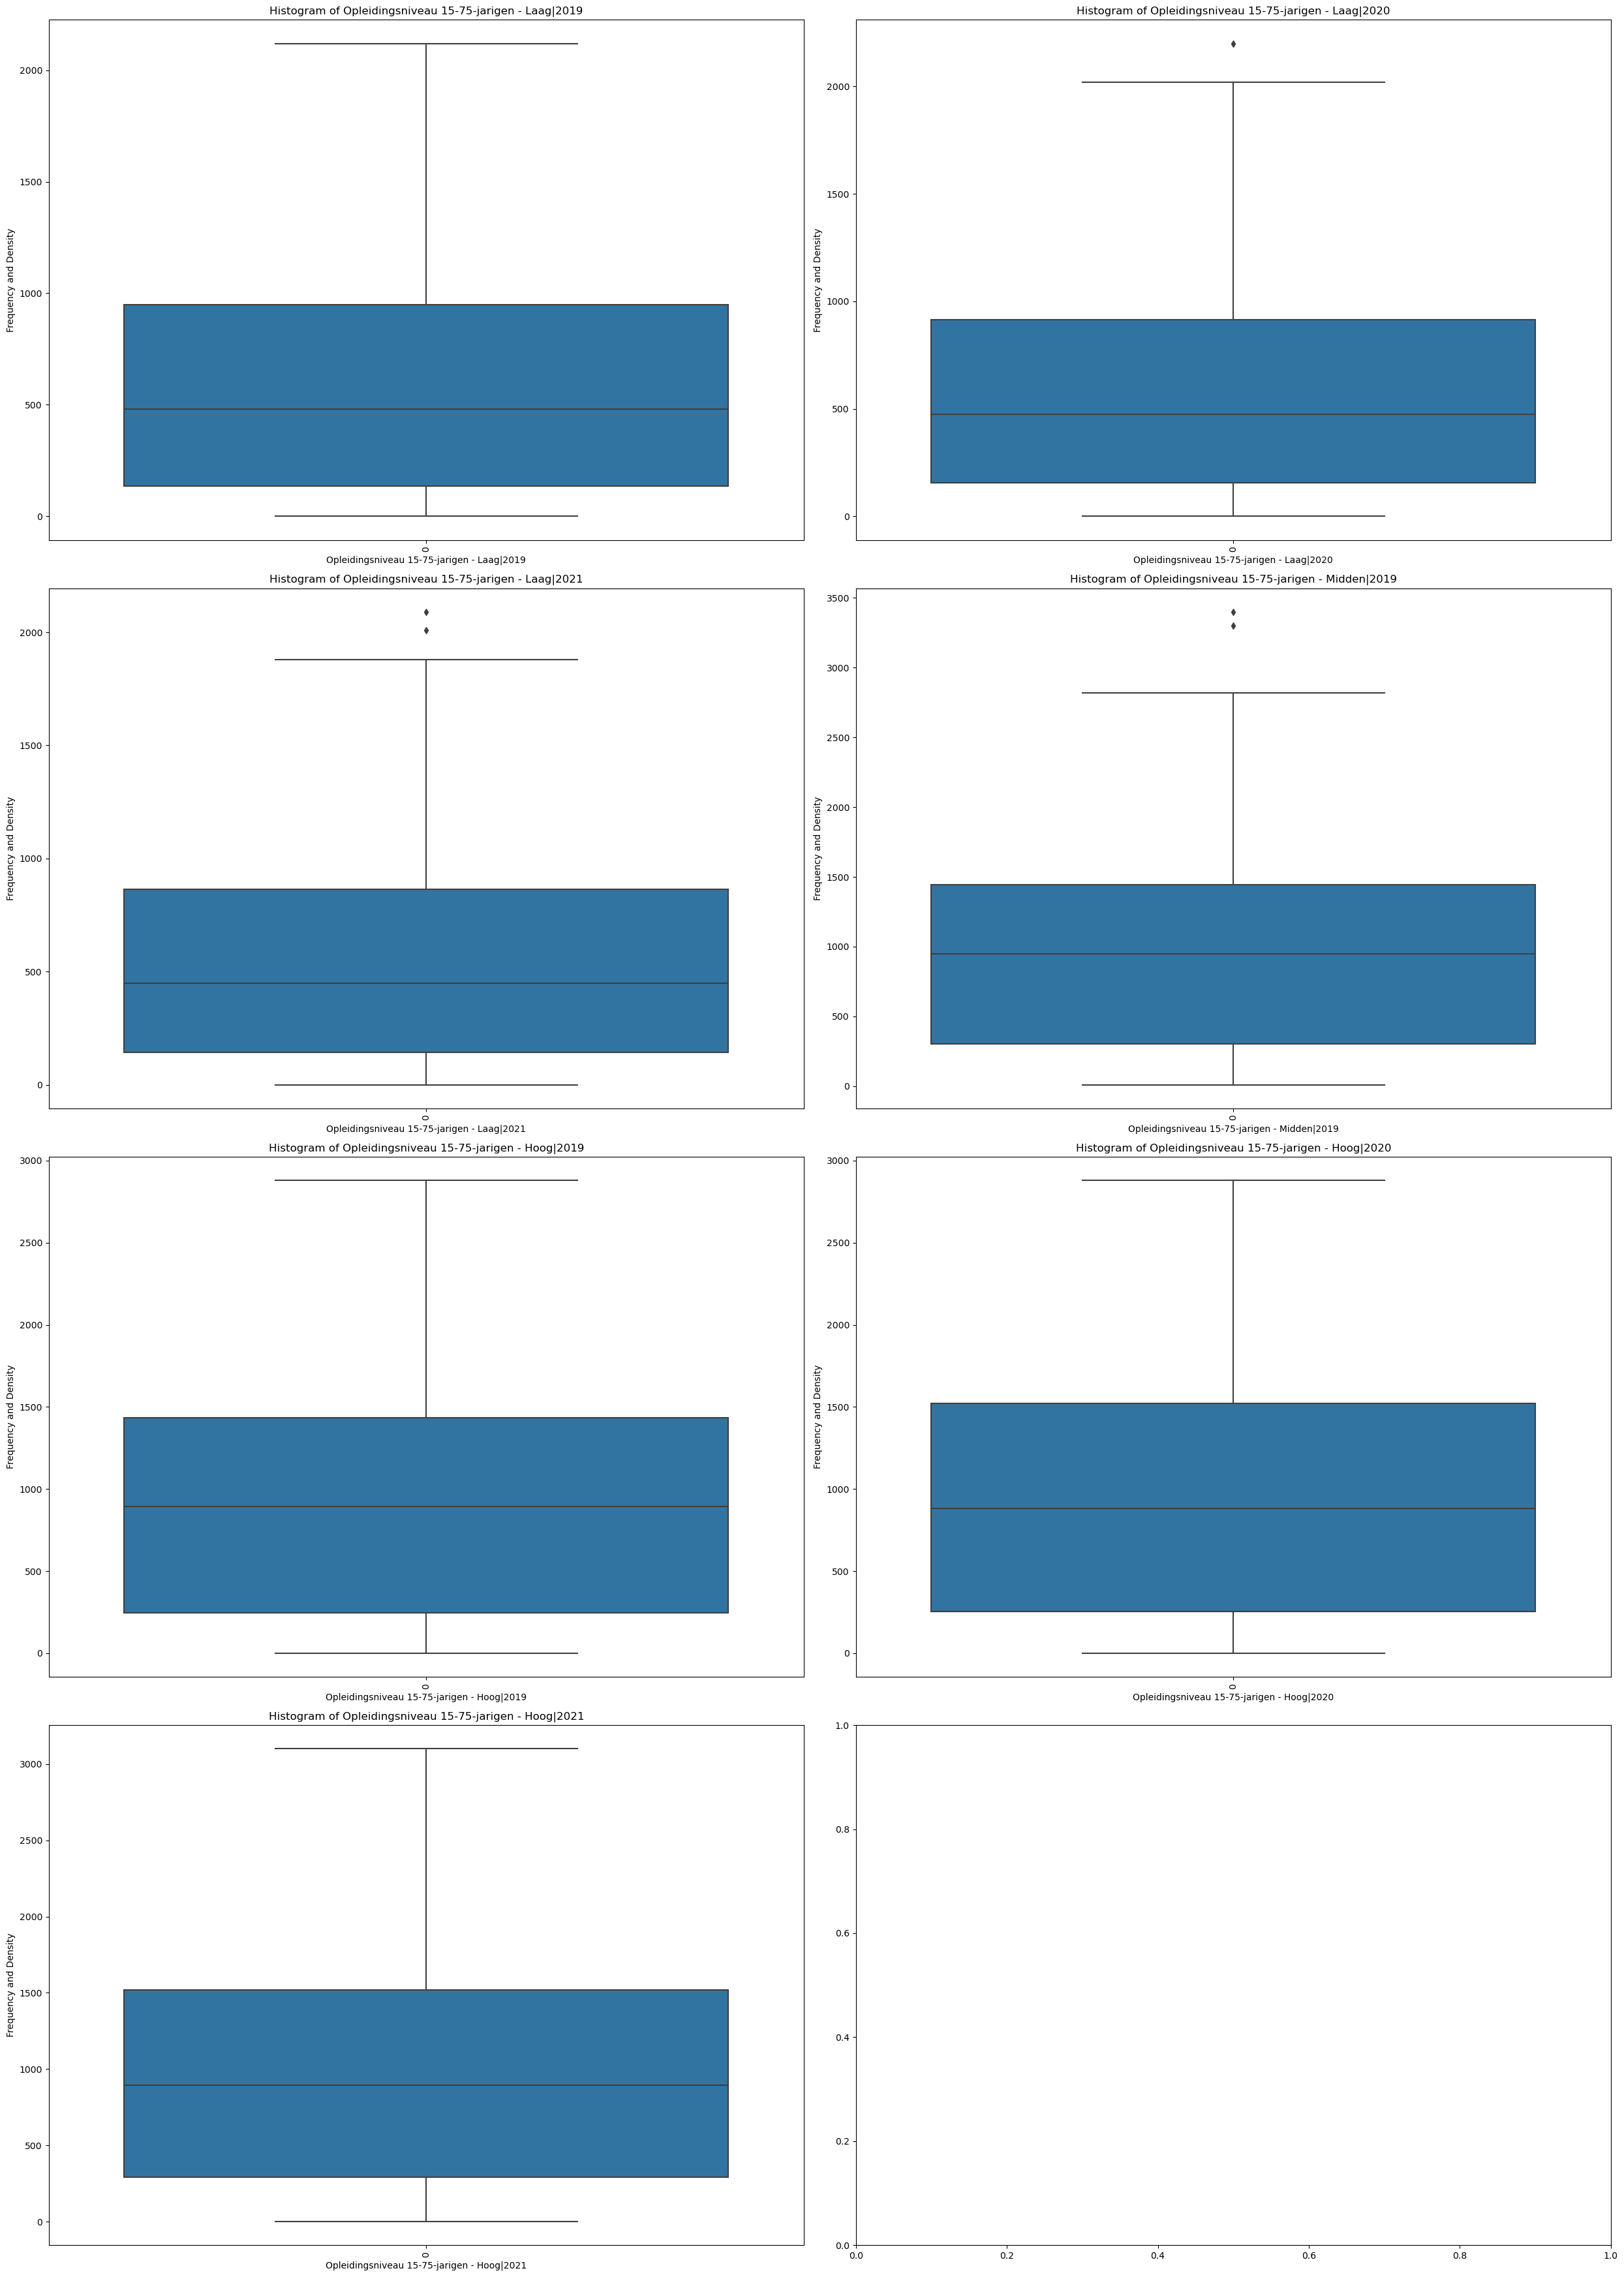

In [50]:
numerical = df_education.drop('Buurten', axis=1)

# Taking the column names
columns = numerical.columns

# Creating a figure
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(25, 35))

# Looping through columns name and index
for i, column in enumerate(columns):

    # Calculating the row and column index
    row_index = int(i / 2)
    col_index = i % 2

    # Defining axes with the calculated indexes
    ax = axes[row_index, col_index]
    # Creating a boxplot
    sns.boxplot(numerical[column], ax=ax)

    # Labeling the boxplots
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency and Density')
    ax.tick_params(axis='x', rotation=90)

# Plotting the figures
plt.tight_layout()
plt.show()

# Livablity + Green index

In [51]:
df_livability.shape

(198852, 9)

In [52]:
df_livability.head(10)

green_cbs_grid_code    year                image_id      latitude   
0          E1120N3992  2015.0  2R5bLlSyRwcrVPseNepASw    51,5804659  \
1          E1120N3992  2015.0  2R5bLlSyRwcrVPseNepASw    51,5804659   
2          E1097N4038  2009.0  2Rey6faDm1OJusJ-OYiw2w  51,621310478   
3          E1097N4038  2009.0  2Rey6faDm1OJusJ-OYiw2w  51,621310478   
4          E1097N4038  2009.0  2Rey6faDm1OJusJ-OYiw2w  51,621310478   
5          E1097N4038  2009.0  2Rey6faDm1OJusJ-OYiw2w  51,621310478   
6          E1105N4015  2016.0  22dmJG5d560PlMmmIIvRnQ   51,60091948   
7          E1105N4015  2016.0  22dmJG5d560PlMmmIIvRnQ   51,60091948   
8          E1105N4015  2016.0  22dmJG5d560PlMmmIIvRnQ   51,60091948   
9          E1105N4015  2016.0  22dmJG5d560PlMmmIIvRnQ   51,60091948   

      longitude        date  green_score livability_cbs_grid_code   
0   4,767210326  2015-07-01         27.0               E1120N3992  \
1   4,767210326  2015-07-01         16.0               E1120N3992   
2  4,7339316807  2009-07-01         27.0               E1097N4038   
3  4,7339316807  2009-07-01         20.0               E1097N4038   
4  4,7339316807  2009-07-01         18.0               E1097N4038   
5  4,7339316807  2009-07-01         11.0               E1097N4038   
6  4,7461460621  2016-08-01         59.0               E1105N4015   
7  4,7461460621  2016-08-01         46.0               E1105N4015   
8  4,7461460621  2016-08-01         38.0               E1105N4015   
9  4,7461460621  2016-08-01         28.0               E1105N4015   

   livability_score  
0          2.521296  
1          2.521296  
2          2.136675  
3          2.136675  
4          2.136675  
5          2.136675  
6          2.360584  
7          2.360584  
8          2.360584  
9          2.360584

In [53]:
df_livability.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198852 entries, 0 to 198851
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   green_cbs_grid_code       198612 non-null  object 
 1   year                      198612 non-null  float64
 2   image_id                  198612 non-null  object 
 3   latitude                  198612 non-null  object 
 4   longitude                 198612 non-null  object 
 5   date                      198612 non-null  object 
 6   green_score               198612 non-null  float64
 7   livability_cbs_grid_code  198852 non-null  object 
 8   livability_score          198852 non-null  float64
dtypes: float64(3), object(6)
memory usage: 13.7+ MB


In [54]:
df_livability = df_livability[~df_livability['green_cbs_grid_code'].isnull()] # Removing the null values

In [55]:
print('Number of duplicated rows:', df_livability.duplicated().sum()) # Checking for duplicates

Number of duplicated rows: 12324


In [56]:
df_livability = df_livability.drop_duplicates('green_cbs_grid_code')

Text(0, 0.5, 'Green_score')

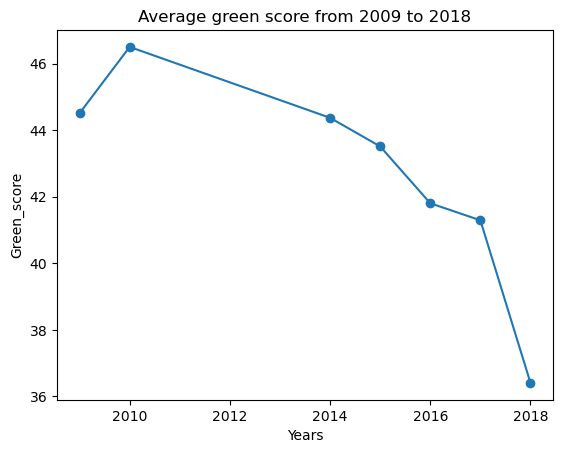

In [57]:
# Aggregating the data by year and taking the average of green score
green_index_period = df_livability.groupby('year', as_index=False)['green_score'].mean()

# Creating a line chart
plt.plot(green_index_period['year'], green_index_period['green_score'], marker='o')
plt.title('Average green score from 2009 to 2018')
plt.xlabel('Years')
plt.ylabel('Green_score')

# Nuisance per neighborhood in Breda

In [58]:
df_nuisance.shape

(69, 10)

In [59]:
df_nuisance.head(10)

Districts and neighbourhoods  Total registrations nuisance number   
0                        Breda                                532.0  \
1            Breda City Center                                129.0   
2                   Valkenberg                                 18.0   
3                       Chassé                                 17.0   
4                   Fellenoord                                 13.0   
5                    Bark mill                                 12.0   
6                      Station                                 17.0   
7                         City                                 52.0   
8                  Breda north                                102.0   
9                      Belcrum                                 14.0   

   Nuisance caused by confused person number  Report nuisance youth number   
0                                      183.0                          94.0  \
1                                       41.0                          10.0   
2                                        4.0                           1.0   
3                                        9.0                           0.0   
4                                       11.0                           0.0   
5                                        3.0                           1.0   
6                                        3.0                           0.0   
7                                       11.0                           8.0   
8                                       33.0                          22.0   
9                                        5.0                           0.0   

   Nuisance due to alcohol / drugs  Nuisance vagrants  Public drunkenness   
0                             74.0               77.0                 5.0  \
1                             33.0               32.0                 3.0   
2                              3.0                7.0                 0.0   
3                              3.0                5.0                 0.0   
4                              1.0                0.0                 0.0   
5                              3.0                4.0                 0.0   
6                              5.0                6.0                 0.0   
7                             18.0               10.0                 3.0   
8                              9.0               23.0                 2.0   
9                              1.0                7.0                 1.0   

   Noise pollution in the catering industry  Event noise pollution   
0                                       2.0                    1.0  \
1                                       1.0                    0.0   
2                                       1.0                    0.0   
3                                       0.0                    0.0   
4                                       0.0                    0.0   
5                                       0.0                    0.0   
6                                       0.0                    0.0   
7                                       0.0                    0.0   
8                                       0.0                    0.0   
9                                       0.0                    0.0   

   Other noise pollution  
0                   96.0  
1                    9.0  
2                    2.0  
3                    0.0  
4                    1.0  
5                    1.0  
6                    3.0  
7                    2.0  
8                   13.0  
9                    0.0

In [60]:
df_nuisance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Districts and neighbourhoods               69 non-null     object 
 1   Total registrations nuisance number        68 non-null     float64
 2   Nuisance caused by confused person number  68 non-null     float64
 3   Report nuisance youth number               68 non-null     float64
 4   Nuisance due to alcohol / drugs            68 non-null     float64
 5   Nuisance vagrants                          68 non-null     float64
 6   Public drunkenness                         68 non-null     float64
 7   Noise pollution in the catering industry   68 non-null     float64
 8   Event noise pollution                      68 non-null     float64
 9   Other noise pollution                      68 non-null     float64
dtypes: float64(9), object(1)
mem

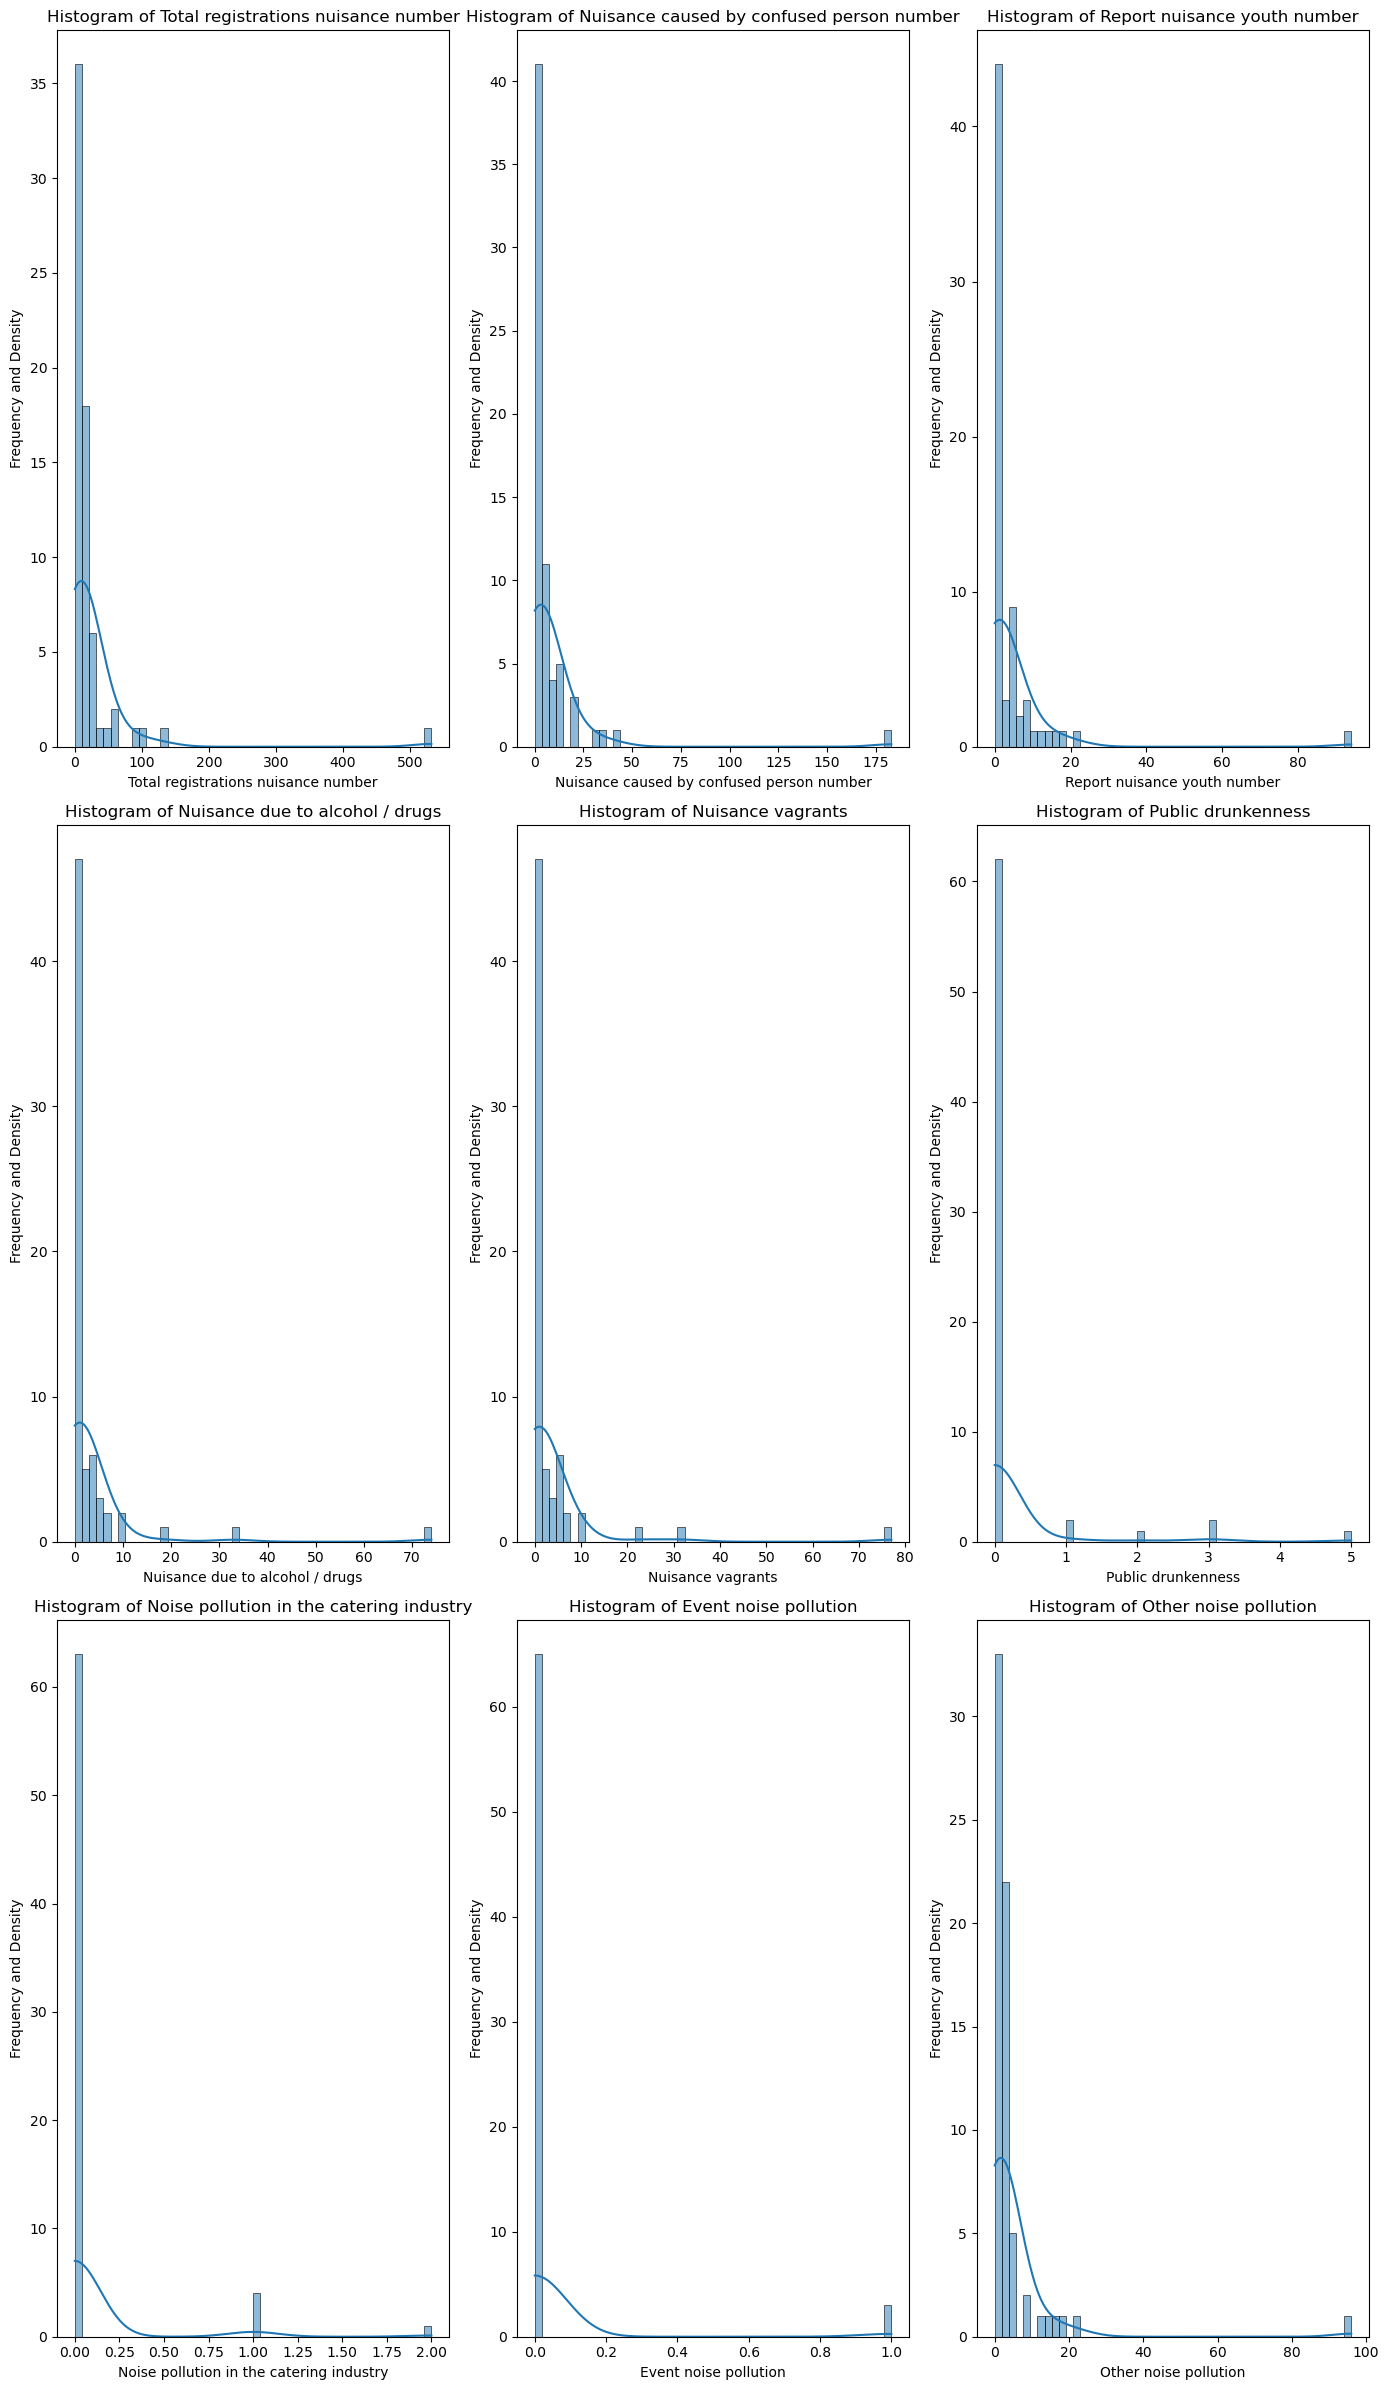

In [61]:
# Checking the data distribution of nuisance
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(14, 4*6))

# Taking the numerical columns 
numerical = df_nuisance.drop('Districts and neighbourhoods', axis=1)
numerical_columns = numerical.columns

# Looping through the columns names and indexes
for i, column in enumerate(numerical_columns):

    # Calculating column and row indexes
    row_index = int(i / 3)
    col_index = i % 3

    # Defining axes with the calculated indexes
    ax = axes[row_index, col_index]
    # Creating a histplot
    sns.histplot(df_nuisance[column], ax=ax, kde=True, bins=50)

    # Labeling the visualization
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency and Density')

# Plotting the figure
plt.tight_layout()
plt.show()

/tmp/ipykernel_52520/3501605534.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20').colors[:len(labels)]


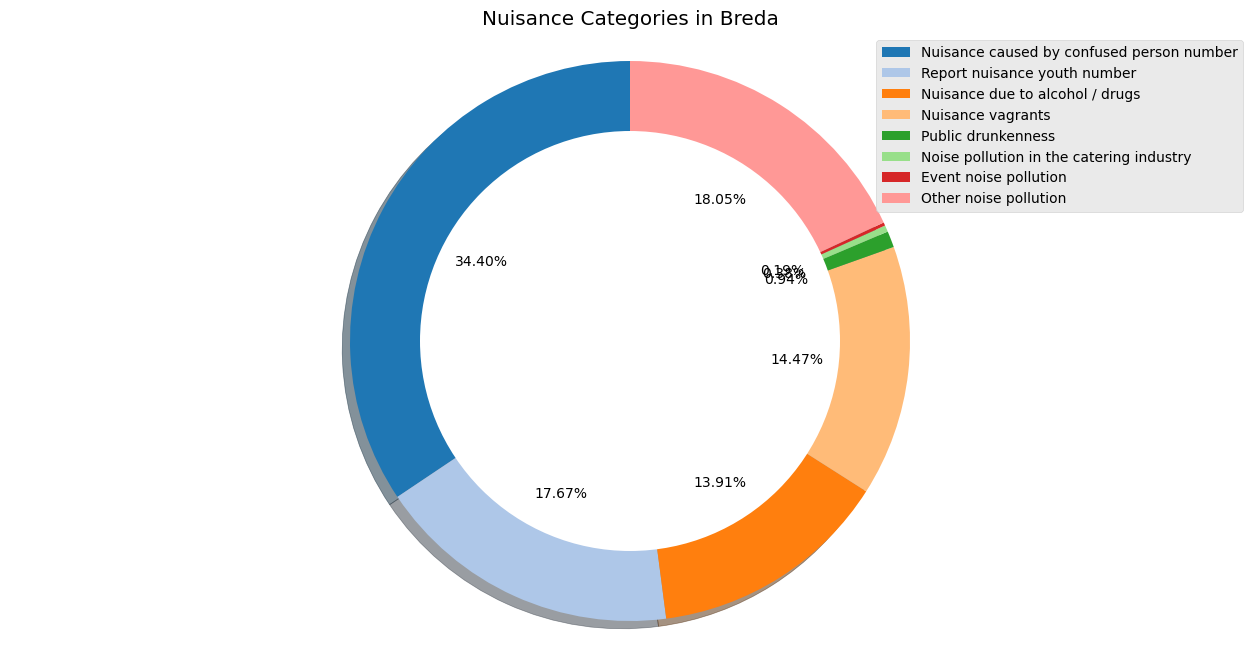

In [62]:
# Specifying the data for the chart 
data = df_nuisance[df_nuisance['Districts and neighbourhoods'] == 'Breda']
data = data.drop(['Districts and neighbourhoods', 'Total registrations nuisance number'], axis=1)
labels = data.columns
data = data.sum(axis=0)

plt.figure(figsize=(16, 8))

# Setting the colors for the chart
colors = plt.cm.get_cmap('tab20').colors[:len(labels)]

# Defining the chart
plt.style.use('ggplot')
wedges, _, text_autopct = plt.pie(x=data, labels=None, autopct='%.2f%%', shadow=True, startangle=90, colors=colors)
plt.legend(wedges, labels, loc='best')

# Making as a donut
circle = plt.Circle(xy=(0,0), radius=.75, facecolor='white')
plt.gca().add_artist(circle)

plt.axis('equal')
plt.title('Nuisance Categories in Breda')
plt.show()

# Educational level

In [63]:
df_educational_level.shape

(504, 5)

In [64]:
df_educational_level.head(20)

Unnamed: 0         Buurten level_of_education  Year value
0            0      Valkenberg               Laag  2019   240
1            1          Chassé               Laag  2019   340
2            2      Fellenoord               Laag  2019   410
3            3     Schorsmolen               Laag  2019   390
4            4         Station               Laag  2019   360
5            5            City               Laag  2019   240
6            6         Belcrum               Laag  2019   510
7            7  Doornbos-Linie               Laag  2019  1080
8            8        Biesdonk               Laag  2019  1400
9            9     Geeren-zuid               Laag  2019  1250
10          10       Wisselaar               Laag  2019  1370
11          11         Krogten               Laag  2019    50
12          12    Geeren-noord               Laag  2019   810
13          13     Waterdonken               Laag  2019    70
14          14     Brabantpark               Laag  2019  1970
15          15       Sportpark               Laag  2019   350
16          16        Zandberg               Laag  2019   410
17          17     Heusdenhout               Laag  2019   990
18          18  Moleneind-oost               Laag  2019     0
19          19        Hoogeind               Laag  2019    10

In [65]:
df_educational_level.drop('Unnamed: 0', axis=1, inplace=True)

In [66]:
df_educational_level.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Buurten             504 non-null    object
 1   level_of_education  504 non-null    object
 2   Year                504 non-null    int64 
 3   value               392 non-null    object
dtypes: int64(1), object(3)
memory usage: 15.9+ KB


In [67]:
print('Number of missing values:\n ', df_educational_level.isna().sum())
print('Number of duplicates: ', df_educational_level.duplicated().sum())

Number of missing values:
  Buurten                 0
level_of_education      0
Year                    0
value                 112
dtype: int64
Number of duplicates:  0


In [68]:
print('Number of missing values in each column:\n', df_educational_level.isna().sum()) # Checking for missing values

Number of missing values in each column:
 Buurten                 0
level_of_education      0
Year                    0
value                 112
dtype: int64


In [69]:
df_educational_level = df_educational_level[~df_educational_level['value'].isnull()] # Subsetting without the missing values

In [70]:
df_educational_level['level_of_education'].unique()

array([' Laag', ' Midden', ' Hoog'], dtype=object)

In [71]:
df_educational_level.rename(columns={'value':'number_of_people'}, inplace=True) # Renaming a column

In [72]:
df_educational_level['level_of_education'] = df_educational_level['level_of_education'].str.replace(' Laag', 'Low level')
df_educational_level['level_of_education'] = df_educational_level['level_of_education'].str.replace(' Midden', 'Middle level')
df_educational_level['level_of_education'] = df_educational_level['level_of_education'].str.replace(' Hoog', 'High level')

In [73]:
df_educational_level = df_educational_level[df_educational_level['number_of_people'] != '?'] # Removing the '?' from the data

In [74]:
df_educational_level['number_of_students'] = df_educational_level['number_of_people'].astype(int) # Converting to integer

In [75]:
df_educational_level_year = df_educational_level[df_educational_level['Year'] == 2021]
Buurten_level_of_education = df_educational_level_year.groupby(['Buurten', 'level_of_education'], as_index=False)['number_of_people'].mean() # Aggregating by neighbourhood and level of education

In [76]:
Buurten_level_of_education

Buurten level_of_education number_of_people
0        Bavel         High level           1540.0
1        Bavel          Low level            810.0
2      Belcrum         High level           1570.0
3      Belcrum          Low level            520.0
4     Biesdonk         High level            740.0
..         ...                ...              ...
103  Wisselaar          Low level           1260.0
104    Ypelaar         High level           1530.0
105    Ypelaar          Low level            970.0
106   Zandberg         High level           2310.0
107   Zandberg          Low level            380.0

[108 rows x 3 columns]

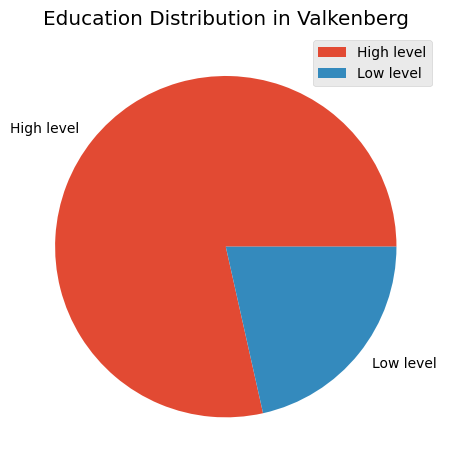

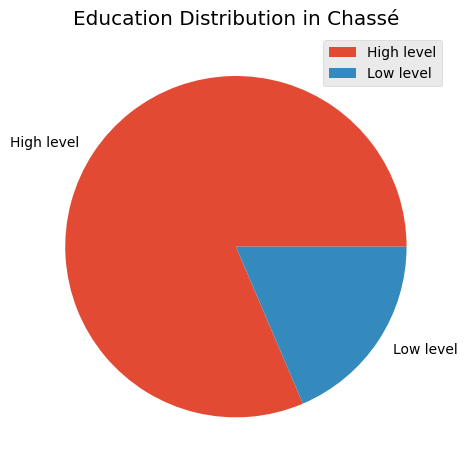

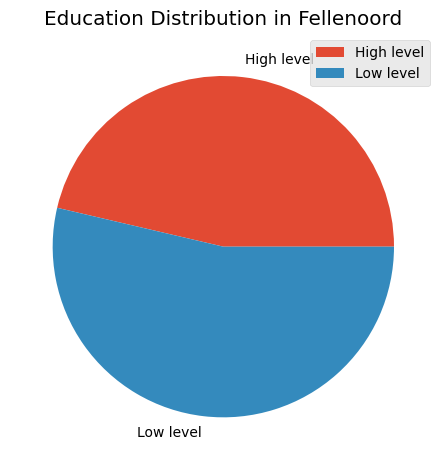

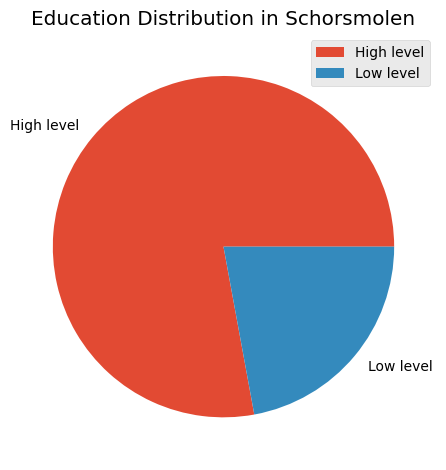

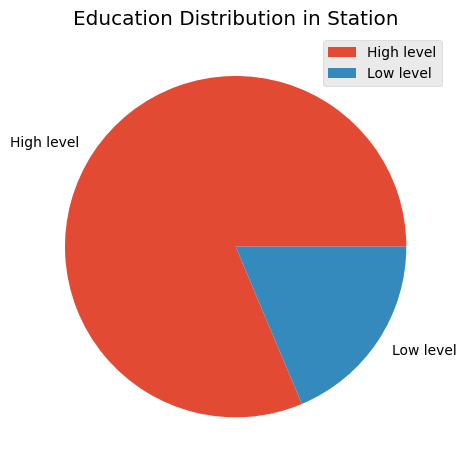

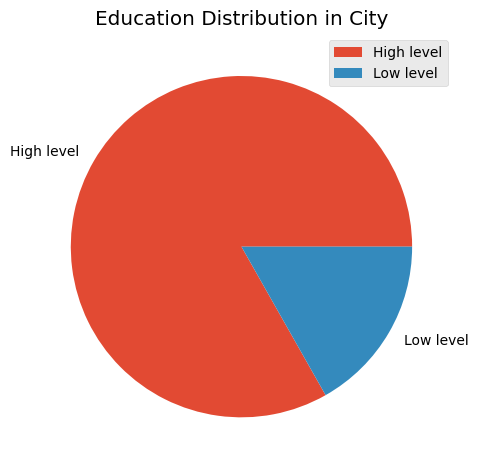

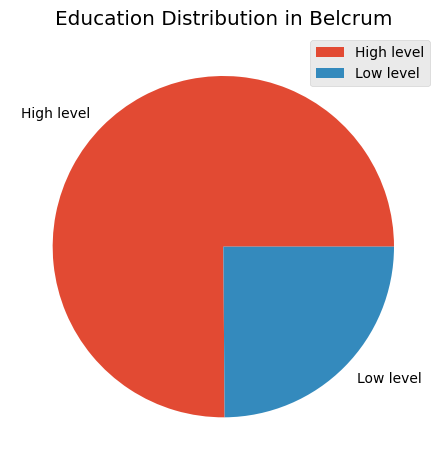

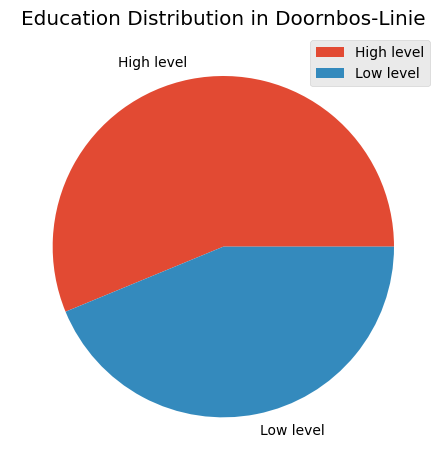

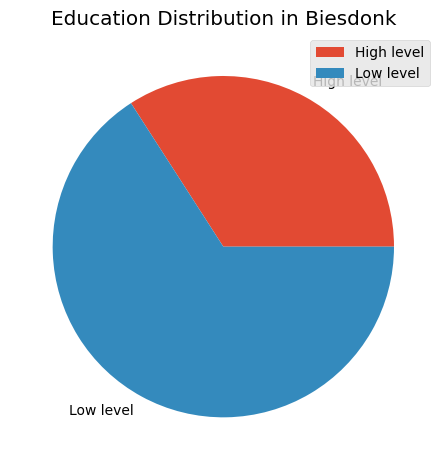

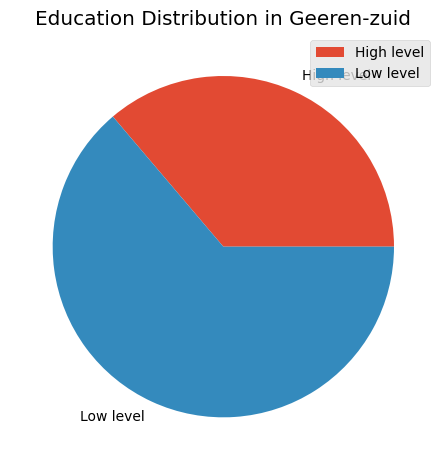

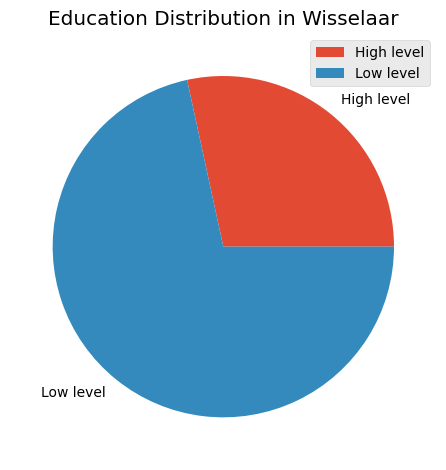

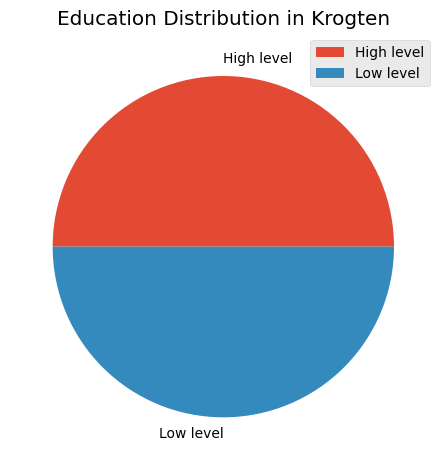

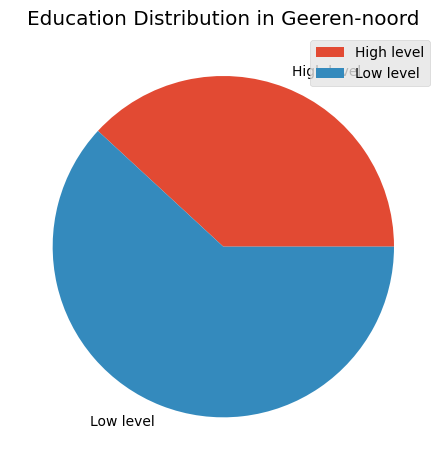

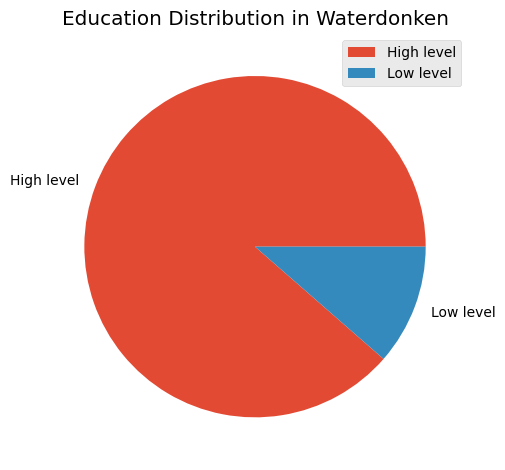

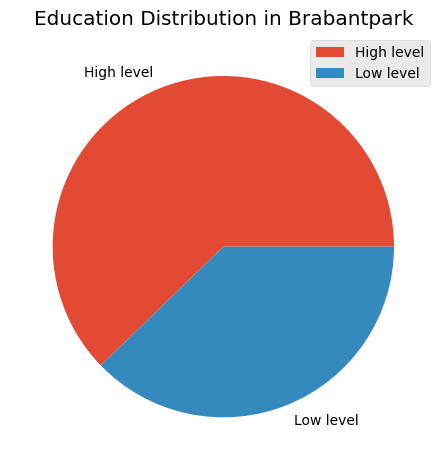

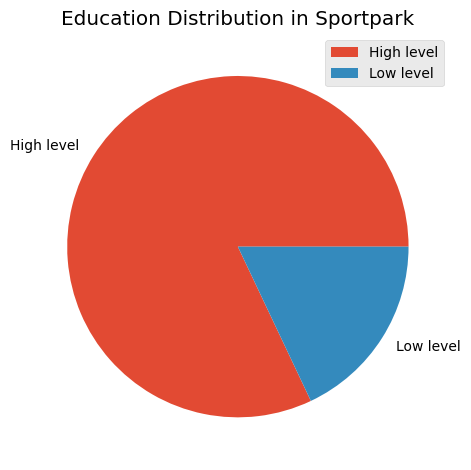

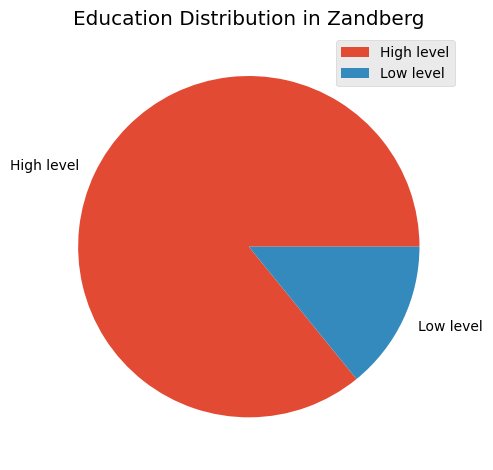

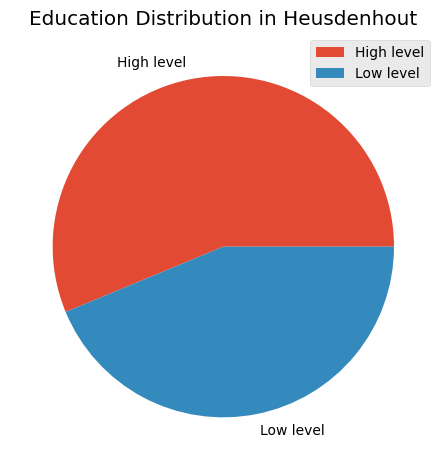

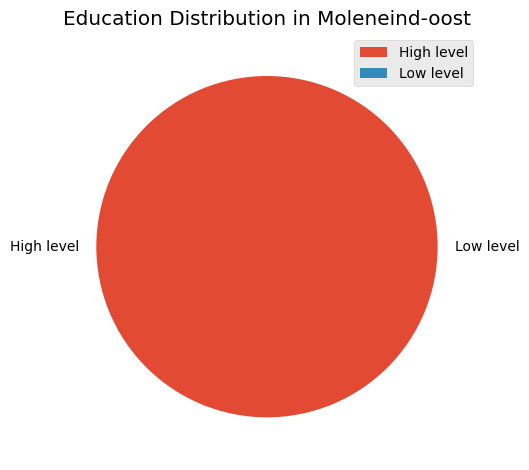

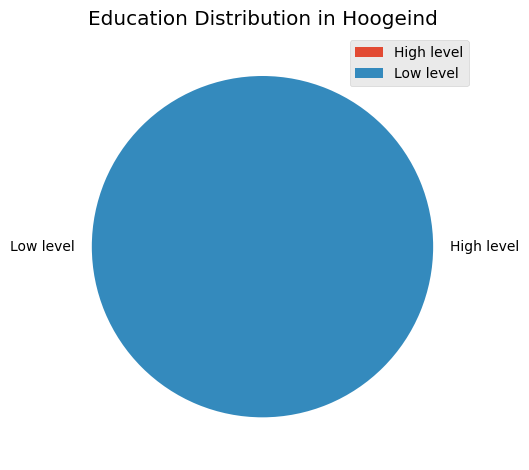

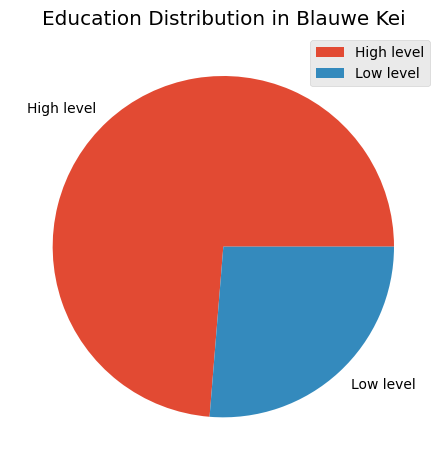

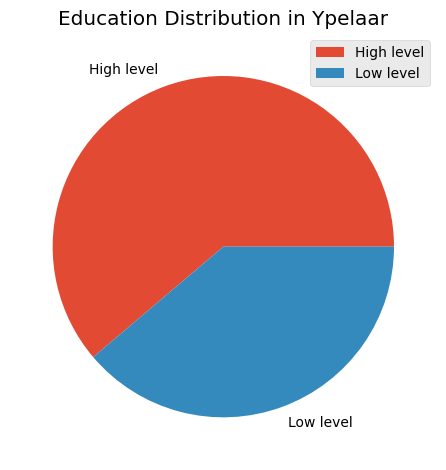

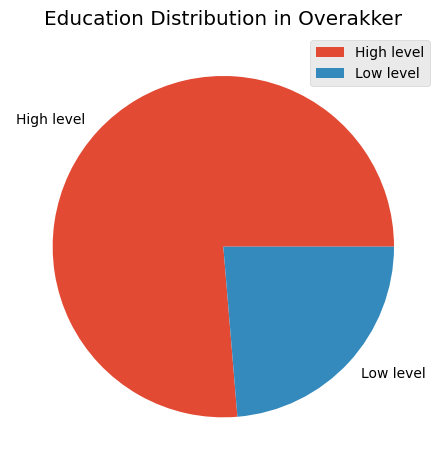

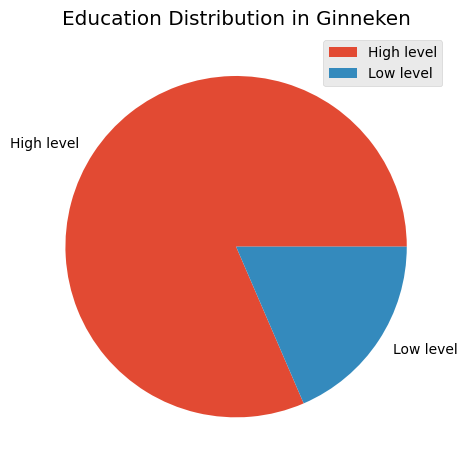

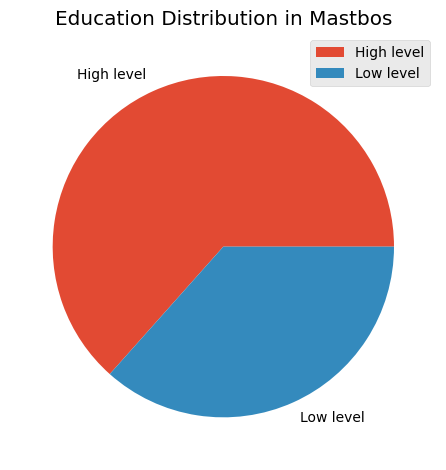

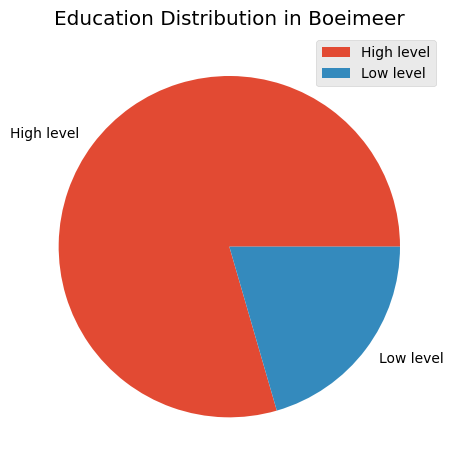

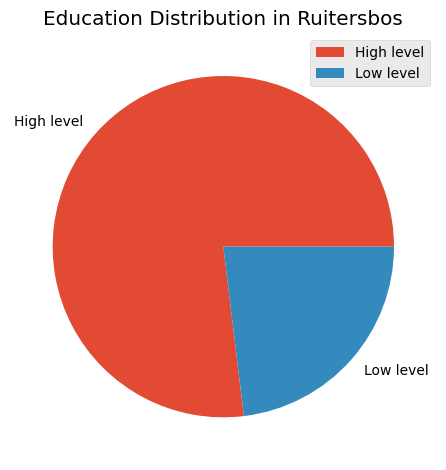

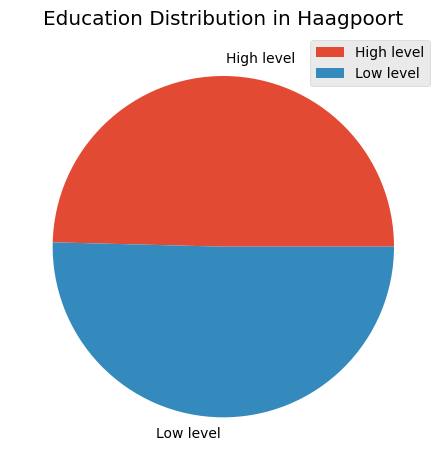

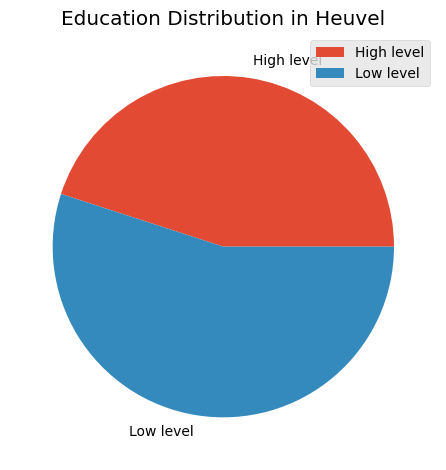

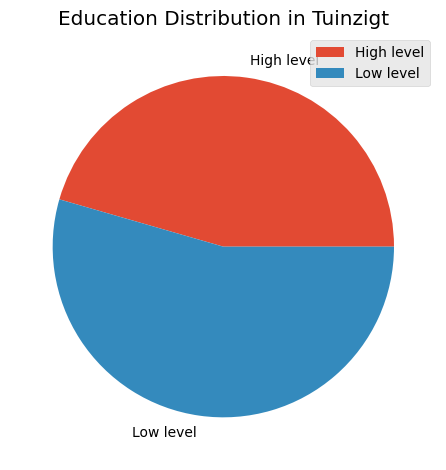

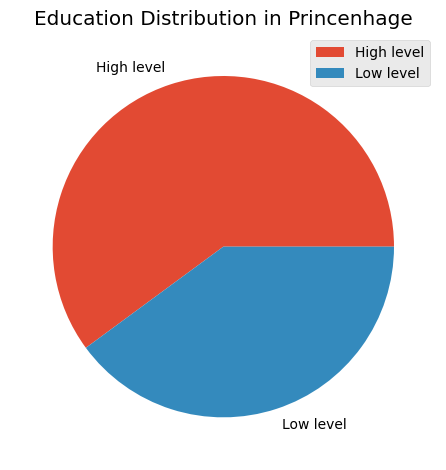

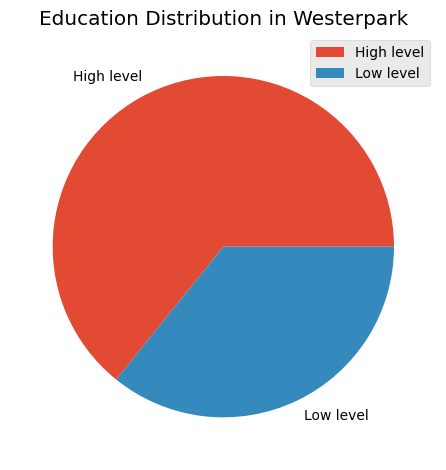

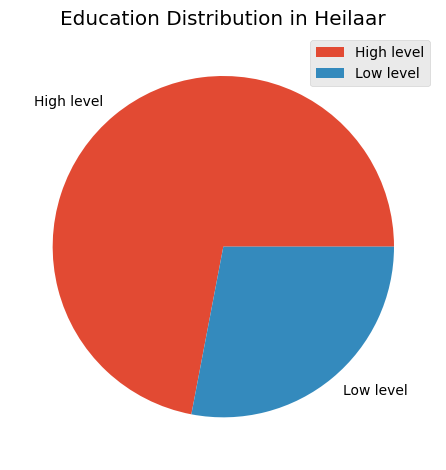

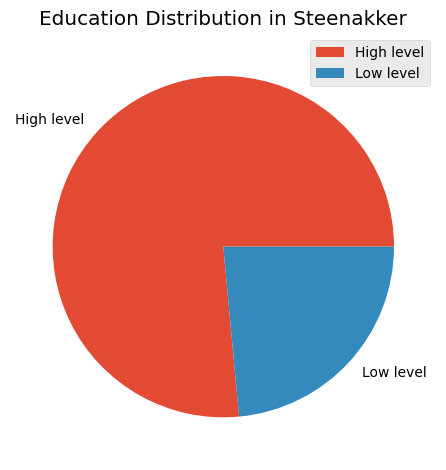

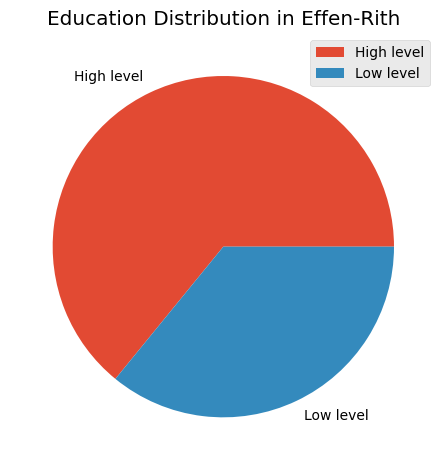

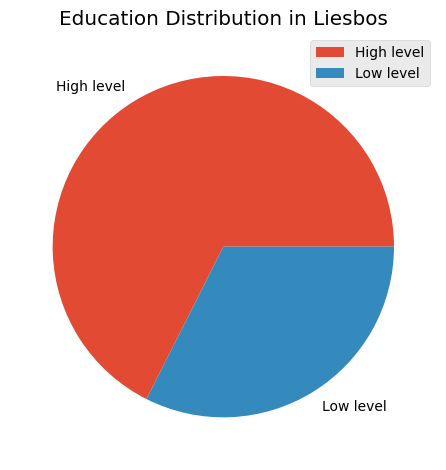

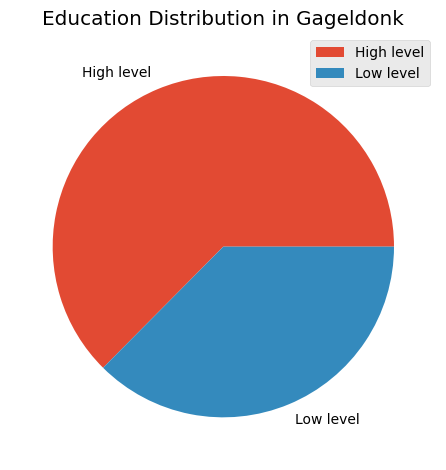

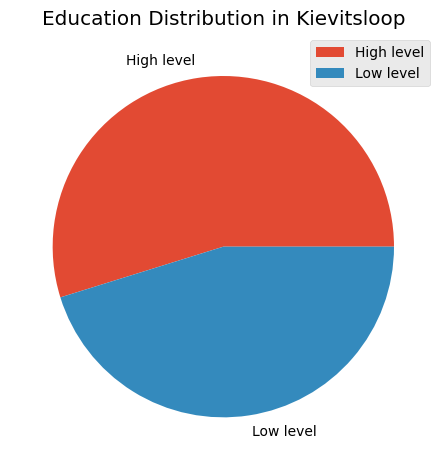

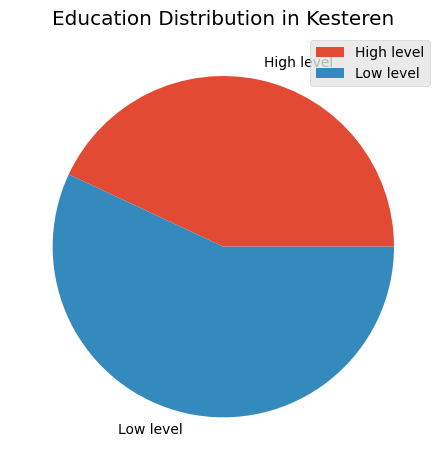

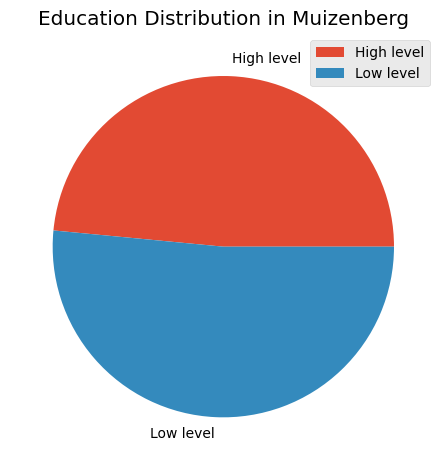

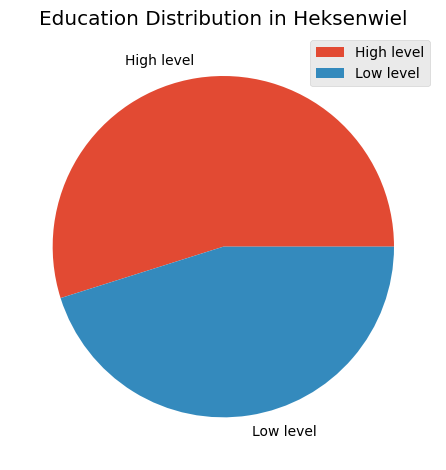

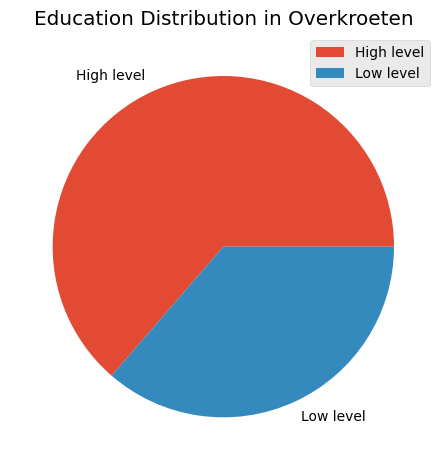

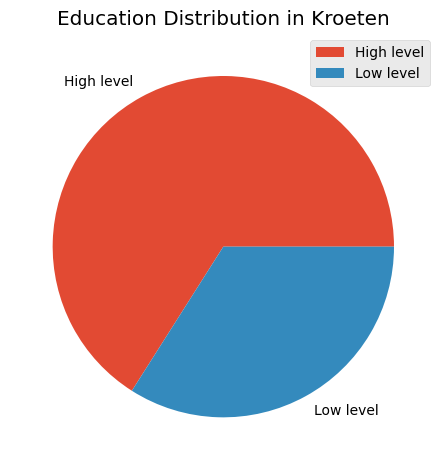

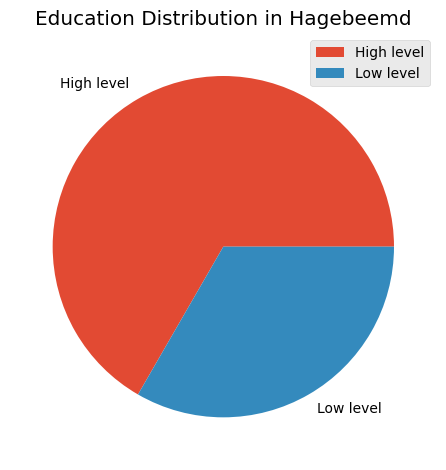

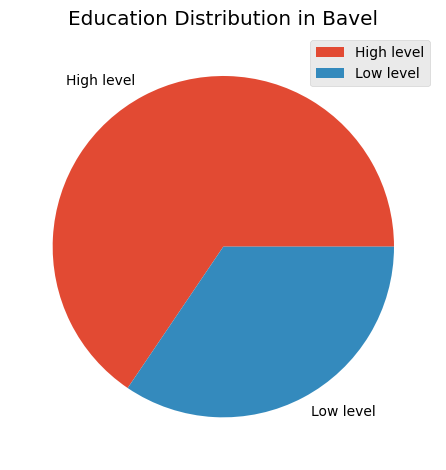

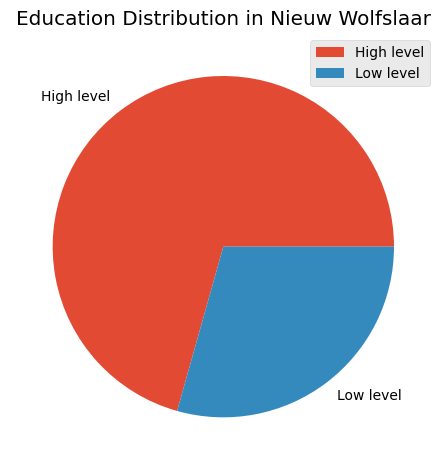

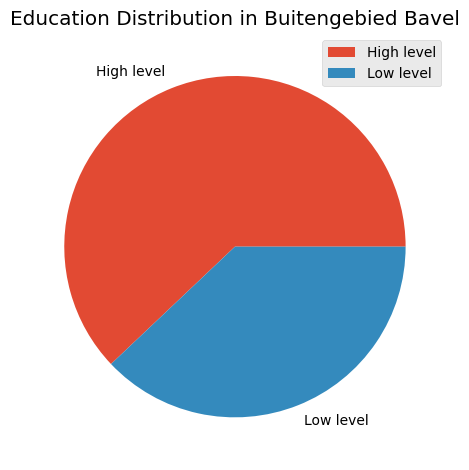

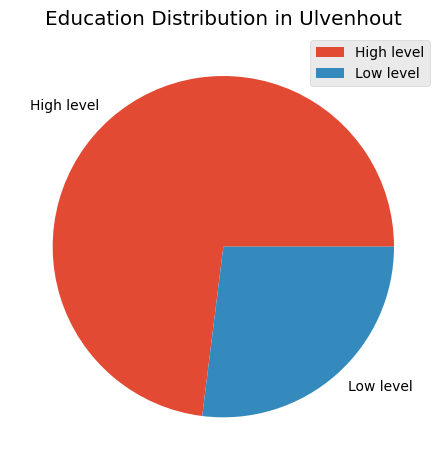

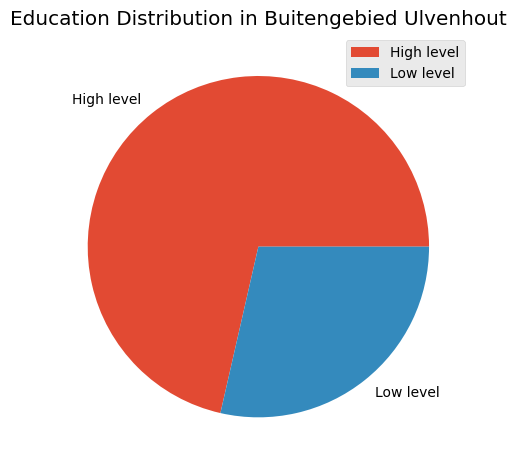

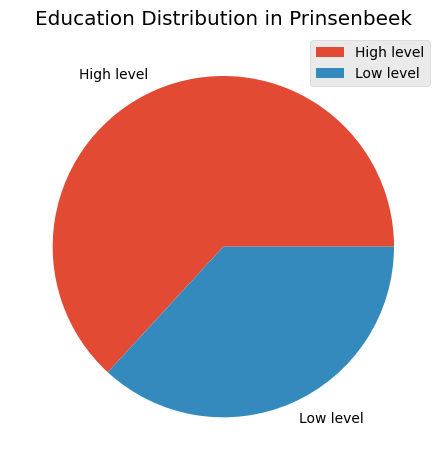

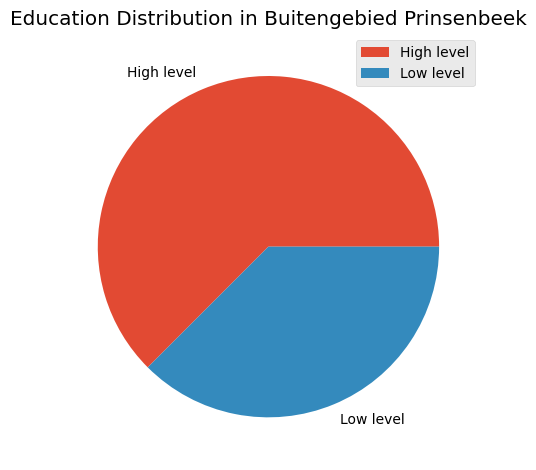

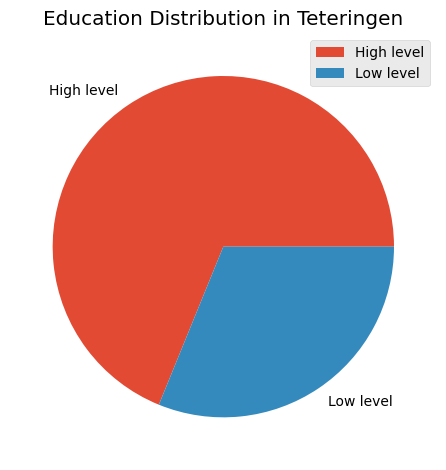

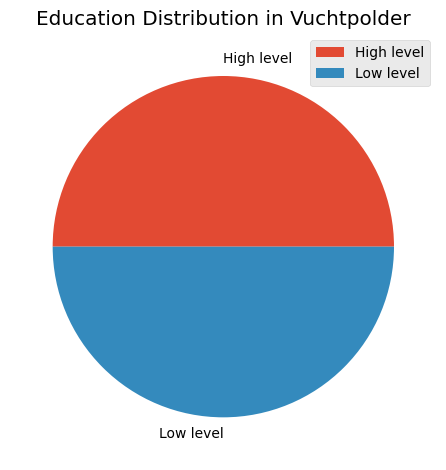

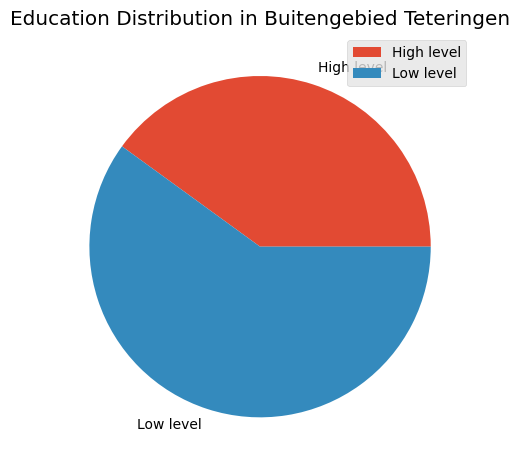

In [77]:
# Taking all cities
neighborhoods = df_educational_level['Buurten'].unique()

# Looping through neighborhoods
for neighborhood in neighborhoods:
    neighborhood_data = Buurten_level_of_education[Buurten_level_of_education['Buurten'] == neighborhood] # Subsetting the data with the respective neighborhood
    
    plt.figure()
    plt.pie(neighborhood_data['number_of_people'], labels=neighborhood_data['level_of_education']) # Defining a chart
    plt.title(f"Education Distribution in {neighborhood}") # Labeling the chart
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

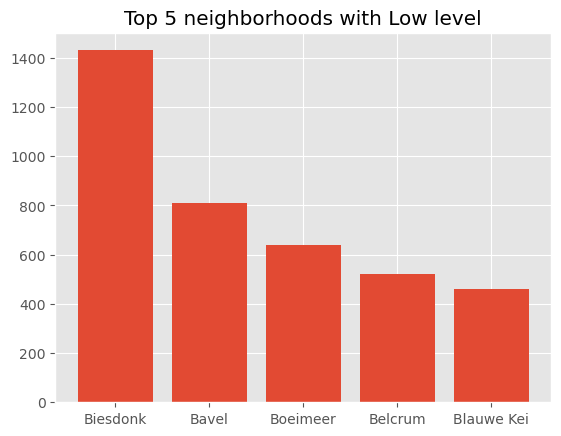

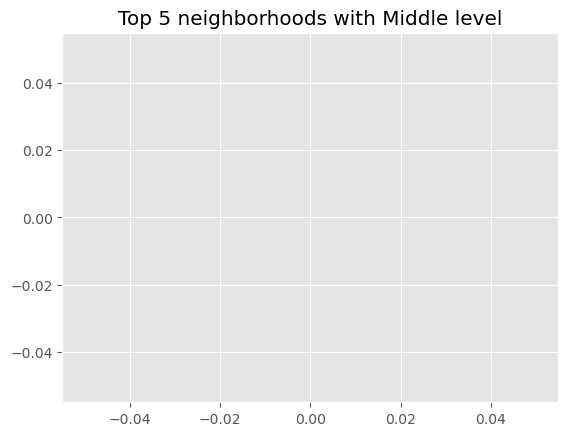

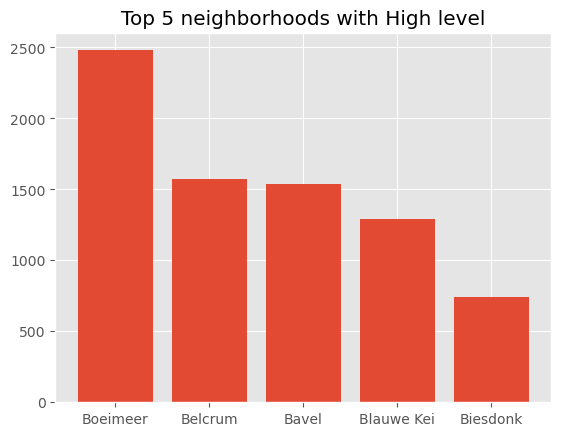

In [78]:
level_of_education = df_educational_level['level_of_education'].unique()

for education in level_of_education:

    education_data = Buurten_level_of_education[Buurten_level_of_education['level_of_education'] == education] # Subsetting to the respective neighborhood

    education_data = education_data.head(5).sort_values('number_of_people', ascending=False)
    
    plt.figure()
    plt.bar(education_data['Buurten'], education_data['number_of_people']) # Creating a pie chart 
    plt.title(f'Top 5 neighborhoods with {education}') # Setting a title for the chart

# Income level

In [79]:
df_income_level.shape

(1456, 5)

In [80]:
df_income_level.head(10)

Unnamed: 0         Buurten level_of_income  Year value
0           0      Valkenberg      Low income  2009  60,0
1           1          Chassé      Low income  2009  47,0
2           2      Fellenoord      Low income  2009  66,0
3           3     Schorsmolen      Low income  2009  66,0
4           4         Station      Low income  2009  57,0
5           5            City      Low income  2009  50,0
6           6         Belcrum      Low income  2009  41,0
7           7  Doornbos-Linie      Low income  2009  60,0
8           8        Biesdonk      Low income  2009  52,0
9           9     Geeren-zuid      Low income  2009     ?

In [81]:
df_income_level.drop('Unnamed: 0', axis=1, inplace=True)

In [82]:
df_income_level.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Buurten          1456 non-null   object
 1   level_of_income  1456 non-null   object
 2   Year             1456 non-null   int64 
 3   value            1400 non-null   object
dtypes: int64(1), object(3)
memory usage: 45.6+ KB


In [83]:
print('Number of missing values:\n ', df_income_level.isna().sum())
print('Number of duplicates: ', df_income_level.duplicated().sum())

Number of missing values:
  Buurten             0
level_of_income     0
Year                0
value              56
dtype: int64
Number of duplicates:  0


In [84]:
df_income_level.rename(columns={'value':'number_of_people'}, inplace=True) # Renaming a column

In [85]:
# Subsetting the data by removing the '?' and missing values
df_income_level = df_income_level[df_income_level['number_of_people'] != '?']
df_income_level = df_income_level[~df_income_level['number_of_people'].isnull()]

In [86]:
# Replacing ',' with '.' along with changing the data type to float
df_income_level['number_of_people'] = df_income_level['number_of_people'].str.replace(',', '.').astype(float)

/tmp/ipykernel_52520/1188565256.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


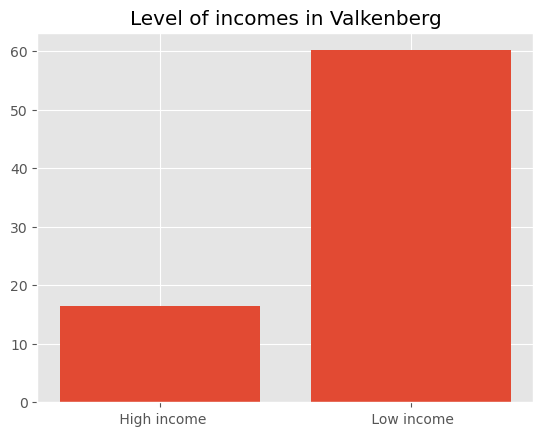

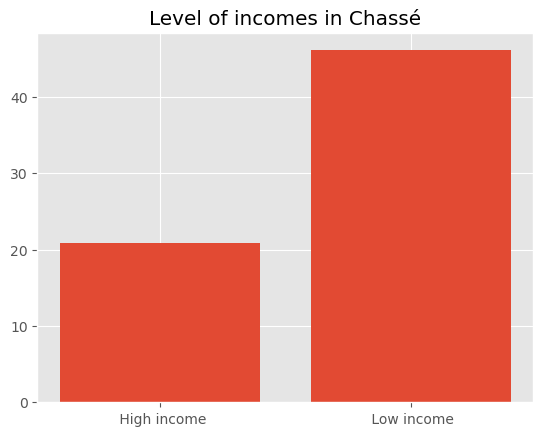

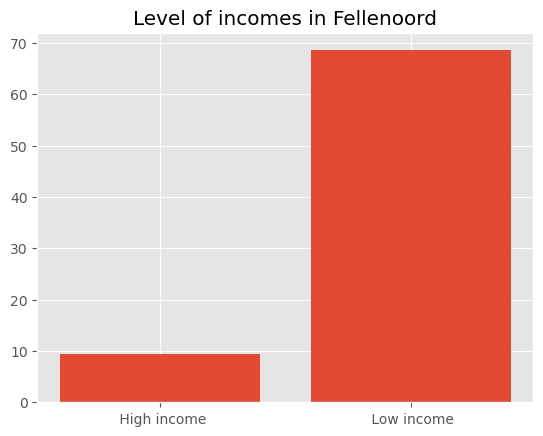

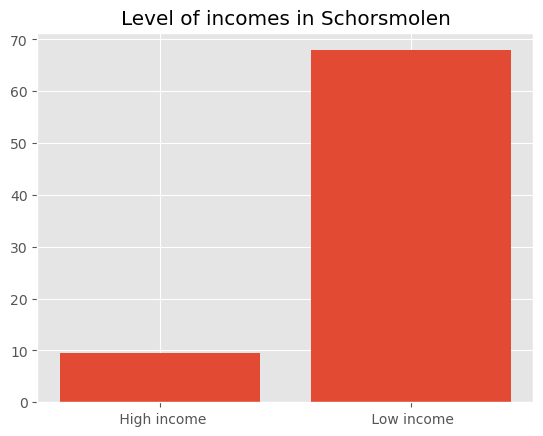

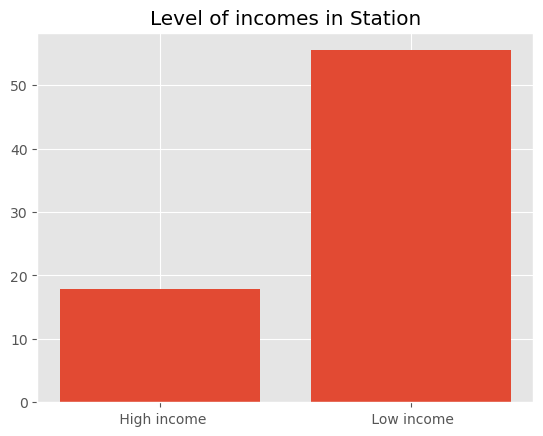

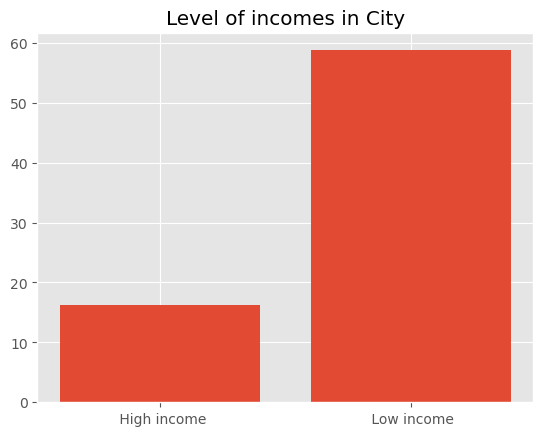

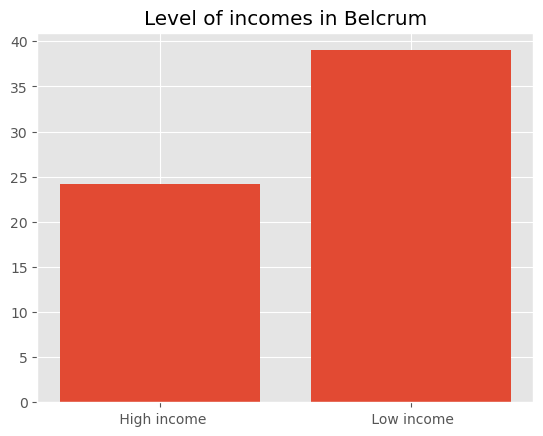

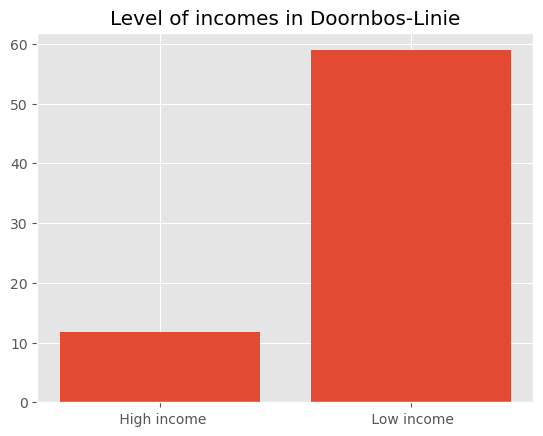

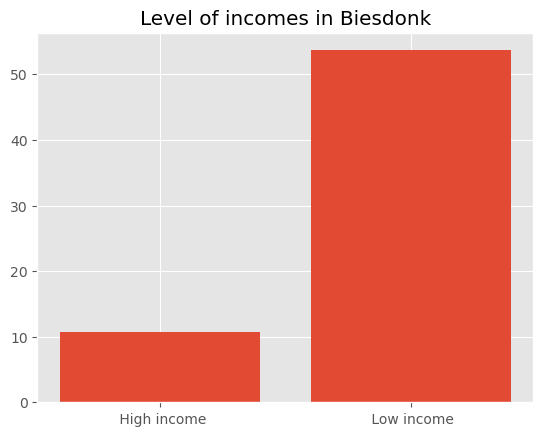

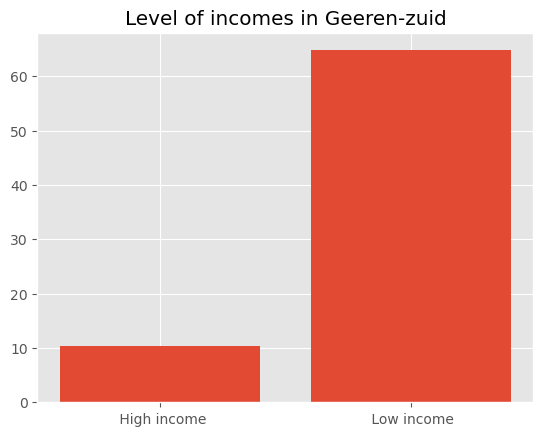

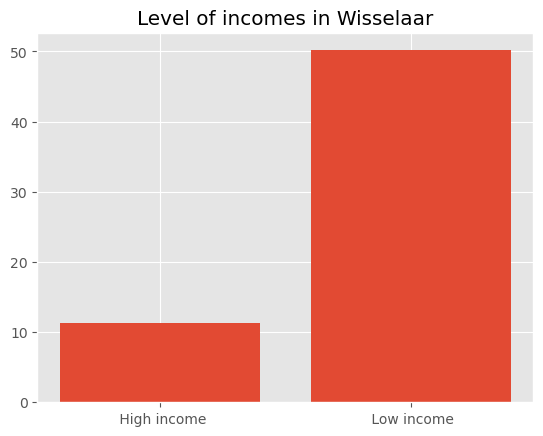

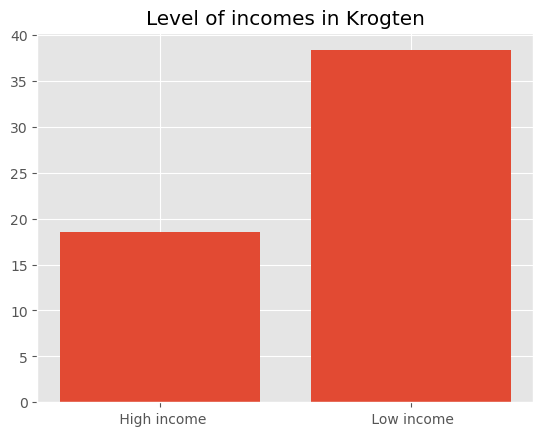

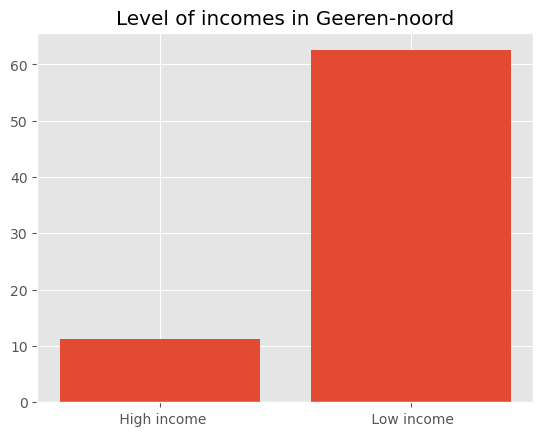

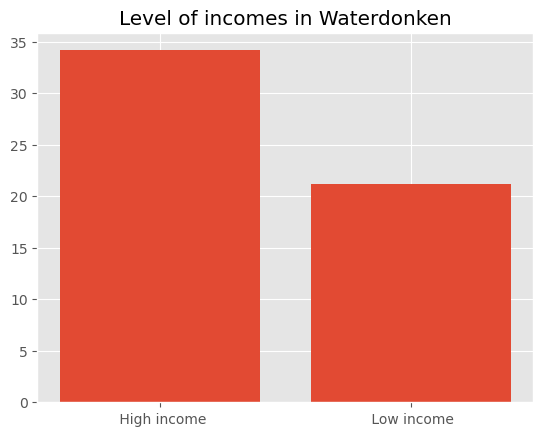

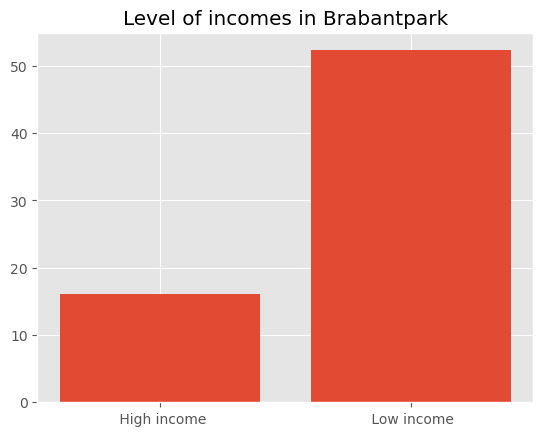

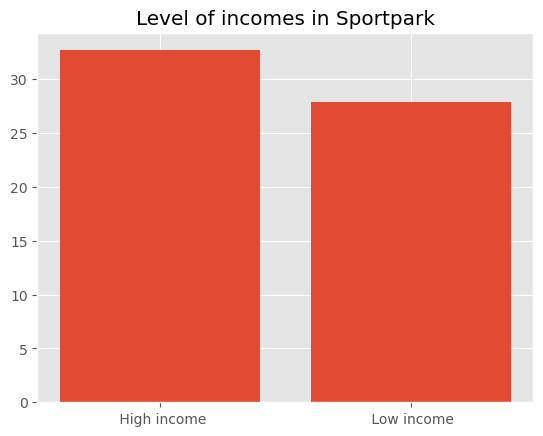

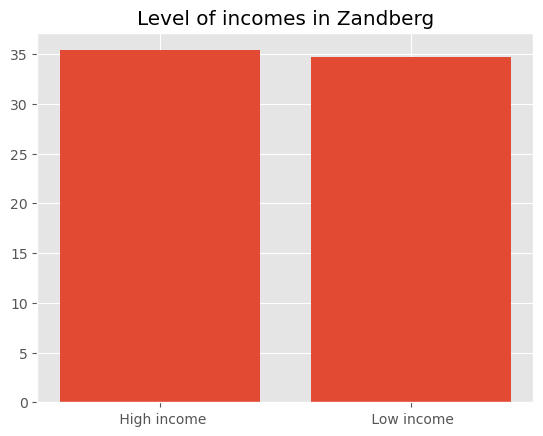

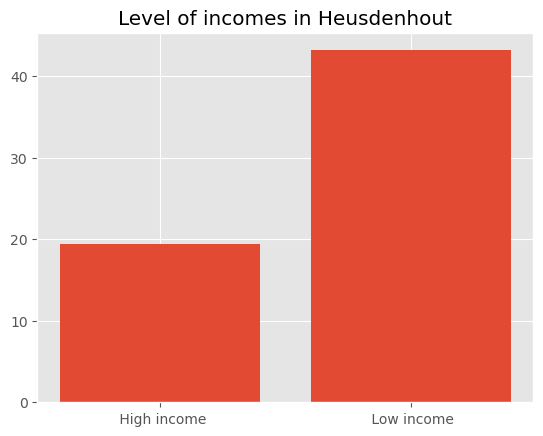

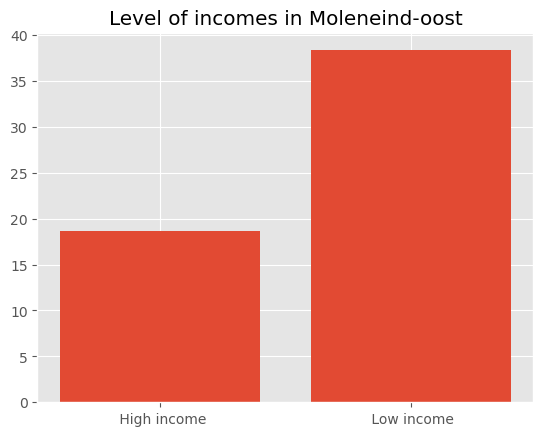

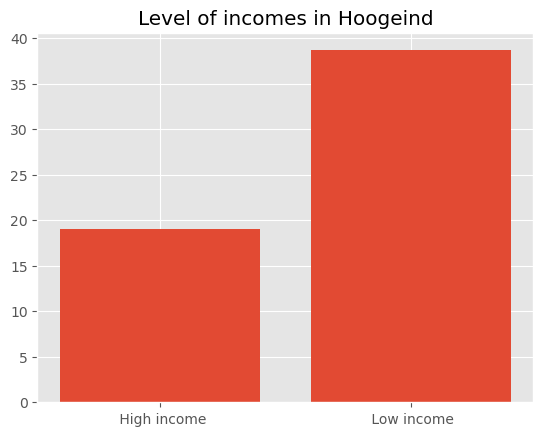

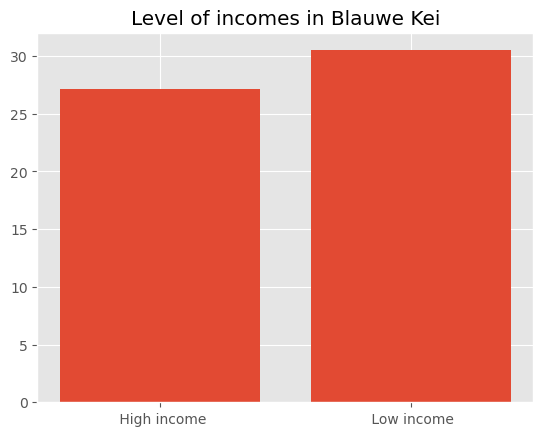

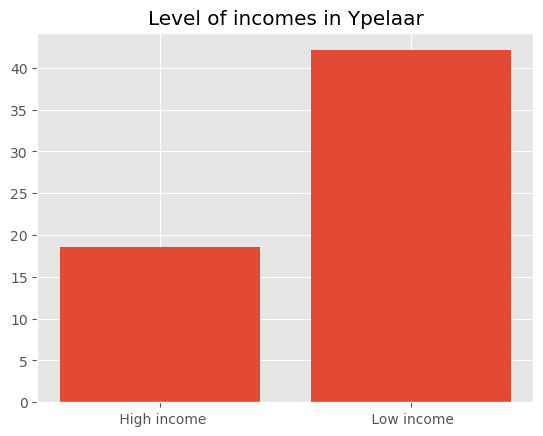

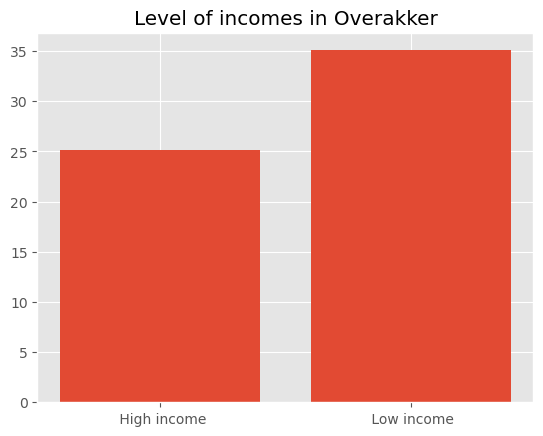

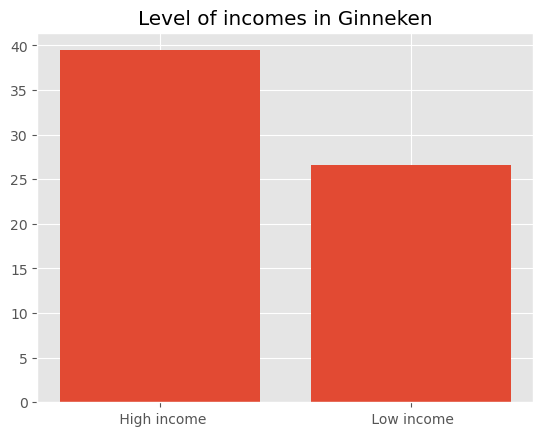

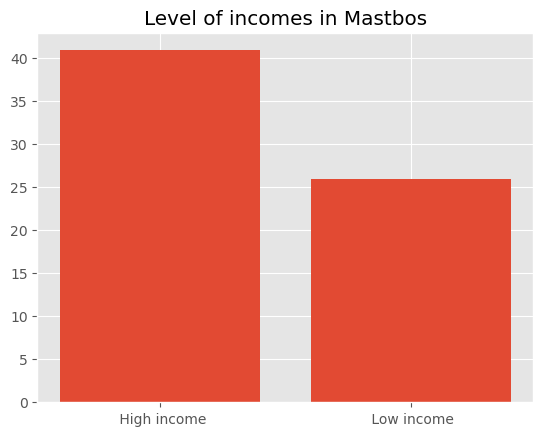

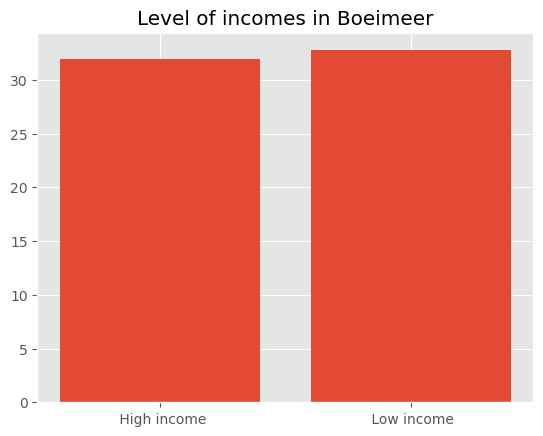

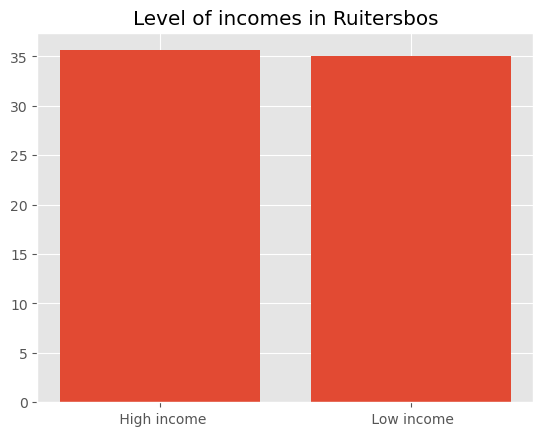

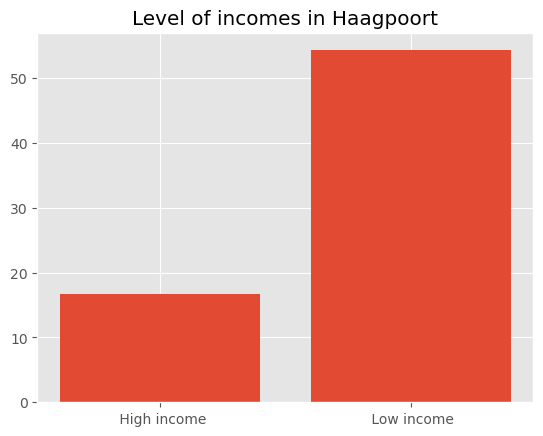

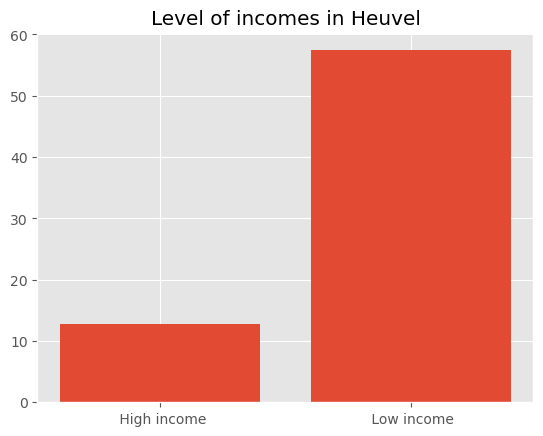

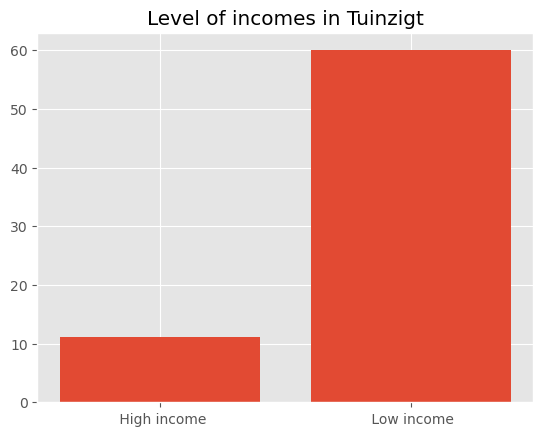

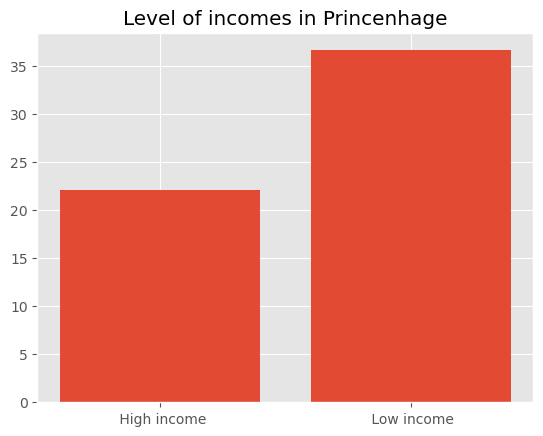

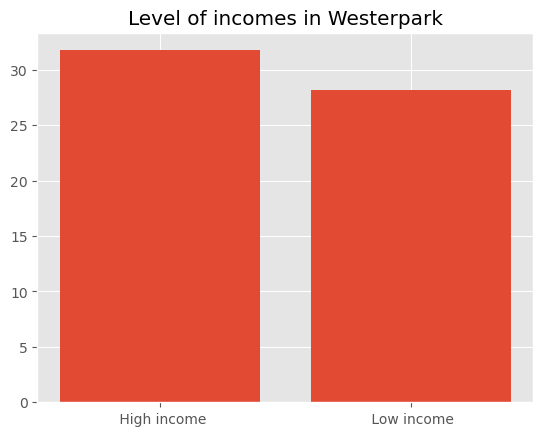

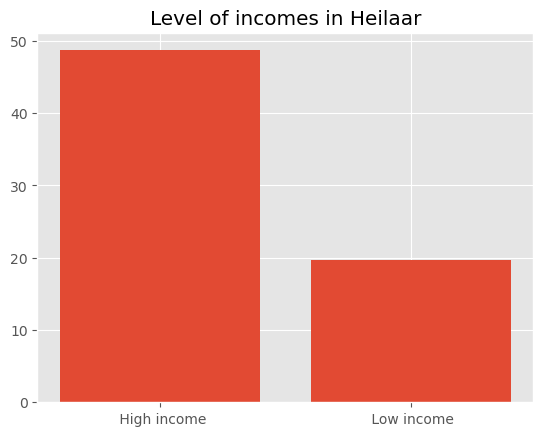

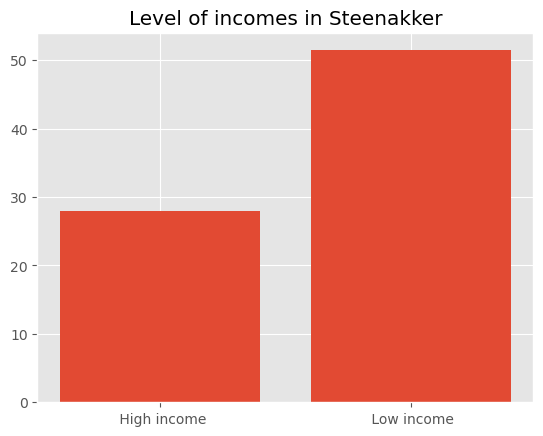

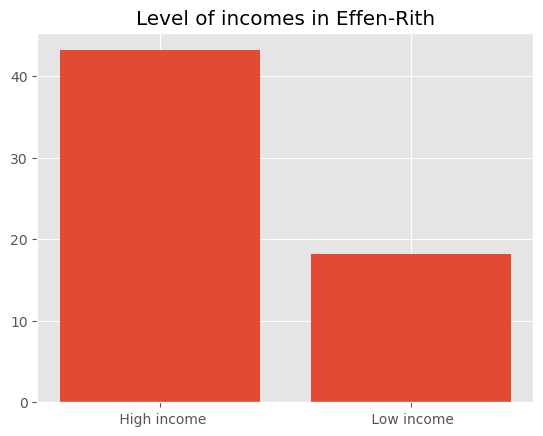

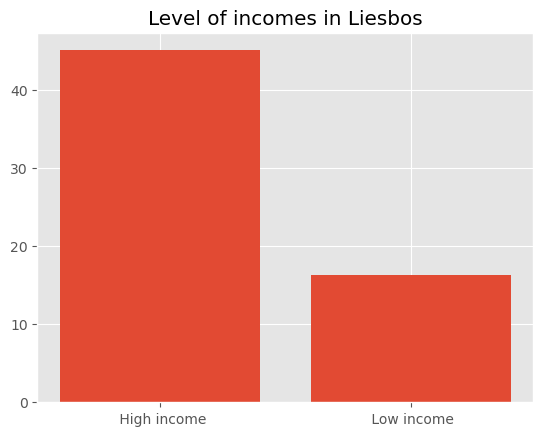

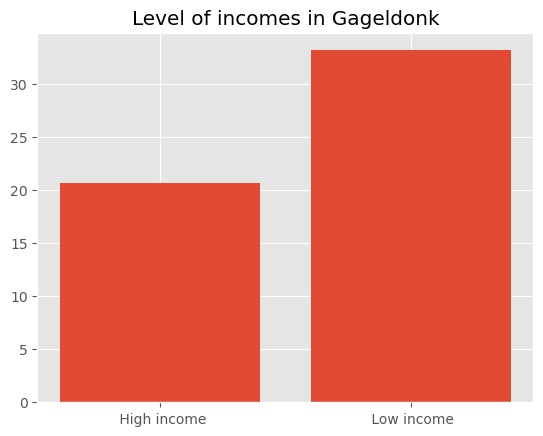

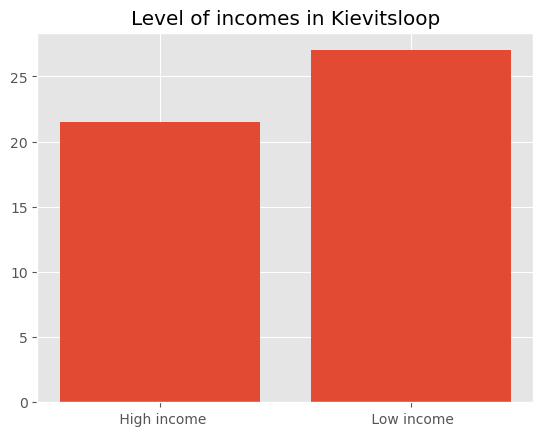

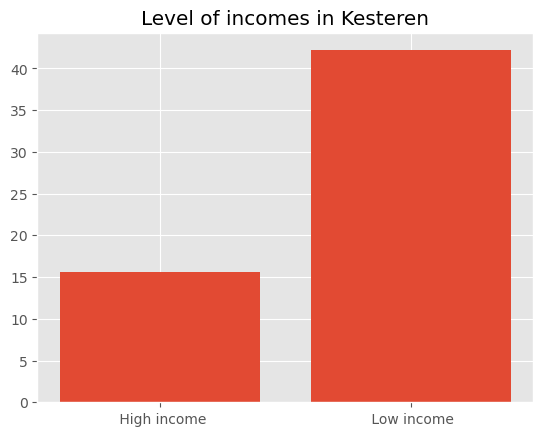

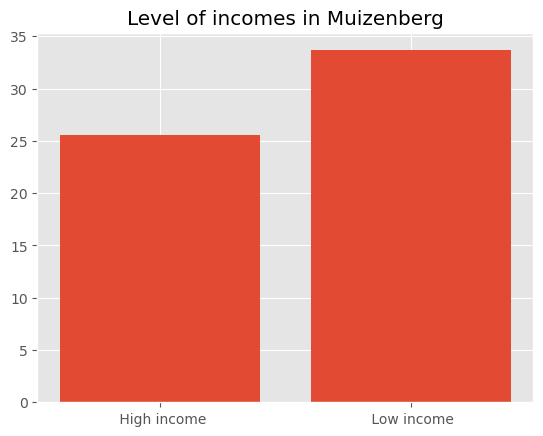

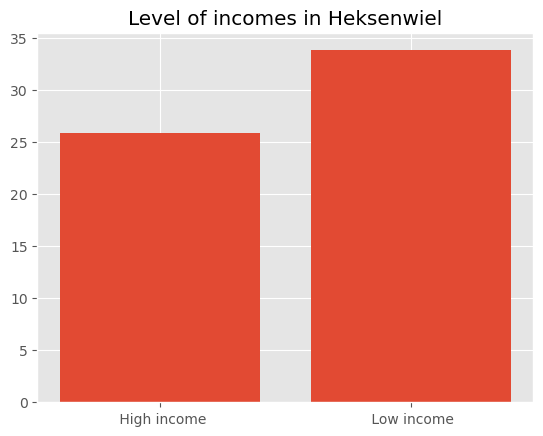

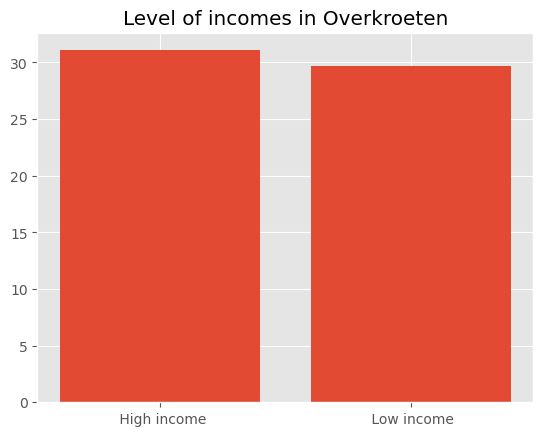

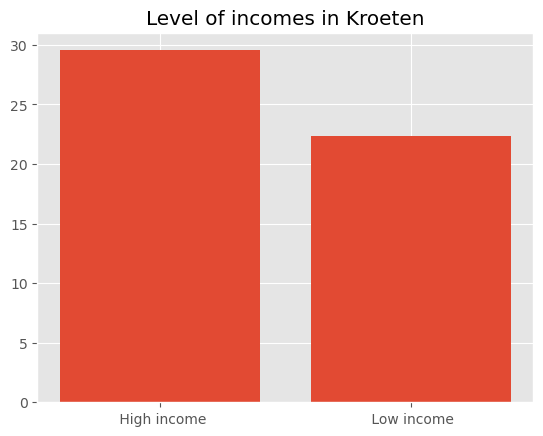

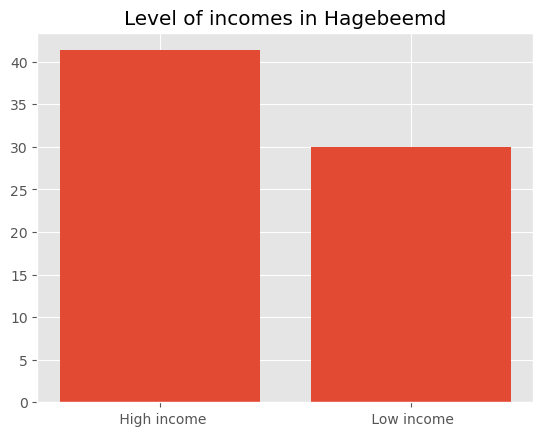

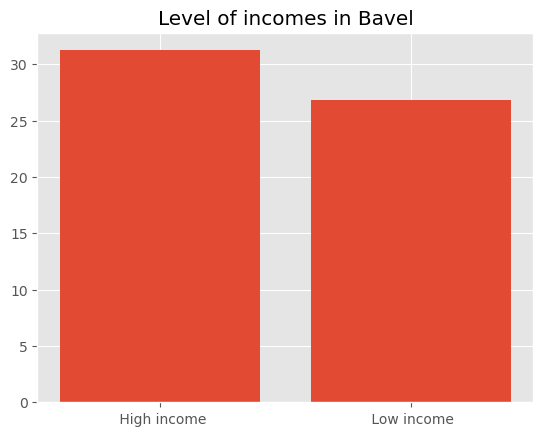

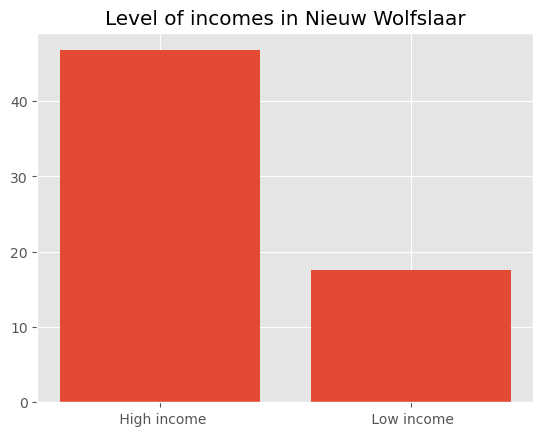

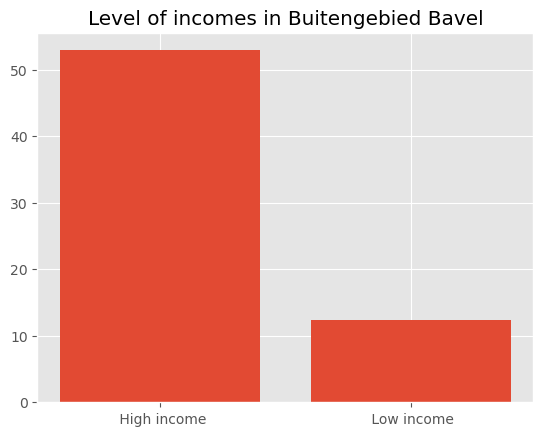

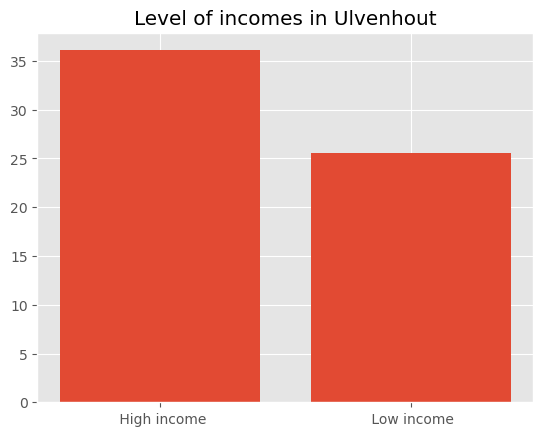

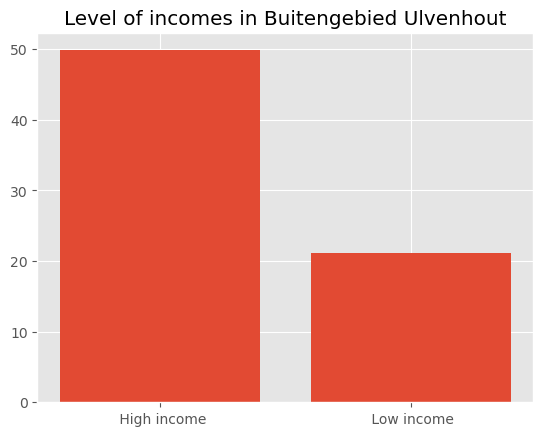

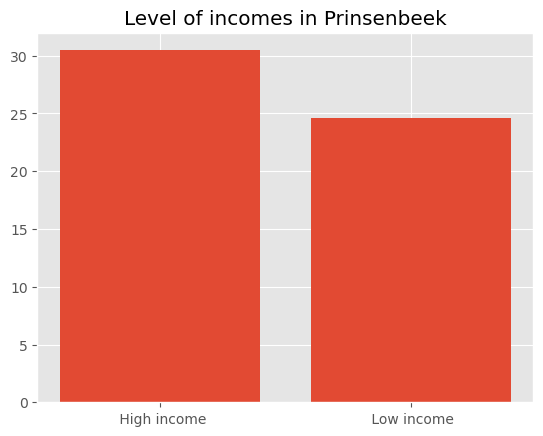

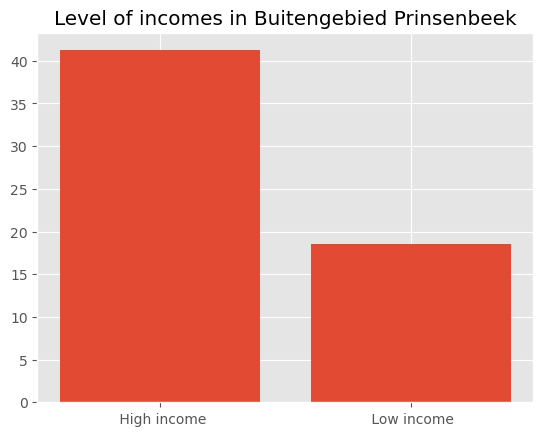

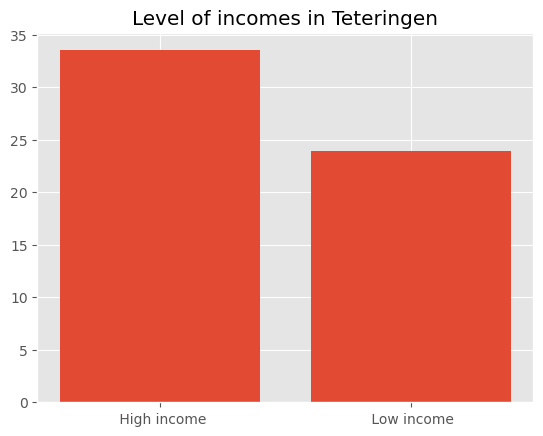

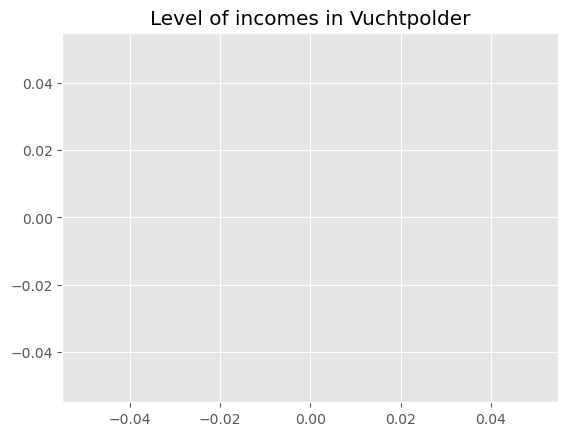

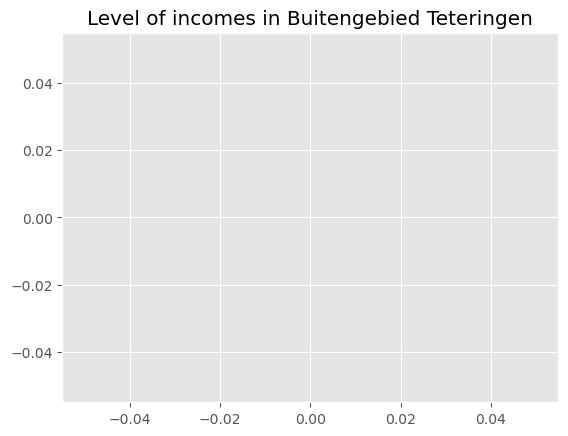

In [87]:
# Creating bar chat for each neighborhood
neighborhood = df_income_level['Buurten'].unique()

# Aggregating the data by neighborhood and level of income
Buurten_level_of_income = df_income_level.groupby(['Buurten', 'level_of_income'], as_index=False)['number_of_people'].mean()

# Looping through the neighborhoods
for neighborhood in neighborhoods:

    neighborhood_data = Buurten_level_of_income[Buurten_level_of_income['Buurten'] == neighborhood] # Subsetting to the respective neighborhood
    
    plt.figure()
    plt.bar(neighborhood_data['level_of_income'], neighborhood_data['number_of_people']) # Creating a pie chart 
    plt.title(f'Level of incomes in {neighborhood}') # Setting a title for the chart

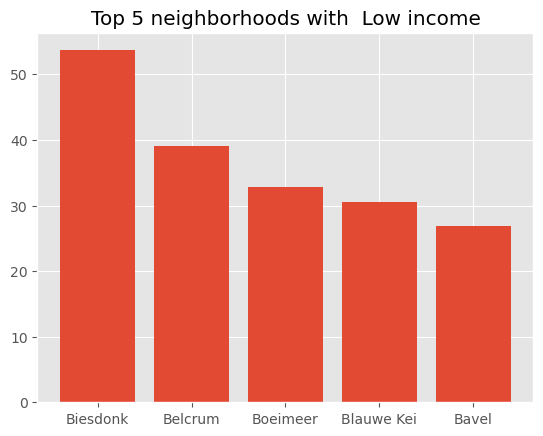

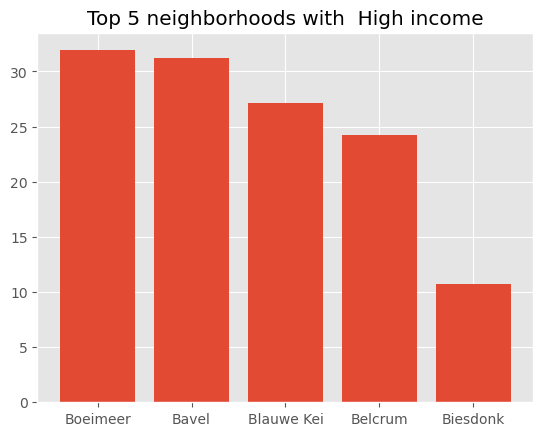

In [88]:
level_of_income = df_income_level['level_of_income'].unique()

for income in level_of_income:

    income_data = Buurten_level_of_income[Buurten_level_of_income['level_of_income'] == income] # Subsetting to the respective neighborhood

    income_data = income_data.head(5).sort_values('number_of_people', ascending=False)
    
    plt.figure()
    plt.bar(income_data['Buurten'], income_data['number_of_people']) # Creating a pie chart 
    plt.title(f'Top 5 neighborhoods with {income}') # Setting a title for the chart

# Quality of life of Gemeente Breda

In [89]:
df_qol_of_Breda.shape

(168, 4)

In [90]:
df_qol_of_Breda.head(10)

Unnamed: 0         Buurten  Year      value
0           0      Valkenberg  2014  4,0437744
1           1          Chassé  2014  4,1088639
2           2      Fellenoord  2014  3,8969463
3           3     Schorsmolen  2014  3,8828739
4           4         Station  2014  4,0230966
5           5            City  2014  4,0224228
6           6         Belcrum  2014  4,0468476
7           7  Doornbos-Linie  2014  3,8657413
8           8        Biesdonk  2014  3,8367021
9           9     Geeren-zuid  2014  3,8511576

In [91]:
df_qol_of_Breda.drop('Unnamed: 0', axis=1, inplace=True)

In [92]:
df_qol_of_Breda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Buurten  168 non-null    object
 1   Year     168 non-null    int64 
 2   value    166 non-null    object
dtypes: int64(1), object(2)
memory usage: 4.1+ KB


In [93]:
print('Number of missing values:\n ', df_qol_of_Breda.isna().sum())
print('Number of duplicates: ', df_qol_of_Breda.duplicated().sum())

Number of missing values:
  Buurten    0
Year       0
value      2
dtype: int64
Number of duplicates:  0


In [94]:
df_qol_of_Breda.rename(columns={'value':'livability_index'}, inplace=True) # Renaming a column

In [95]:
# Removing the '?' and missing values
df_qol_of_Breda = df_qol_of_Breda[df_qol_of_Breda['livability_index'] != '?']
df_qol_of_Breda = df_qol_of_Breda[~df_qol_of_Breda['livability_index'].isnull()]

In [96]:
df_qol_of_Breda['livability_index'] = df_qol_of_Breda['livability_index'].str.replace(',', '.').astype(float) # Replacing ',' with '.' and changing the data type to float

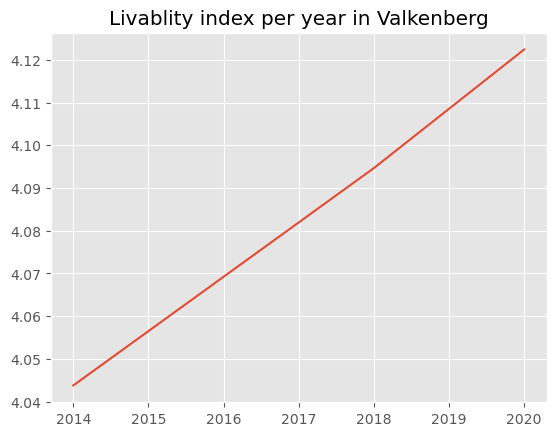

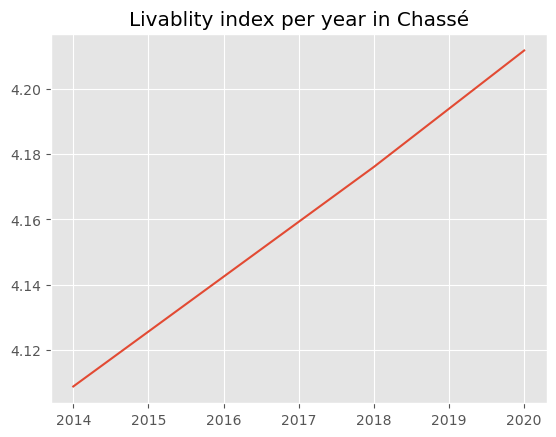

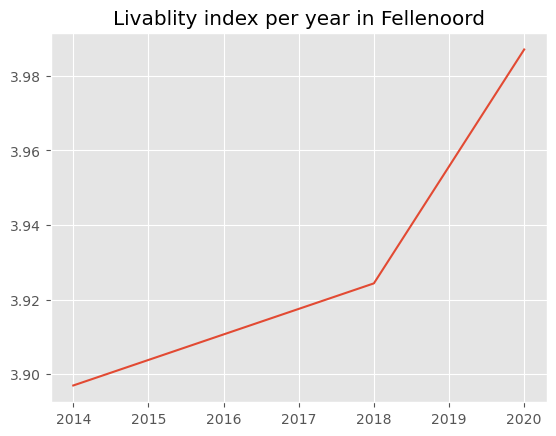

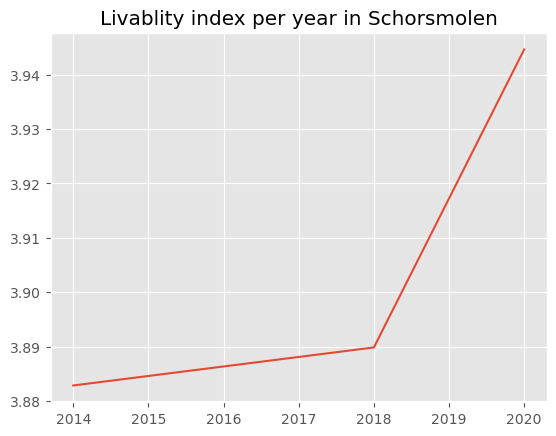

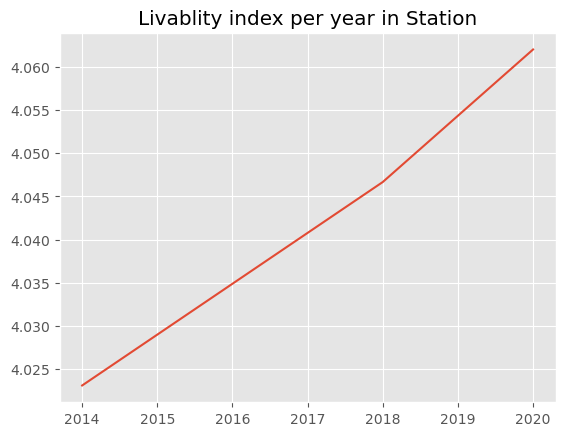

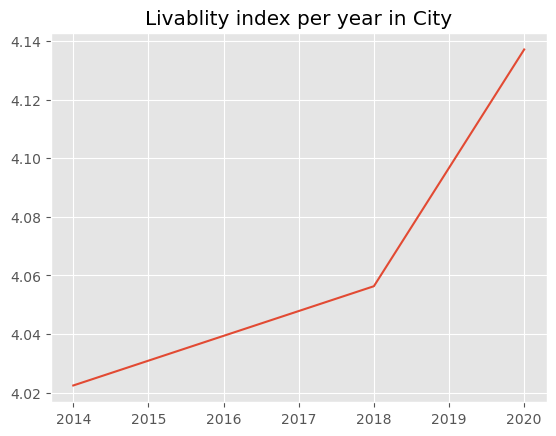

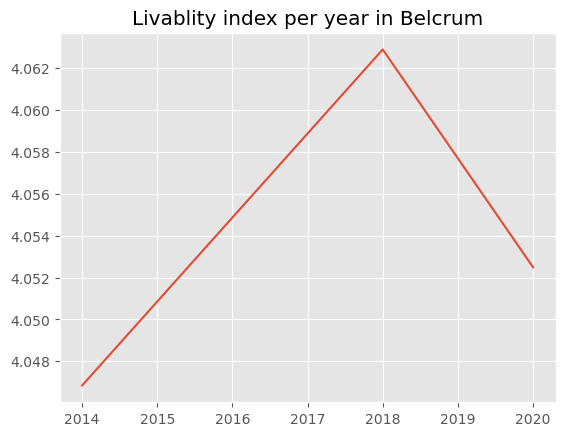

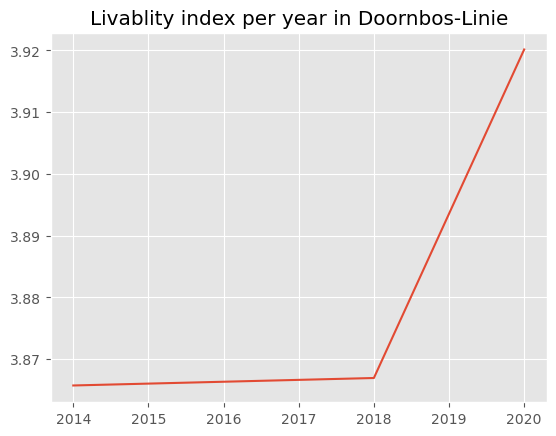

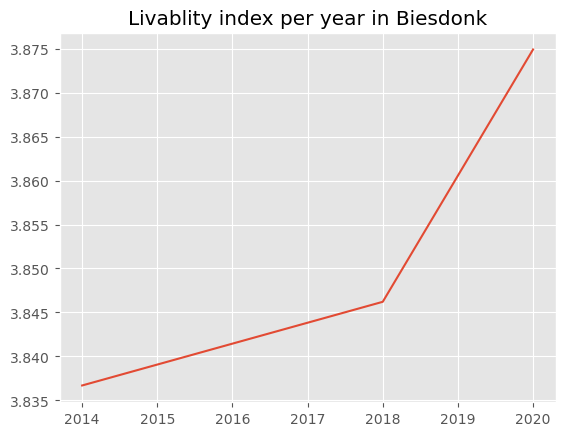

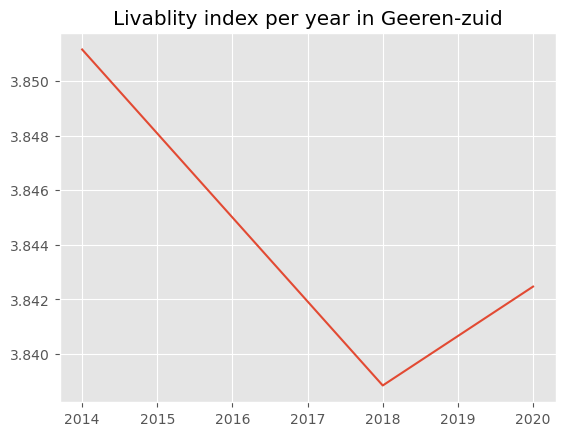

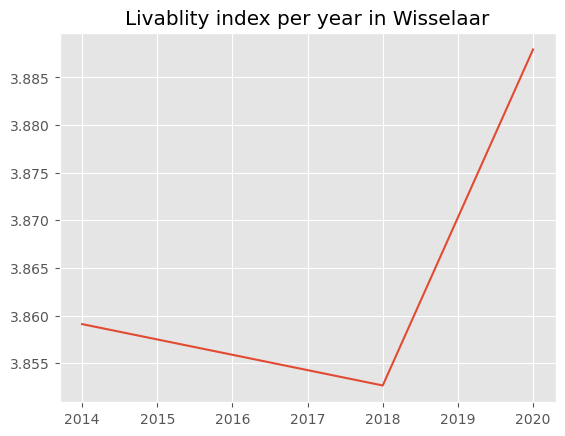

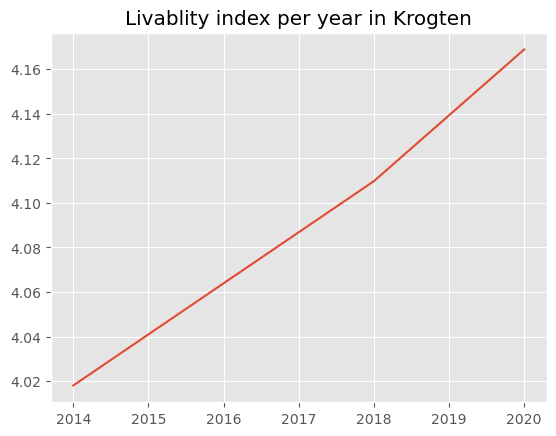

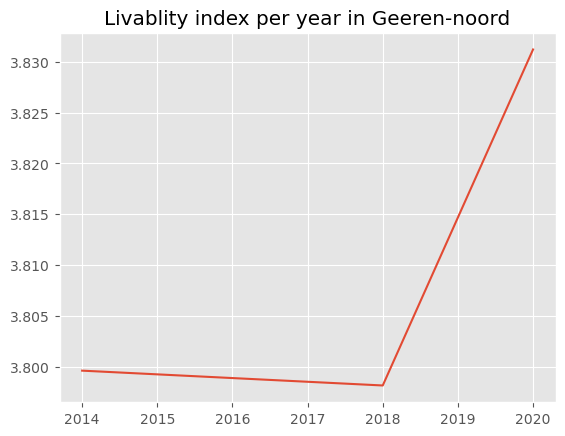

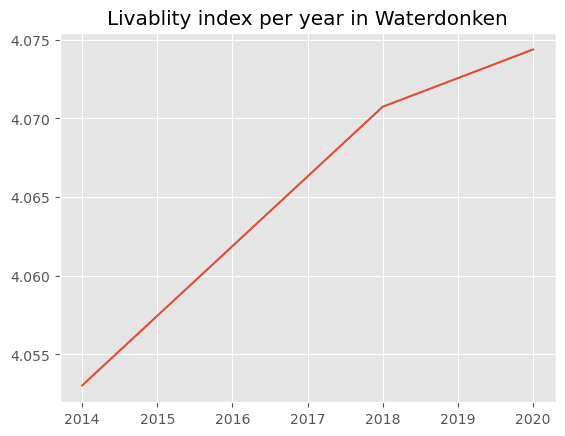

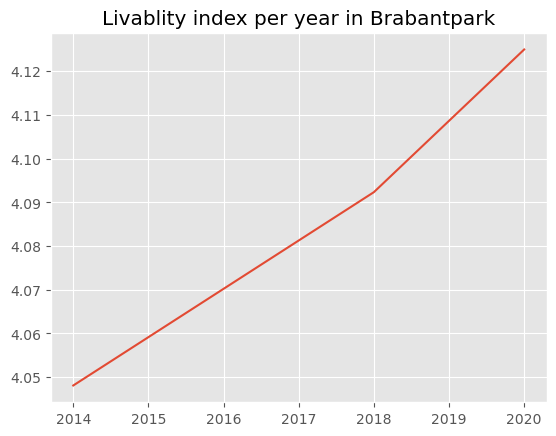

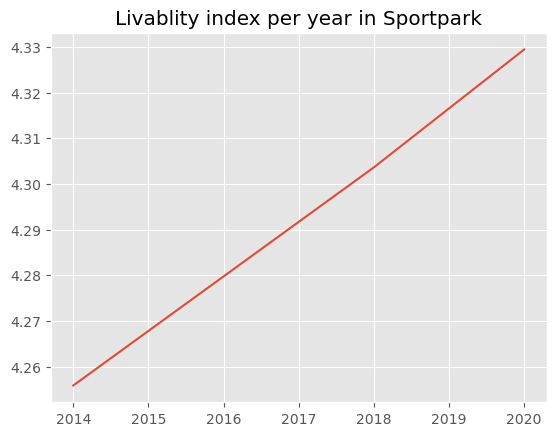

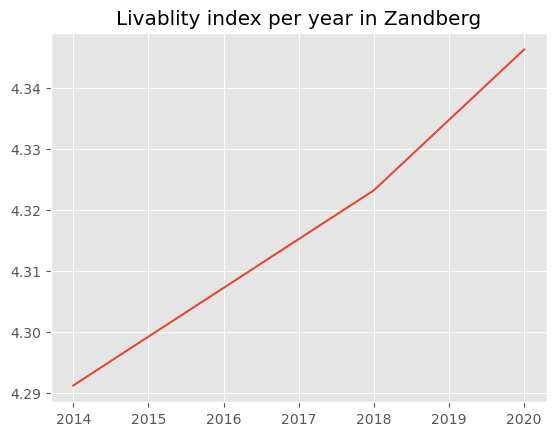

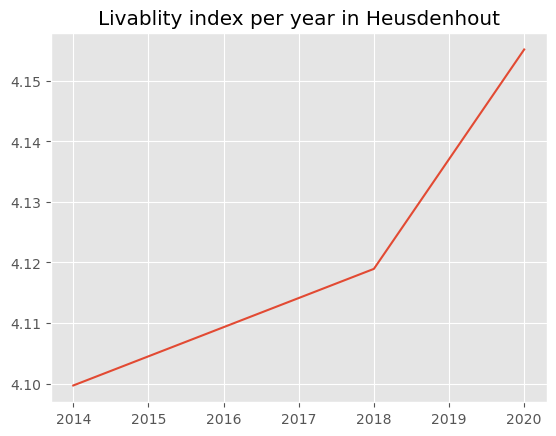

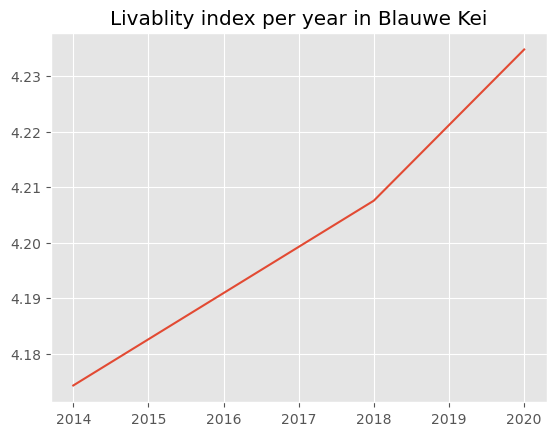

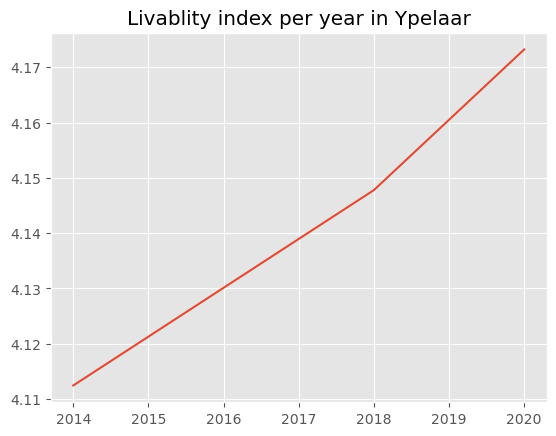

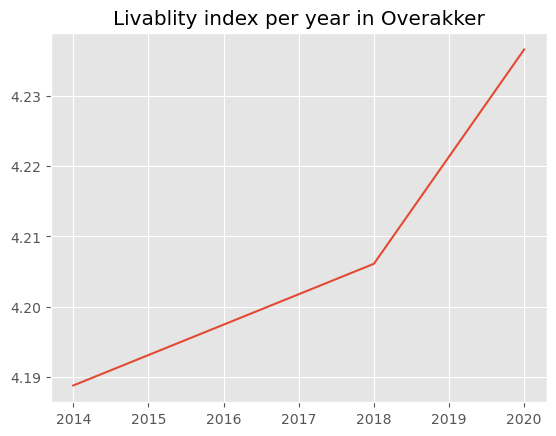

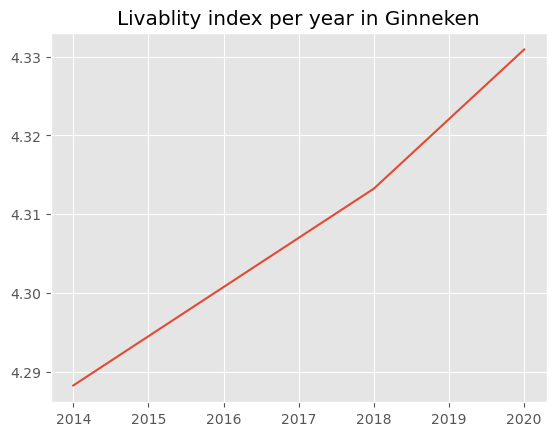

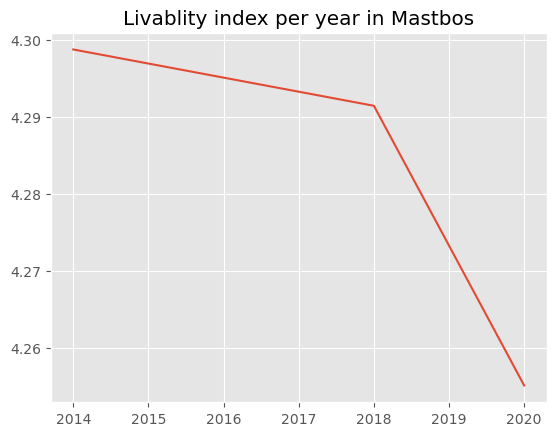

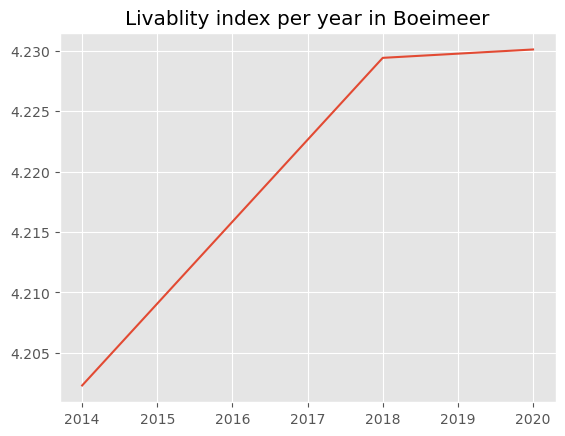

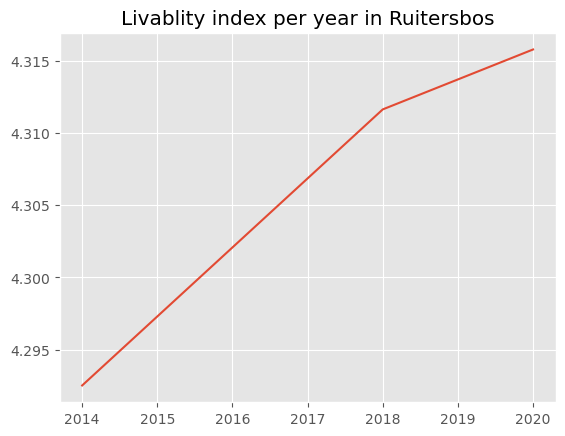

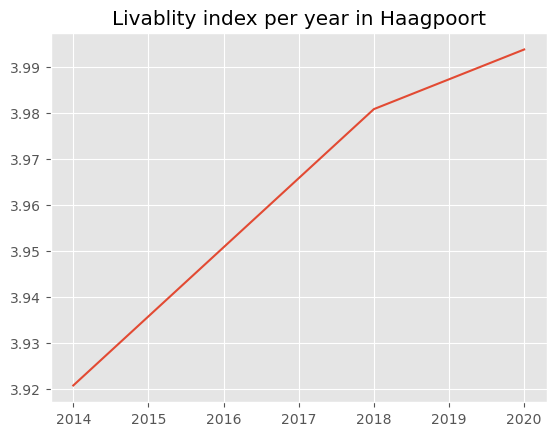

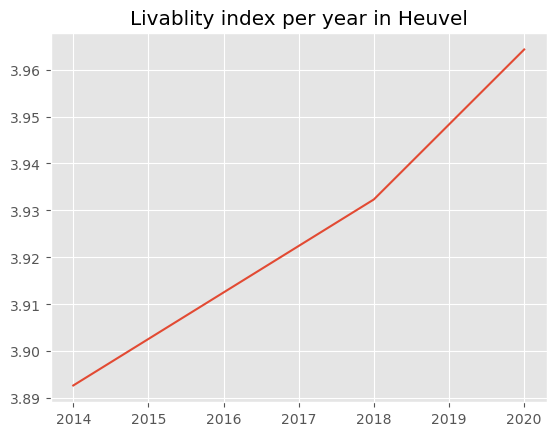

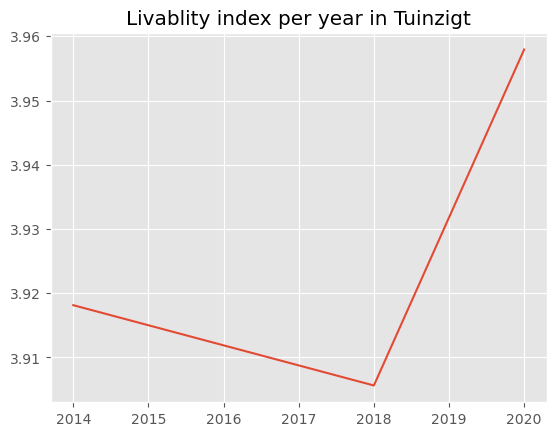

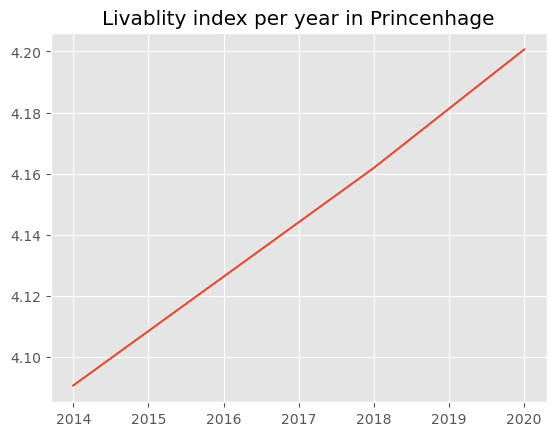

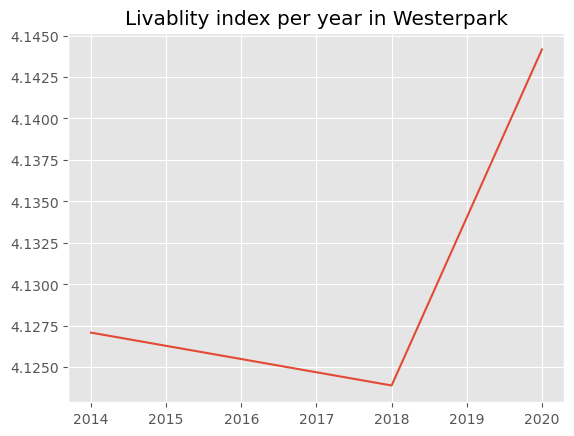

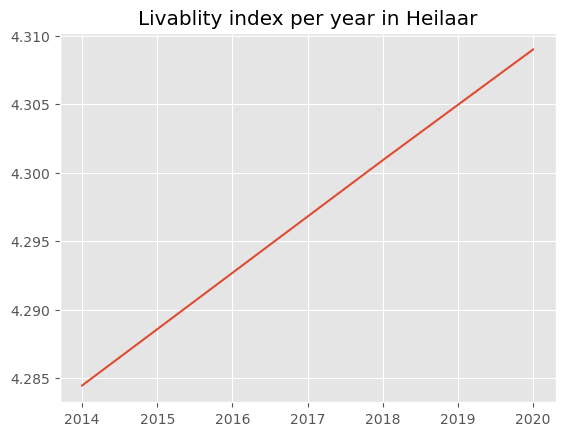

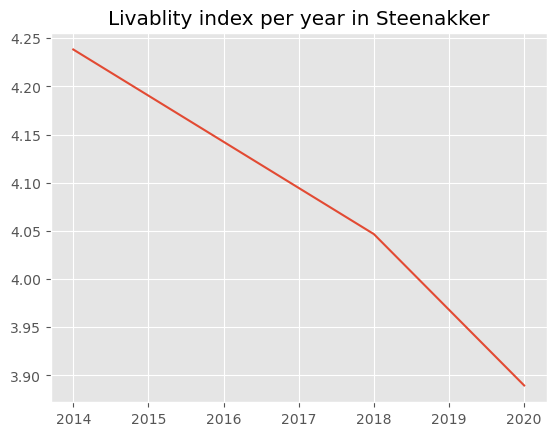

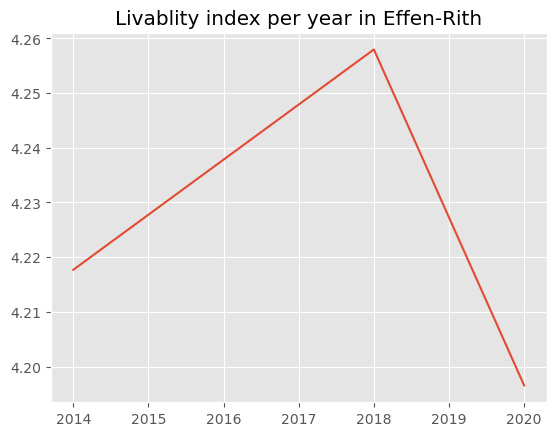

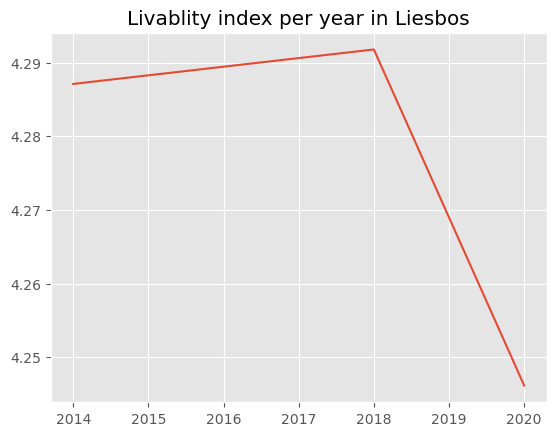

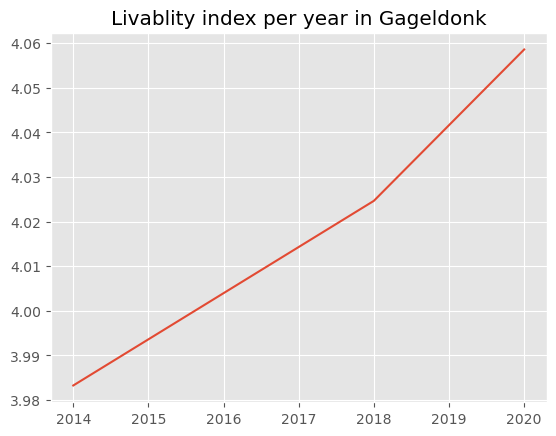

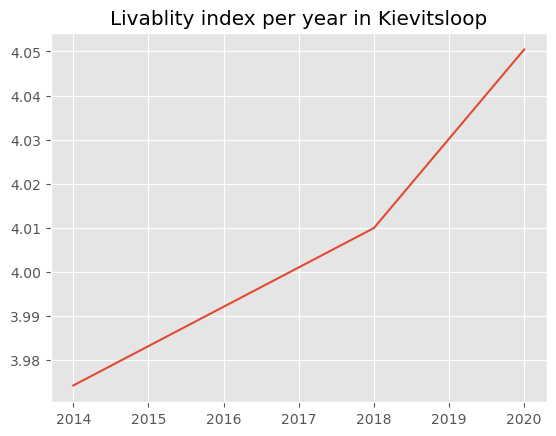

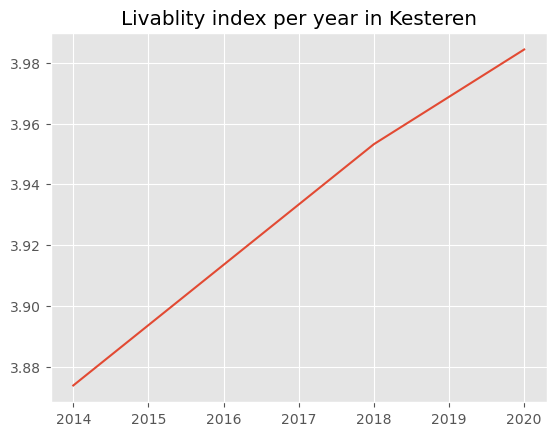

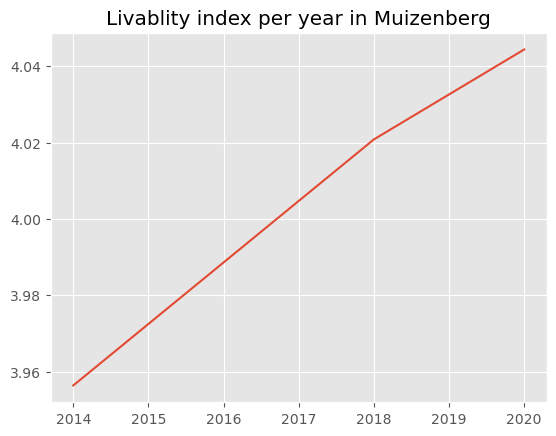

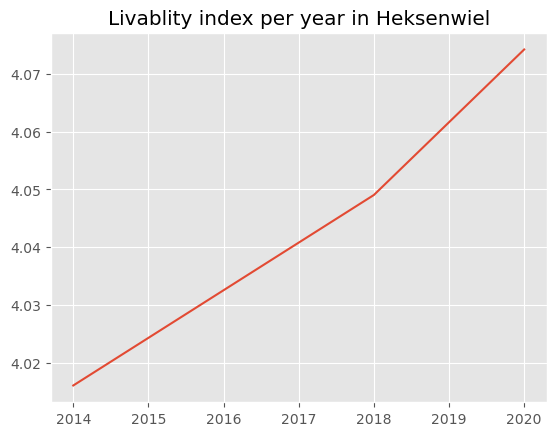

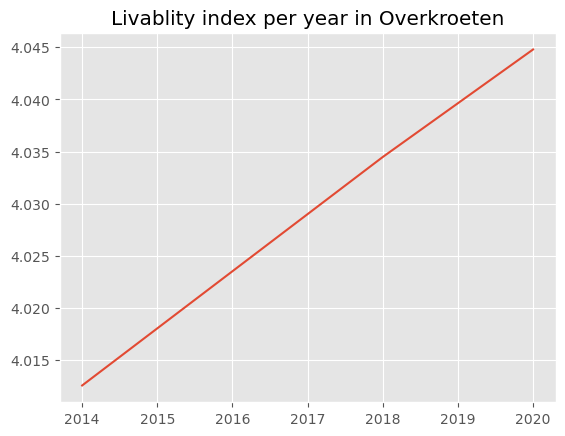

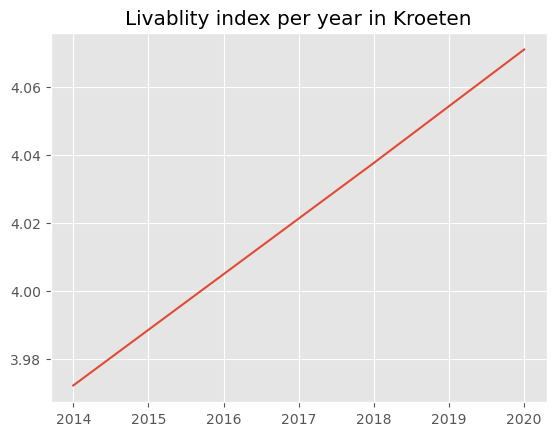

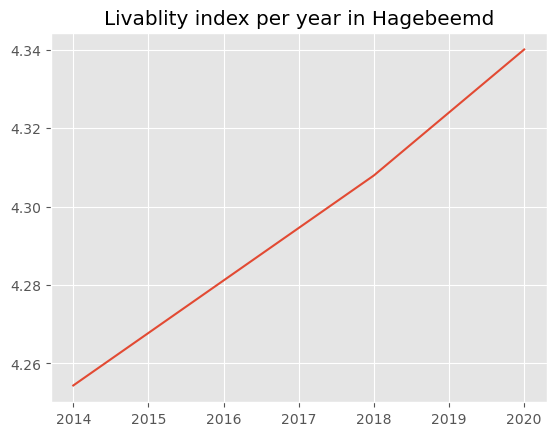

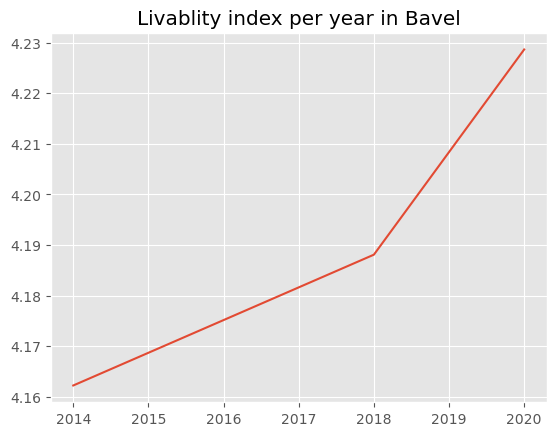

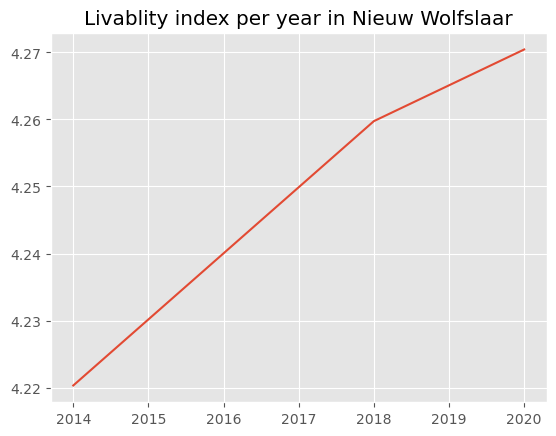

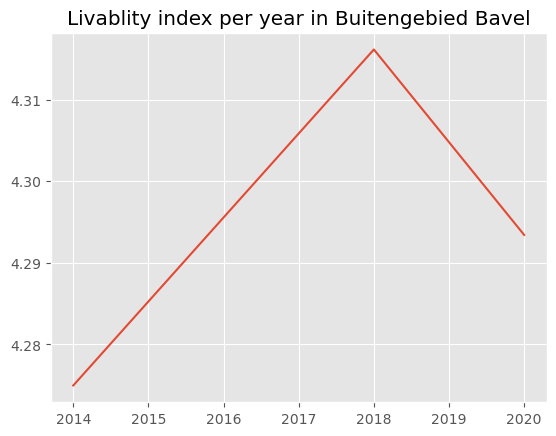

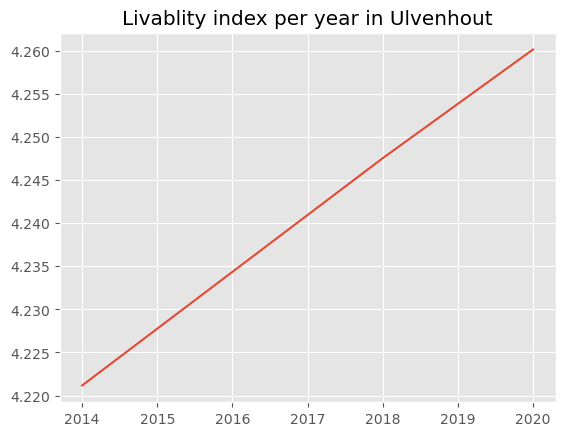

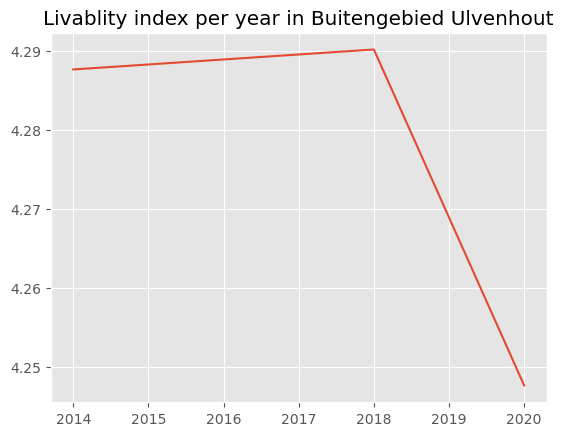

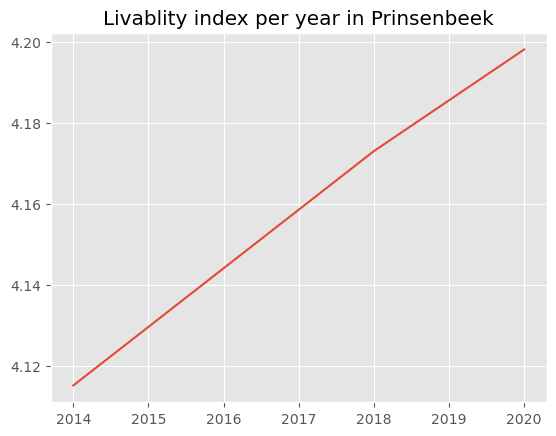

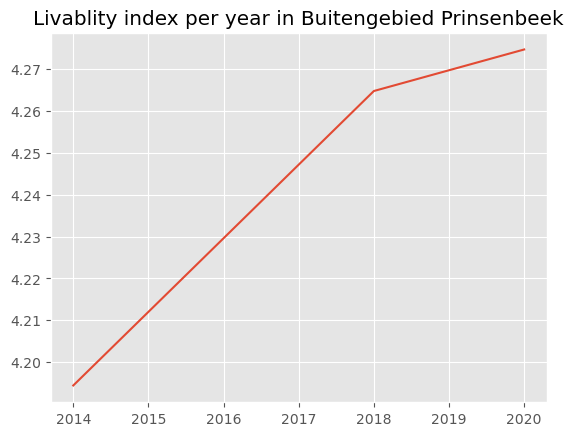

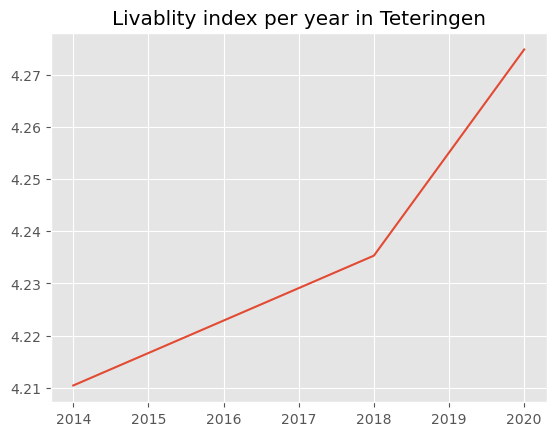

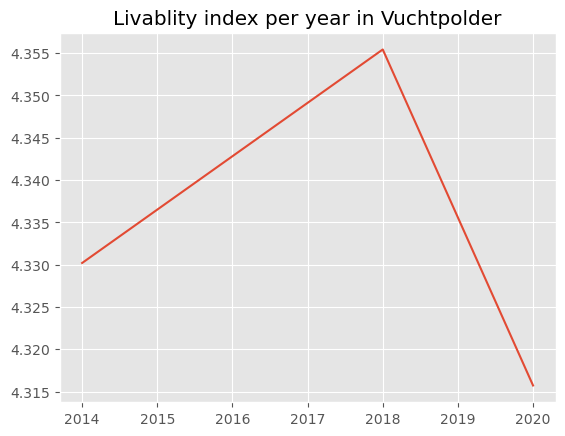

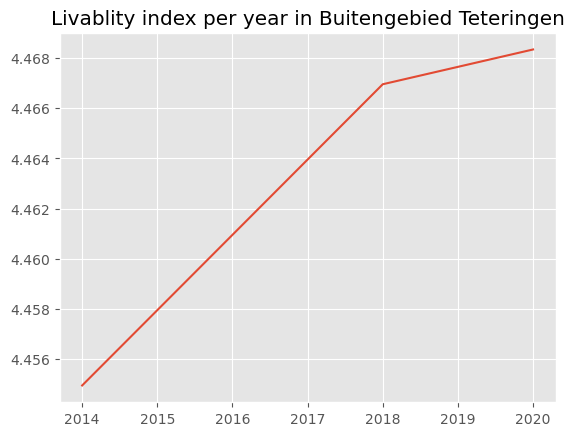

In [97]:
# Creating a line chart for each neighbourhood
neighborhoods = df_qol_of_Breda['Buurten'].unique()

# Aggregating by neighborhood and year 
Buurten_livability_index_per_year = df_qol_of_Breda.groupby(['Buurten', 'Year'], as_index=False)['livability_index'].mean().sort_values('Year')

# Looping through neighborhoods
for neighborhood in neighborhoods:
    
    neighborhood_data = Buurten_livability_index_per_year[Buurten_livability_index_per_year['Buurten'] == neighborhood] # Subsetting the data to the respective neighborhood 
    
    plt.figure()
    plt.plot(neighborhood_data['Year'], neighborhood_data['livability_index']) # Creating a line chart
    plt.title(f"Livablity index per year in {neighborhood}") # Setting a title 
    plt.show() # Plotting the visualizations

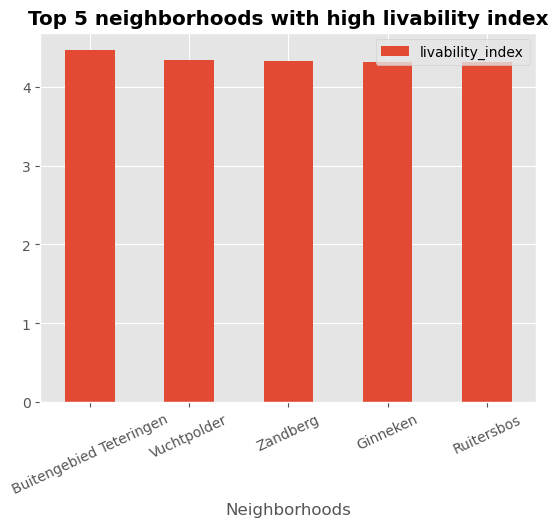

In [98]:
Buurten_livability_index = df_qol_of_Breda.groupby(['Buurten'], as_index=False)['livability_index'].mean().sort_values('livability_index', ascending=False)
Buurten_livability_index.head(5).plot(kind='bar', x='Buurten')
plt.title('Top 5 neighborhoods with high livability index', fontdict={'fontweight':'bold'})
plt.xlabel('Neighborhoods')
plt.xticks(rotation=25)
plt.show()

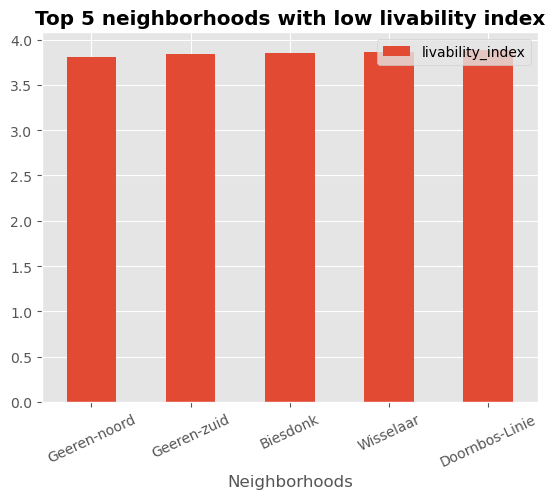

In [99]:
Buurten_livability_index = df_qol_of_Breda.groupby(['Buurten'], as_index=False)['livability_index'].mean().sort_values('livability_index', ascending=True)
Buurten_livability_index.head(5).plot(kind='bar', x='Buurten')
plt.title('Top 5 neighborhoods with low livability index', fontdict={'fontweight':'bold'})
plt.xlabel('Neighborhoods')
plt.xticks(rotation=25)
plt.show()

# Heat stress map

In [100]:
df_heat_stress.shape

(2357, 2)

In [101]:
df_heat_stress.head(10)

heat_stress_score                                           geometry
0               0.65  MULTIPOLYGON (((4.73871 51.61852, 4.73870 51.6...
1               0.65  MULTIPOLYGON (((4.74601 51.61316, 4.74456 51.6...
2               0.65  MULTIPOLYGON (((4.75473 51.60872, 4.75472 51.6...
3               0.65  MULTIPOLYGON (((4.75187 51.60690, 4.75186 51.6...
4               0.65  MULTIPOLYGON (((4.75038 51.61049, 4.75182 51.6...
5               0.65  MULTIPOLYGON (((4.75326 51.61051, 4.75182 51.6...
6               0.65  MULTIPOLYGON (((4.75324 51.61231, 4.75179 51.6...
7               0.65  MULTIPOLYGON (((4.75472 51.60962, 4.75328 51.6...
8               0.59  MULTIPOLYGON (((4.73887 51.60773, 4.73885 51.6...
9               0.59  MULTIPOLYGON (((4.74597 51.61586, 4.74452 51.6...

<Axes: >

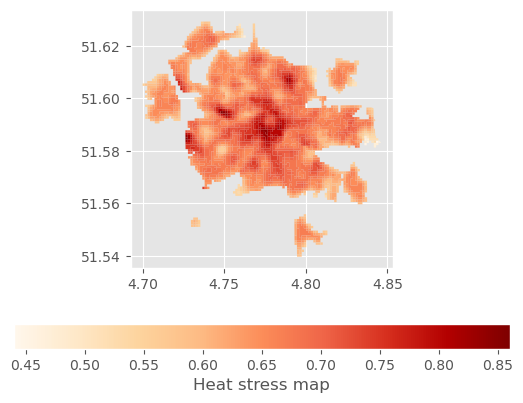

In [102]:
df_heat_stress.plot('heat_stress_score',
                    legend=True, 
                    legend_kwds={"label": "Heat stress map", "orientation": "horizontal"},
                    cmap='OrRd') # Creating a heat stress map for Breda